# analyze_R0_temperature_dependency

In [73]:
def analyze_R0_temperature_dependency(R0_temp_dict, device_type="supercapacitor", parameter_type="R0", show_plots=True, save_figs=False, fig_path=None):
    """
    Ïò®ÎèÑÎ≥Ñ ÌååÎùºÎØ∏ÌÑ∞ ÌäπÏÑ±ÏùÑ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    R0_temp_dict : dict
        Ïò®ÎèÑÎ≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨ {temp: np.array([soc, parameter_value])}
    device_type : str, default="supercapacitor"
        Ïû•Ïπò Ïú†Ìòï ("supercapacitor", "battery", "supercap", "batt")
    parameter_type : str, default="R0"
        ÌååÎùºÎØ∏ÌÑ∞ ÌÉÄÏûÖ ("R0", "R1", "R2", "C1", "C2", "tau1", "tau2" Îì±)
    show_plots : bool, default=True
        ÌîåÎ°ØÏùÑ ÌôîÎ©¥Ïóê ÌëúÏãúÌï†ÏßÄ Ïó¨Î∂Ä
    save_figs : bool, default=False
        ÌîåÎ°ØÏùÑ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï†ÏßÄ Ïó¨Î∂Ä
    fig_path : str, optional
        ÌîåÎ°Ø Ï†ÄÏû• Í≤ΩÎ°ú (save_figs=TrueÏùº Îïå ÌïÑÏöî)
    
    Returns:
    --------
    dict : Î∂ÑÏÑù Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨
        - stats: Ïò®ÎèÑÎ≥Ñ ÌÜµÍ≥Ñ
        - temp_coeffs: Ïò®ÎèÑ Í≥ÑÏàò
        - soc_analysis: SOCÎ≥Ñ Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Ïû•Ïπò Ïú†Ìòï Ï†ïÍ∑úÌôî Î∞è ÌëúÏãúÏö© Ïù¥Î¶Ñ ÏÑ§Ï†ï
    device_type_lower = device_type.lower()
    if device_type_lower in ["supercapacitor", "supercap", "sc"]:
        device_name = "Supercapacitor"
        device_short = "Supercap"
    elif device_type_lower in ["battery", "batt", "bat"]:
        device_name = "Battery"
        device_short = "Battery"
    else:
        device_name = device_type.capitalize()
        device_short = device_type.capitalize()
    
    # ÌååÎùºÎØ∏ÌÑ∞ ÌÉÄÏûÖÏóê Îî∞Î•∏ Îã®ÏúÑ Î∞è Î≥ÄÌôò ÏÑ§Ï†ï
    param_type = parameter_type.upper()
    if param_type in ["R0", "R1", "R2"]:
        # Ï†ÄÌï≠ ÌååÎùºÎØ∏ÌÑ∞
        unit_symbol = "mŒ©"
        unit_conversion = 1000  # Œ© ‚Üí mŒ©
        param_display = param_type
    elif param_type in ["C1", "C2"]:
        # Ï∫êÌå®ÏãúÌÑ¥Ïä§ ÌååÎùºÎØ∏ÌÑ∞
        unit_symbol = "F"
        unit_conversion = 1  # F ‚Üí F (Í∑∏ÎåÄÎ°ú)
        param_display = param_type
    elif param_type in ["TAU1", "TAU2"]:
        # ÏãúÏÉÅÏàò ÌååÎùºÎØ∏ÌÑ∞
        unit_symbol = "s"
        unit_conversion = 1  # s ‚Üí s (Í∑∏ÎåÄÎ°ú)
        param_display = param_type
    else:
        # Í∏∞ÌÉÄ ÌååÎùºÎØ∏ÌÑ∞
        unit_symbol = "unit"
        unit_conversion = 1
        param_display = param_type
    
    # ÏÉâÏÉÅÍ≥º ÎßàÏª§ ÏÑ§Ï†ï
    colors = ['b', 'g', 'r', 'orange']
    markers = ['o', 's', '^', 'D']
    temp_list = sorted(R0_temp_dict.keys())
    
    results = {
        'stats': {},
        'temp_coeffs': {},
        'soc_analysis': {}
    }
    
    # 1. Ïò®ÎèÑÎ≥Ñ Í∞úÎ≥Ñ ÌîåÎ°Ø (2x2 ÏÑúÎ∏åÌîåÎ°Ø)
    if show_plots:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        axes = [ax1, ax2, ax3, ax4]
        
        for i, temp in enumerate(temp_list):
            if i >= len(axes):
                break
                
            data = R0_temp_dict[temp]
            ax = axes[i]
            soc = data[:, 0]
            param_values = data[:, 1] * unit_conversion  # Îã®ÏúÑ Î≥ÄÌôò
            
            ax.plot(soc, param_values, color=colors[i], marker=markers[i], linestyle='-',
                    linewidth=2, markersize=8, label=f'{temp}¬∞C', alpha=0.8)
            ax.set_xlabel('SOC [-]')
            ax.set_ylabel(f'{param_display} [{unit_symbol}]')
            ax.set_title(f'{device_name} {param_display} at {temp}¬∞C')
            ax.grid(True, alpha=0.3)
            ax.legend()
            
            # yÏ∂ï Î≤îÏúÑ ÏûêÎèô Ï°∞Ï†ï (ÌååÎùºÎØ∏ÌÑ∞ ÌÉÄÏûÖÏóê Îî∞Îùº)
            if param_type in ["R0", "R1", "R2"]:
                y_min = min(0.8 * param_values.min(), param_values.min() - 0.1)
                y_max = max(1.2 * param_values.max(), param_values.max() + 0.1)
                ax.set_ylim(y_min, y_max)
            
            # ÏµúÎåÄ/ÏµúÏÜåÍ∞í ÌëúÏãú
            min_idx = np.argmin(param_values)
            max_idx = np.argmax(param_values)
            ax.annotate(f'Min: {param_values[min_idx]:.3f}', 
                        xy=(soc[min_idx], param_values[min_idx]), 
                        xytext=(10, 10), textcoords='offset points',
                        fontsize=9, alpha=0.7)
            ax.annotate(f'Max: {param_values[max_idx]:.3f}', 
                        xy=(soc[max_idx], param_values[max_idx]), 
                        xytext=(10, -15), textcoords='offset points',
                        fontsize=9, alpha=0.7)
        
        plt.tight_layout()
        if save_figs and fig_path:
            plt.savefig(f"{fig_path}_individual_temps.png", dpi=300, bbox_inches='tight')
        if show_plots:
            plt.show()
    
    # 2. Î™®Îì† Ïò®ÎèÑ Í≥°ÏÑ† ÌÜµÌï© ÌîåÎ°Ø
    if show_plots:
        plt.figure(figsize=(10, 6))
        
        for i, temp in enumerate(temp_list):
            data = R0_temp_dict[temp]
            soc = data[:, 0]
            param_values = data[:, 1] * unit_conversion  # Îã®ÏúÑ Î≥ÄÌôò
            
            plt.plot(soc, param_values, color=colors[i], marker=markers[i], linestyle='-',
                     linewidth=2, markersize=6, label=f'{temp}¬∞C', alpha=0.8)
        
        plt.xlabel('SOC [-]', fontsize=12)
        plt.ylabel(f'{param_display} [{unit_symbol}]', fontsize=12)
        plt.title(f'{device_name} {param_display} vs SOC (All Temperatures)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=11)
        
        # SOC Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
        for soc in [0.2, 0.4, 0.6, 0.8, 1.0]:
            plt.axvline(x=soc, color='gray', linestyle=':', alpha=0.3)
        
        plt.tight_layout()
        if save_figs and fig_path:
            plt.savefig(f"{fig_path}_all_temps.png", dpi=300, bbox_inches='tight')
        if show_plots:
            plt.show()
    
    # 3. Ïò®ÎèÑÎ≥Ñ ÌÜµÍ≥Ñ Î∂ÑÏÑù
    print(f"=== {device_name} Ïò®ÎèÑÎ≥Ñ {param_display} ÌäπÏÑ± Î∂ÑÏÑù ===")
    print(f"\nÍ∞Å Ïò®ÎèÑÏóêÏÑúÏùò {device_short} {param_display} ÌÜµÍ≥Ñ:")
    
    for temp in temp_list:
        data = R0_temp_dict[temp]
        param_values = data[:, 1] * unit_conversion
        
        stats = {
            'mean': param_values.mean(),
            'min': param_values.min(),
            'max': param_values.max(),
            'range': param_values.max() - param_values.min(),
            'std': param_values.std()
        }
        results['stats'][temp] = stats
        
        print(f"{temp:3d}¬∞C: ÌèâÍ∑†={stats['mean']:.3f} {unit_symbol}, "
              f"ÏµúÏÜå={stats['min']:.3f} {unit_symbol}, ÏµúÎåÄ={stats['max']:.3f} {unit_symbol}, "
              f"Î≥ÄÎèôÌè≠={stats['range']:.3f} {unit_symbol}")
    
    # 4. SOCÎ≥Ñ Ïò®ÎèÑ ÏùòÏ°¥ÏÑ± Î∂ÑÏÑù
    print("\nÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:")
    target_socs = [0.2, 0.5, 0.8, 1.0]
    
    for target_soc in target_socs:
        print(f"\nSOC = {target_soc}:")
        soc_data = {}
        
        for temp in temp_list:
            data = R0_temp_dict[temp]
            # Í∞ÄÏû• Í∞ÄÍπåÏö¥ SOC Í∞í Ï∞æÍ∏∞
            idx = np.argmin(np.abs(data[:, 0] - target_soc))
            actual_soc = data[idx, 0]
            param_value = data[idx, 1] * unit_conversion
            
            soc_data[temp] = {
                'actual_soc': actual_soc,
                'param_value': param_value
            }
            
            print(f"  {temp:3d}¬∞C: {param_display} = {param_value:.3f} {unit_symbol} (Ïã§Ï†ú SOC: {actual_soc})")
        
        results['soc_analysis'][target_soc] = soc_data
    
    # 5. Ïò®ÎèÑ Í≥ÑÏàò Í≥ÑÏÇ∞ (25¬∞C Í∏∞Ï§Ä)
    print("\n=== Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä) ===")
    ref_temp = 25
    
    if ref_temp in R0_temp_dict:
        ref_data = R0_temp_dict[ref_temp]
        
        for temp in temp_list:
            if temp != ref_temp:
                data = R0_temp_dict[temp]
                # ÌèâÍ∑† Ïò®ÎèÑ Í≥ÑÏàò Í≥ÑÏÇ∞
                param_ratio = (data[:, 1] / ref_data[:, 1]).mean()
                temp_coeff = (param_ratio - 1) / (temp - ref_temp) * 100  # %/¬∞C
                
                results['temp_coeffs'][temp] = {
                    'ratio': param_ratio,
                    'coeff_pct_per_c': temp_coeff
                }
                
                print(f"{temp:3d}¬∞C: {param_display} ÎπÑÏú® = {param_ratio:.3f}, Ïò®ÎèÑÍ≥ÑÏàò = {temp_coeff:.3f} %/¬∞C")
    
    return results

# ÏÇ¨Ïö© ÏòàÏãú
if 'R0_temp_dict' in locals():
    analysis_results = analyze_R0_temperature_dependency(R0_temp_dict, device_type="supercapacitor", parameter_type="R0")
else:
    print("R0_temp_dictÍ∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. Î®ºÏ†Ä Ïò®ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï¥Ï£ºÏÑ∏Ïöî.")
    
print("\n=== Ìï®Ïàò ÏÇ¨Ïö©Î≤ï ÏòàÏãú ===")
print("1. R0 Î∂ÑÏÑù: analyze_R0_temperature_dependency(R0_dict_KETI, device_type='battery', parameter_type='R0')")
print("2. R1 Î∂ÑÏÑù: analyze_R0_temperature_dependency(R1_dict_Bat, device_type='battery', parameter_type='R1')")
print("3. R2 Î∂ÑÏÑù: analyze_R0_temperature_dependency(R2_dict_Bat, device_type='battery', parameter_type='R2')")

R0_temp_dictÍ∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. Î®ºÏ†Ä Ïò®ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï¥Ï£ºÏÑ∏Ïöî.

=== Ìï®Ïàò ÏÇ¨Ïö©Î≤ï ÏòàÏãú ===
1. R0 Î∂ÑÏÑù: analyze_R0_temperature_dependency(R0_dict_KETI, device_type='battery', parameter_type='R0')
2. R1 Î∂ÑÏÑù: analyze_R0_temperature_dependency(R1_dict_Bat, device_type='battery', parameter_type='R1')
3. R2 Î∂ÑÏÑù: analyze_R0_temperature_dependency(R2_dict_Bat, device_type='battery', parameter_type='R2')


In [74]:
def plot_R0_comparison(data_dict, labels=None, title="R0 Comparison", save_fig=False, fig_path=None):
    """
    Ïó¨Îü¨ R0 Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµê ÌîåÎ°ØÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    data_dict : dict
        Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨ {name: np.array([soc, r0])}
    labels : dict, optional
        Î†àÏù¥Î∏î ÎîïÏÖîÎÑàÎ¶¨ {name: display_label}
    title : str
        ÌîåÎ°Ø Ï†úÎ™©
    save_fig : bool
        ÌîåÎ°Ø Ï†ÄÏû• Ïó¨Î∂Ä
    fig_path : str
        Ï†ÄÏû• Í≤ΩÎ°ú
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(10, 6))
    
    colors = ['b', 'r', 'g', 'orange', 'purple', 'brown']
    markers = ['o', 's', '^', 'D', 'v', 'h']
    
    for i, (name, data) in enumerate(data_dict.items()):
        if isinstance(data, np.ndarray) and data.ndim == 2:
            soc = data[:, 0]
            r0_mohm = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
            
            label = labels[name] if labels and name in labels else name
            color = colors[i % len(colors)]
            marker = markers[i % len(markers)]
            
            plt.plot(soc, r0_mohm, color=color, marker=marker, linestyle='-',
                    linewidth=2, markersize=6, label=label, alpha=0.8)
    
    plt.xlabel('SOC [-]', fontsize=12)
    plt.ylabel('R0 [mŒ©]', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    
    # SOC Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
    for soc in [0.2, 0.4, 0.6, 0.8, 1.0]:
        plt.axvline(x=soc, color='gray', linestyle=':', alpha=0.3)
    
    plt.tight_layout()
    
    if save_fig and fig_path:
        plt.savefig(f"{fig_path}_comparison.png", dpi=300, bbox_inches='tight')
    
    plt.show()

def process_R0_table_data(raw_data_array, temp_row=0, soc_col=0):
    """
    ÏõêÏãú R0 ÌÖåÏù¥Î∏î Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÏó¨ Ïò®ÎèÑÎ≥Ñ ÎîïÏÖîÎÑàÎ¶¨Î°ú Î≥ÄÌôò
    
    Parameters:
    -----------
    raw_data_array : np.ndarray
        ÏõêÏãú Îç∞Ïù¥ÌÑ∞ Î∞∞Ïó¥ (Ï≤´ Ìñâ: Ïò®ÎèÑ, Ï≤´ Ïó¥: SOC)
    temp_row : int
        Ïò®ÎèÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Ìñâ Ïù∏Îç±Ïä§
    soc_col : int  
        SOC Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Ïó¥ Ïù∏Îç±Ïä§
    
    Returns:
    --------
    dict : Ïò®ÎèÑÎ≥Ñ R0 Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨
    """
    import numpy as np
    import pandas as pd
    
    # Ïò®ÎèÑÏôÄ SOC Î≤°ÌÑ∞ Ï∂îÏ∂ú
    temperatures = raw_data_array[temp_row, (soc_col+1):]
    soc_values = raw_data_array[(temp_row+1):, soc_col]
    R0_data = raw_data_array[(temp_row+1):, (soc_col+1):]
    
    # Ïò®ÎèÑÎ≥Ñ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
    R0_temp_dict = {}
    for i, temp in enumerate(temperatures):
        R0_temp_dict[int(temp)] = np.column_stack([soc_values, R0_data[:, i]])
    
    # DataFrameÎèÑ ÏÉùÏÑ±
    df_R0_temp = pd.DataFrame(R0_data, 
                              index=soc_values, 
                              columns=[f"{int(t)}¬∞C" for t in temperatures])
    df_R0_temp.index.name = 'SOC'
    
    return R0_temp_dict, df_R0_temp, temperatures, soc_values

def calculate_R0_statistics(R0_temp_dict):
    """
    R0 Îç∞Ïù¥ÌÑ∞Ïùò ÌÜµÍ≥Ñ Ï†ïÎ≥¥Î•º Í≥ÑÏÇ∞
    
    Parameters:
    -----------
    R0_temp_dict : dict
        Ïò®ÎèÑÎ≥Ñ R0 Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨
    
    Returns:
    --------
    dict : ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ÎîïÏÖîÎÑàÎ¶¨
    """
    import numpy as np
    
    stats = {}
    
    for temp, data in R0_temp_dict.items():
        r0_mohm = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
        
        stats[temp] = {
            'mean_mohm': r0_mohm.mean(),
            'min_mohm': r0_mohm.min(),
            'max_mohm': r0_mohm.max(),
            'std_mohm': r0_mohm.std(),
            'range_mohm': r0_mohm.max() - r0_mohm.min(),
            'cv_percent': (r0_mohm.std() / r0_mohm.mean()) * 100  # Î≥ÄÎèôÍ≥ÑÏàò
        }
    
    return stats

# ÏÇ¨Ïö© ÏòàÏãú Î∞è ÌÖåÏä§Ìä∏
print("=== R0 Î∂ÑÏÑù Ìï®ÏàòÎì§Ïù¥ Ï†ïÏùòÎêòÏóàÏäµÎãàÎã§ ===")
print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ìï®ÏàòÎì§:")
print("1. analyze_R0_temperature_dependency() - Ï¢ÖÌï© Ïò®ÎèÑ Î∂ÑÏÑù")
print("2. plot_R0_comparison() - Îã§Ï§ë Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê ÌîåÎ°Ø")
print("3. process_R0_table_data() - ÏõêÏãú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨")
print("4. calculate_R0_statistics() - ÌÜµÍ≥Ñ Í≥ÑÏÇ∞")

=== R0 Î∂ÑÏÑù Ìï®ÏàòÎì§Ïù¥ Ï†ïÏùòÎêòÏóàÏäµÎãàÎã§ ===
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ìï®ÏàòÎì§:
1. analyze_R0_temperature_dependency() - Ï¢ÖÌï© Ïò®ÎèÑ Î∂ÑÏÑù
2. plot_R0_comparison() - Îã§Ï§ë Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê ÌîåÎ°Ø
3. process_R0_table_data() - ÏõêÏãú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
4. calculate_R0_statistics() - ÌÜµÍ≥Ñ Í≥ÑÏÇ∞


# create_R0_temp_dict_from_raw

In [93]:
def create_R0_temp_dict_from_raw(raw_data_array, temp_row=0, soc_col=0, verbose=True):
    """
    ÏõêÏãú R0 ÌÖåÏù¥Î∏î Îç∞Ïù¥ÌÑ∞Î•º Ïò®ÎèÑÎ≥Ñ ÎîïÏÖîÎÑàÎ¶¨(R0_temp_dict)Î°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    raw_data_array : np.ndarray
        ÏõêÏãú Îç∞Ïù¥ÌÑ∞ Î∞∞Ïó¥ (Ï≤´ Ìñâ: Ïò®ÎèÑ, Ï≤´ Ïó¥: SOC)
        Ïòà: [[0, -20, 0, 25, 45],
             [0.2, 9.205e-4, 9.052e-4, 1.284e-3, 1.270e-3],
             [0.3, 9.119e-4, 8.930e-4, 1.282e-3, 1.267e-3], ...]
    temp_row : int, default=0
        Ïò®ÎèÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Ìñâ Ïù∏Îç±Ïä§
    soc_col : int, default=0
        SOC Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Ïó¥ Ïù∏Îç±Ïä§
    verbose : bool, default=True
        ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Ï∂úÎ†• Ïó¨Î∂Ä
    
    Returns:
    --------
    tuple : (R0_temp_dict, df_R0_temp, temperatures, soc_values)
        - R0_temp_dict: Ïò®ÎèÑÎ≥Ñ R0 Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨ {temp: np.array([soc, r0])}
        - df_R0_temp: pandas DataFrame ÌòïÌÉú
        - temperatures: Ïò®ÎèÑ Î∞∞Ïó¥
        - soc_values: SOC Î∞∞Ïó¥
    """
    import numpy as np
    import pandas as pd
    
    # Ïò®ÎèÑÏôÄ SOC Î≤°ÌÑ∞ Ï∂îÏ∂ú
    temperatures = raw_data_array[temp_row, (soc_col+1):]  # Ïò®ÎèÑ Îç∞Ïù¥ÌÑ∞
    
    # ÏºàÎπàÏóêÏÑú ÏÑ≠Ïî®Î°ú Î≥ÄÌôò ÌôïÏù∏ (200ÎèÑ Ïù¥ÏÉÅÏù¥Î©¥ ÏºàÎπàÏúºÎ°ú Í∞ÑÏ£º)
    if np.any(temperatures > 200):
        if verbose:
            print(f"Ï≤´ ÌñâÏóêÏÑú 200ÎèÑ Ïù¥ÏÉÅ Í∞í Í∞êÏßÄ: {temperatures}")
            print("ÏºàÎπàÏóêÏÑú ÏÑ≠Ïî®Î°ú Î≥ÄÌôòÌï©ÎãàÎã§...")
        temperatures = temperatures - 273.15
        if verbose:
            print(f"Î≥ÄÌôòÎêú Ïò®ÎèÑ: {temperatures} ¬∞C")
    
    soc_values = raw_data_array[(temp_row+1):, soc_col]    # SOC Îç∞Ïù¥ÌÑ∞
    R0_data = raw_data_array[(temp_row+1):, (soc_col+1):]  # R0 Í∞íÎì§
    
    if verbose:
        print("=== R0 Ïò®ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Î∂ÑÏÑù ===")
        print(f"Ïò®ÎèÑ Î≤îÏúÑ: {temperatures} ¬∞C")
        print(f"SOC Î≤îÏúÑ: {soc_values}")
        print(f"R0 Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {R0_data.shape} (SOC x Ïò®ÎèÑ)")
    
    # DataFrameÏúºÎ°ú Î≥ÄÌôò (ÌîåÎ°ØÌïòÍ∏∞ Ìé∏Ìïú ÌòïÌÉú)
    df_R0_temp = pd.DataFrame(R0_data, 
                              index=soc_values, 
                              columns=[f"{int(t)}¬∞C" for t in temperatures])
    df_R0_temp.index.name = 'SOC'
    
    if verbose:
        print("\n=== DataFrame ÌòïÌÉú ===")
        print(df_R0_temp)
    
    # Ïò®ÎèÑÎ≥Ñ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± (analyze_R0_temperature_dependency Ìï®ÏàòÏôÄ Ìò∏Ìôò)
    R0_temp_dict = {}
    for i, temp in enumerate(temperatures):
        temp_key = int(temp)
        R0_temp_dict[temp_key] = np.column_stack([soc_values, R0_data[:, i]])
    
    if verbose:
        print(f"\n=== Ïò®ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∞∞Ïó¥ (SOC, R0) ===")
        for temp_key, data in R0_temp_dict.items():
            print(f"R0_at_{temp_key}C ÌÅ¨Í∏∞: {data.shape}")
    
    # Ïò®ÎèÑÎ≥Ñ R0 Î≤îÏúÑ ÏöîÏïΩ
    if verbose:
        print("\n=== Ïò®ÎèÑÎ≥Ñ R0 Î≤îÏúÑ [mŒ©] ===")
        for temp, data in R0_temp_dict.items():
            r0_values = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
            print(f"{temp:3d}¬∞C: {r0_values.min():.3f} - {r0_values.max():.3f} mŒ© (ÌèâÍ∑†: {r0_values.mean():.3f} mŒ©)")
        
        print("\nÎç∞Ïù¥ÌÑ∞ Î≥ÄÌôò ÏôÑÎ£å! R0_temp_dictÎ•º analyze_R0_temperature_dependency() Ìï®ÏàòÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.")
    
    return R0_temp_dict, df_R0_temp, temperatures, soc_values

def create_R0_temp_dict_from_separate_tables(temp_tables_dict, verbose=True):
    """
    Í∞úÎ≥Ñ Ïò®ÎèÑÎ≥Ñ R0 ÌÖåÏù¥Î∏îÎì§ÏùÑ R0_temp_dictÎ°ú ÌÜµÌï©ÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    temp_tables_dict : dict
        Ïò®ÎèÑÎ≥Ñ ÌÖåÏù¥Î∏î ÎîïÏÖîÎÑàÎ¶¨ {temp: np.array([soc, r0])}
        Ïòà: {25: [[0.2, 1.284e-3], [0.3, 1.282e-3], ...],
             0: [[0.2, 9.052e-4], [0.3, 8.930e-4], ...]}
    verbose : bool, default=True
        ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Ï∂úÎ†• Ïó¨Î∂Ä
    
    Returns:
    --------
    dict : R0_temp_dict ÌòïÌÉúÏùò Ïò®ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨
    """
    import numpy as np
    
    R0_temp_dict = {}
    
    if verbose:
        print("=== Í∞úÎ≥Ñ Ïò®ÎèÑ ÌÖåÏù¥Î∏î ÌÜµÌï© ===")
    
    for temp, table_data in temp_tables_dict.items():
        # numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò (Ïù¥ÎØ∏ Î∞∞Ïó¥Ïù¥Î©¥ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
        if not isinstance(table_data, np.ndarray):
            table_data = np.array(table_data)
        
        R0_temp_dict[temp] = table_data
        
        if verbose:
            r0_values = table_data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
            print(f"{temp:3d}¬∞C: SOC Î≤îÏúÑ {table_data[:, 0].min():.1f}-{table_data[:, 0].max():.1f}, "
                  f"R0 Î≤îÏúÑ {r0_values.min():.3f}-{r0_values.max():.3f} mŒ©")
    
    if verbose:
        print(f"\nÌÜµÌï© ÏôÑÎ£å! {len(R0_temp_dict)}Í∞ú Ïò®ÎèÑÏùò R0 Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ÄÎπÑÎêòÏóàÏäµÎãàÎã§.")
    
    return R0_temp_dict


In [76]:
import numpy as np

In [77]:
# KETI Supercapacitor ÏõêÏãú Îç∞Ïù¥ÌÑ∞ ÏòàÏãú
sample_raw_data = np.array([
          [  0, -20, 0, 25, 45],
          [0.2, 9.205e-4, 9.052e-4, 1.284e-3, 1.270e-3],
          [0.3, 9.119e-4, 8.930e-4, 1.282e-3, 1.267e-3],
          [0.4, 9.035e-4, 8.871e-4, 1.274e-3, 1.266e-3],
          [0.5, 9.046e-4, 8.924e-4, 1.273e-3, 1.269e-3],
          [0.6, 9.101e-4, 9.033e-4, 1.278e-3, 1.268e-3],
          [0.7, 9.435e-4, 9.229e-4, 1.271e-3, 1.259e-3],
          [0.8, 9.640e-4, 9.568e-4, 1.258e-3, 1.253e-3],
          [0.9, 1.004e-3, 9.753e-4, 1.272e-3, 1.248e-3],
          [1.0, 1.041e-3, 1.010e-3, 1.263e-3, 1.254e-3]]
)

In [78]:
KETI_Batt_raw_data = np.array([
   [0.000000e+00, 298.150000 ,   308.150000,   318.150000 ],  
   [3.000000e-02, 1.872835e-03, 1.624395e-03, 1.515995e-03],
   [6.000000e-02, 1.808707e-03, 1.572639e-03, 1.470547e-03],
   [9.000000e-02, 1.763922e-03, 1.551739e-03, 1.447977e-03],
   [1.200000e-01, 1.733237e-03, 1.518387e-03, 1.427747e-03],
   [1.500000e-01, 1.676521e-03, 1.483112e-03, 1.410792e-03],
   [3.000000e-01, 1.618346e-03, 1.439963e-03, 1.371095e-03],
   [4.500000e-01, 1.595280e-03, 1.429501e-03, 1.357507e-03],
   [6.000000e-01, 1.589607e-03, 1.421924e-03, 1.359726e-03],
   [7.500000e-01, 1.580833e-03, 1.422276e-03, 1.362481e-03],
   [9.000000e-01, 1.587627e-03, 1.413123e-03, 1.346115e-03],
   [9.300000e-01, 1.579376e-03, 1.414779e-03, 1.337439e-03],
   [9.600000e-01, 1.574701e-03, 1.403469e-03, 1.338547e-03],
   [9.900000e-01, 1.560314e-03, 1.392714e-03, 1.333822e-03]]
)

In [79]:
# supercap paper data
R0_dict_1, df_temp, temps, socs = create_R0_temp_dict_from_raw(sample_raw_data, verbose=False)
# KETI battery data
R0_dict_KETI, df_temp_KETI, temps_KETI, socs_KETI = create_R0_temp_dict_from_raw(KETI_Batt_raw_data, verbose=False)


separate_tables = {
    25: np.array([[0.2, 1.284e-3], [0.3, 1.282e-3], [0.4, 1.274e-3]]),
    0: np.array([[0.2, 9.052e-4], [0.3, 8.930e-4], [0.4, 8.871e-4]]),
    -20: np.array([[0.2, 9.205e-4], [0.3, 9.119e-4], [0.4, 9.035e-4]])
}

R0_dict_2 = create_R0_temp_dict_from_separate_tables(separate_tables, verbose=False)


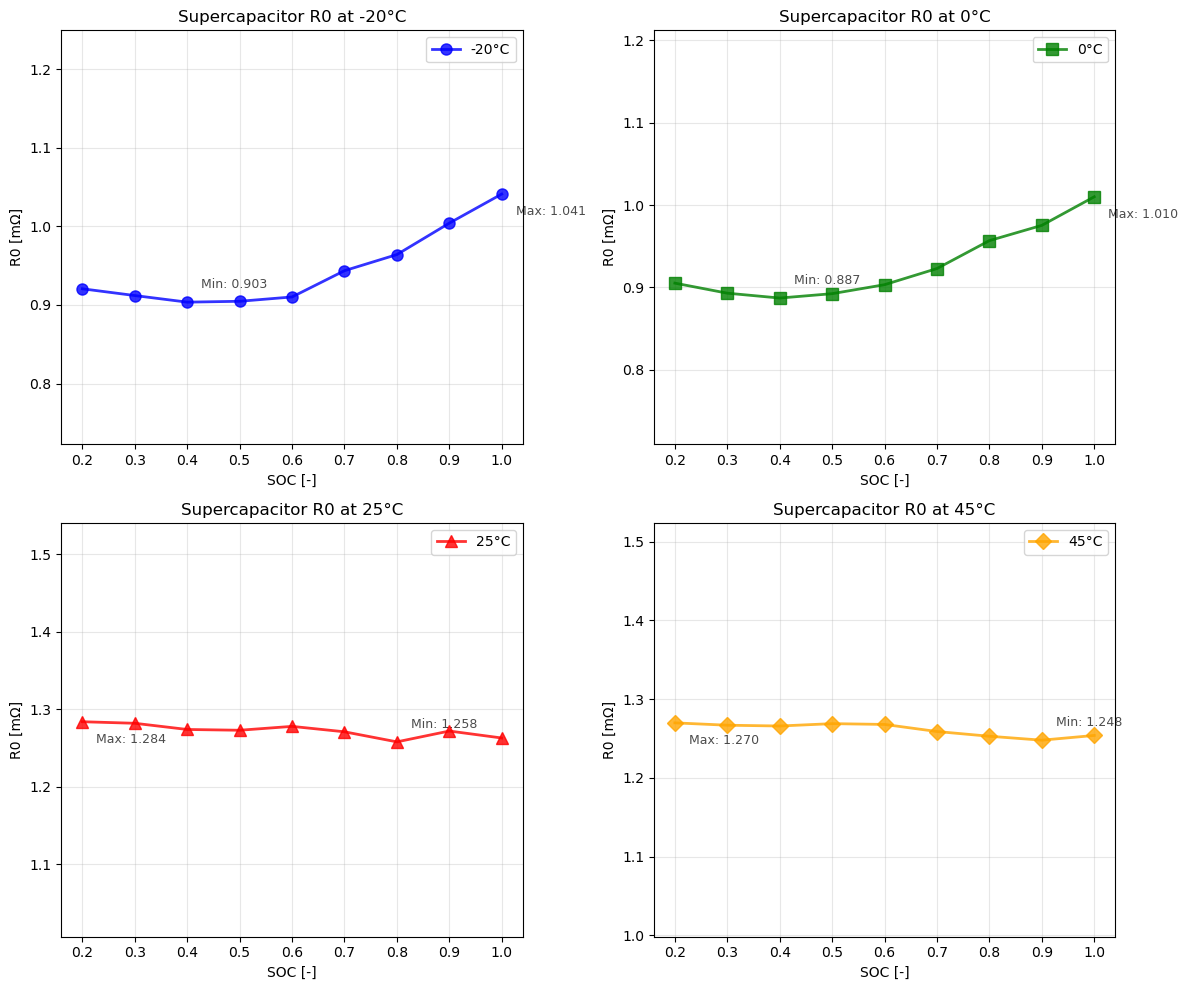

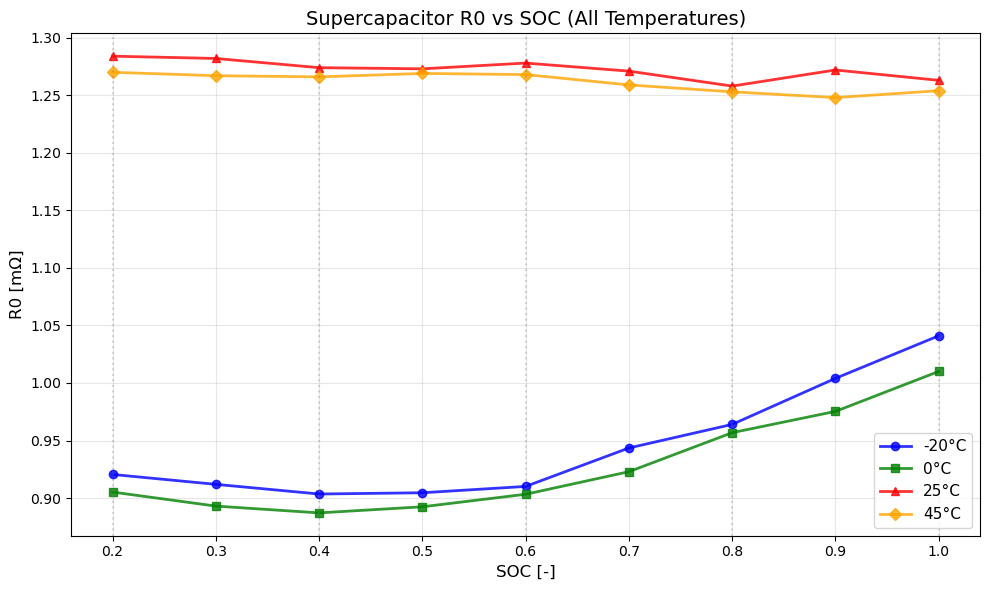

=== Supercapacitor Ïò®ÎèÑÎ≥Ñ R0 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Supercap R0 ÌÜµÍ≥Ñ:
-20¬∞C: ÌèâÍ∑†=0.945 mŒ©, ÏµúÏÜå=0.903 mŒ©, ÏµúÎåÄ=1.041 mŒ©, Î≥ÄÎèôÌè≠=0.138 mŒ©
  0¬∞C: ÌèâÍ∑†=0.927 mŒ©, ÏµúÏÜå=0.887 mŒ©, ÏµúÎåÄ=1.010 mŒ©, Î≥ÄÎèôÌè≠=0.123 mŒ©
 25¬∞C: ÌèâÍ∑†=1.273 mŒ©, ÏµúÏÜå=1.258 mŒ©, ÏµúÎåÄ=1.284 mŒ©, Î≥ÄÎèôÌè≠=0.026 mŒ©
 45¬∞C: ÌèâÍ∑†=1.262 mŒ©, ÏµúÏÜå=1.248 mŒ©, ÏµúÎåÄ=1.270 mŒ©, Î≥ÄÎèôÌè≠=0.022 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
  -20¬∞C: R0 = 0.920 mŒ© (Ïã§Ï†ú SOC: 0.2)
    0¬∞C: R0 = 0.905 mŒ© (Ïã§Ï†ú SOC: 0.2)
   25¬∞C: R0 = 1.284 mŒ© (Ïã§Ï†ú SOC: 0.2)
   45¬∞C: R0 = 1.270 mŒ© (Ïã§Ï†ú SOC: 0.2)

SOC = 0.5:
  -20¬∞C: R0 = 0.905 mŒ© (Ïã§Ï†ú SOC: 0.5)
    0¬∞C: R0 = 0.892 mŒ© (Ïã§Ï†ú SOC: 0.5)
   25¬∞C: R0 = 1.273 mŒ© (Ïã§Ï†ú SOC: 0.5)
   45¬∞C: R0 = 1.269 mŒ© (Ïã§Ï†ú SOC: 0.5)

SOC = 0.8:
  -20¬∞C: R0 = 0.964 mŒ© (Ïã§Ï†ú SOC: 0.8)
    0¬∞C: R0 = 0.957 mŒ© (Ïã§Ï†ú SOC: 0.8)
   25¬∞C: R0 = 1.258 mŒ© (Ïã§Ï†ú SOC: 0.8)
   45¬∞C: R0 = 1.253 mŒ© (Ïã§Ï†ú 

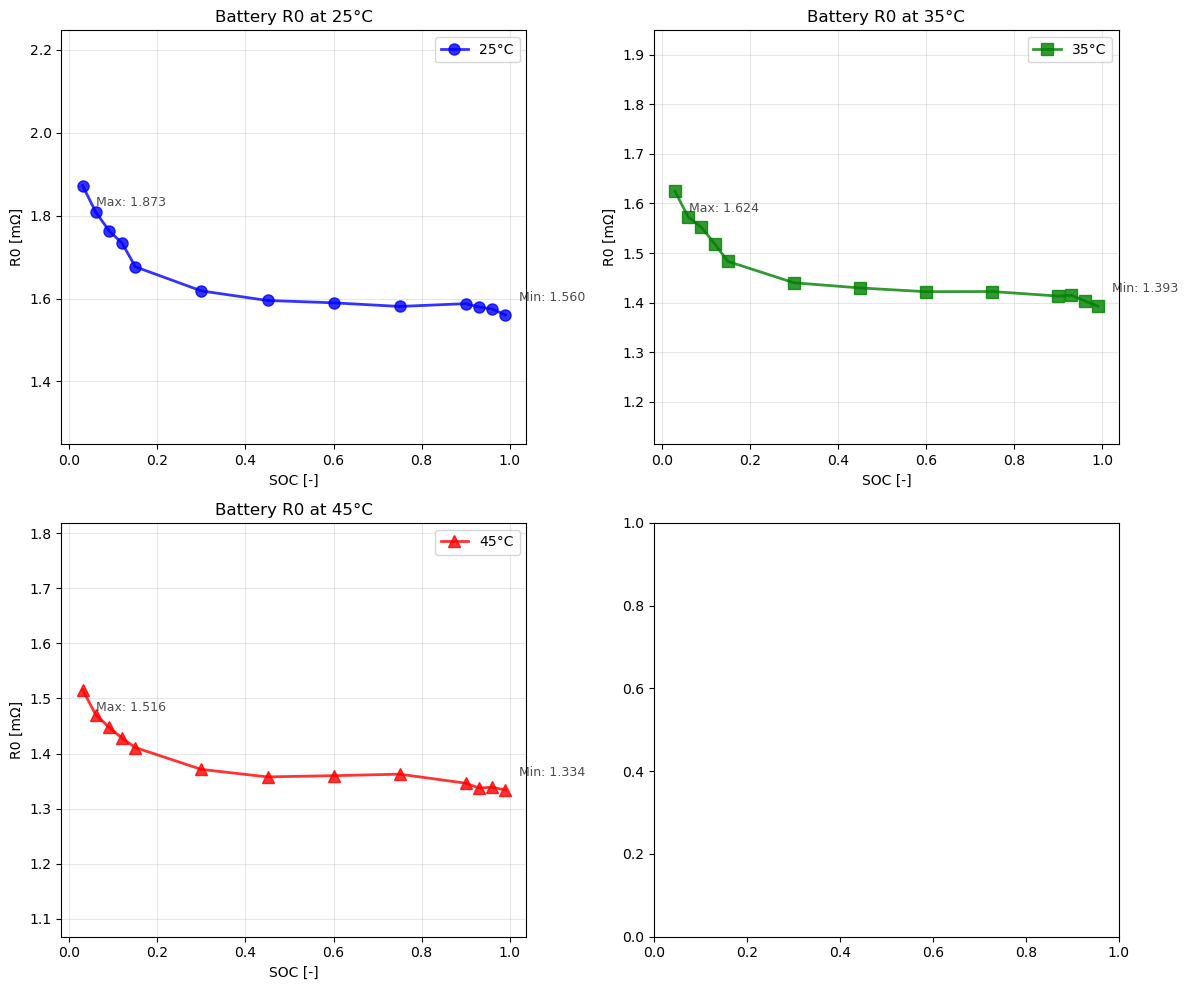

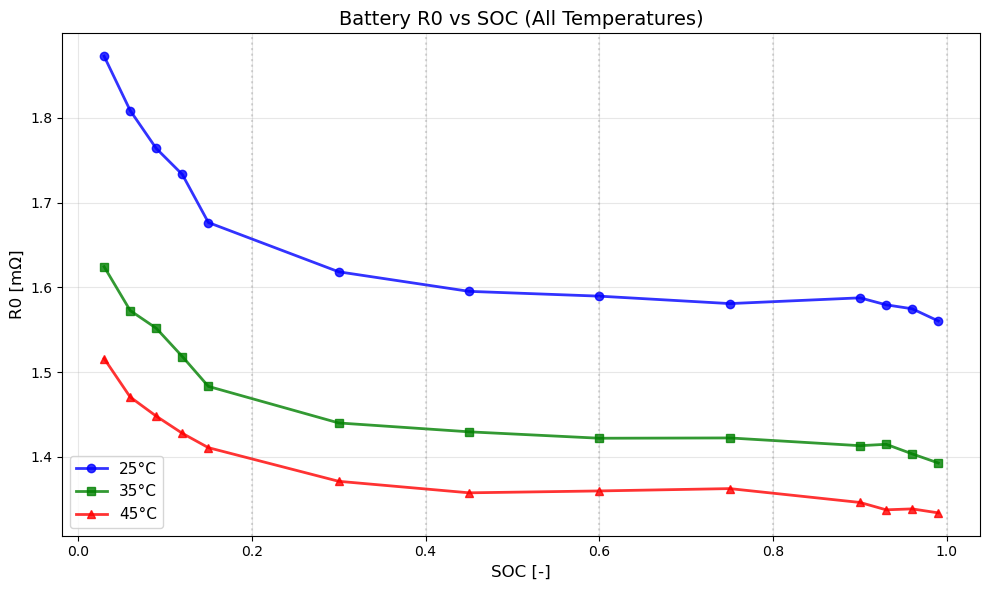

=== Battery Ïò®ÎèÑÎ≥Ñ R0 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Battery R0 ÌÜµÍ≥Ñ:
 25¬∞C: ÌèâÍ∑†=1.657 mŒ©, ÏµúÏÜå=1.560 mŒ©, ÏµúÎåÄ=1.873 mŒ©, Î≥ÄÎèôÌè≠=0.313 mŒ©
 35¬∞C: ÌèâÍ∑†=1.468 mŒ©, ÏµúÏÜå=1.393 mŒ©, ÏµúÎåÄ=1.624 mŒ©, Î≥ÄÎèôÌè≠=0.232 mŒ©
 45¬∞C: ÌèâÍ∑†=1.391 mŒ©, ÏµúÏÜå=1.334 mŒ©, ÏµúÎåÄ=1.516 mŒ©, Î≥ÄÎèôÌè≠=0.182 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
   25¬∞C: R0 = 1.677 mŒ© (Ïã§Ï†ú SOC: 0.15)
   35¬∞C: R0 = 1.483 mŒ© (Ïã§Ï†ú SOC: 0.15)
   45¬∞C: R0 = 1.411 mŒ© (Ïã§Ï†ú SOC: 0.15)

SOC = 0.5:
   25¬∞C: R0 = 1.595 mŒ© (Ïã§Ï†ú SOC: 0.45)
   35¬∞C: R0 = 1.430 mŒ© (Ïã§Ï†ú SOC: 0.45)
   45¬∞C: R0 = 1.358 mŒ© (Ïã§Ï†ú SOC: 0.45)

SOC = 0.8:
   25¬∞C: R0 = 1.581 mŒ© (Ïã§Ï†ú SOC: 0.75)
   35¬∞C: R0 = 1.422 mŒ© (Ïã§Ï†ú SOC: 0.75)
   45¬∞C: R0 = 1.362 mŒ© (Ïã§Ï†ú SOC: 0.75)

SOC = 1.0:
   25¬∞C: R0 = 1.560 mŒ© (Ïã§Ï†ú SOC: 0.99)
   35¬∞C: R0 = 1.393 mŒ© (Ïã§Ï†ú SOC: 0.99)
   45¬∞C: R0 = 1.334 mŒ© (Ïã§Ï†ú SOC: 0.99)

=== Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä) ===
 35¬∞C: R0 ÎπÑÏú® 

In [80]:
results = analyze_R0_temperature_dependency(R0_dict_1, device_type="supercapacitor", show_plots=True)
KETI_batt_results = analyze_R0_temperature_dependency(R0_dict_KETI, device_type="battery", show_plots=True)

# Comparison

ÏäàÌçºÏ∫êÌå®ÏãúÌÑ∞ Ïò®ÎèÑ: [-20, 0, 25, 45]
Î∞∞ÌÑ∞Î¶¨ Ïò®ÎèÑ: [25, 35, 45]


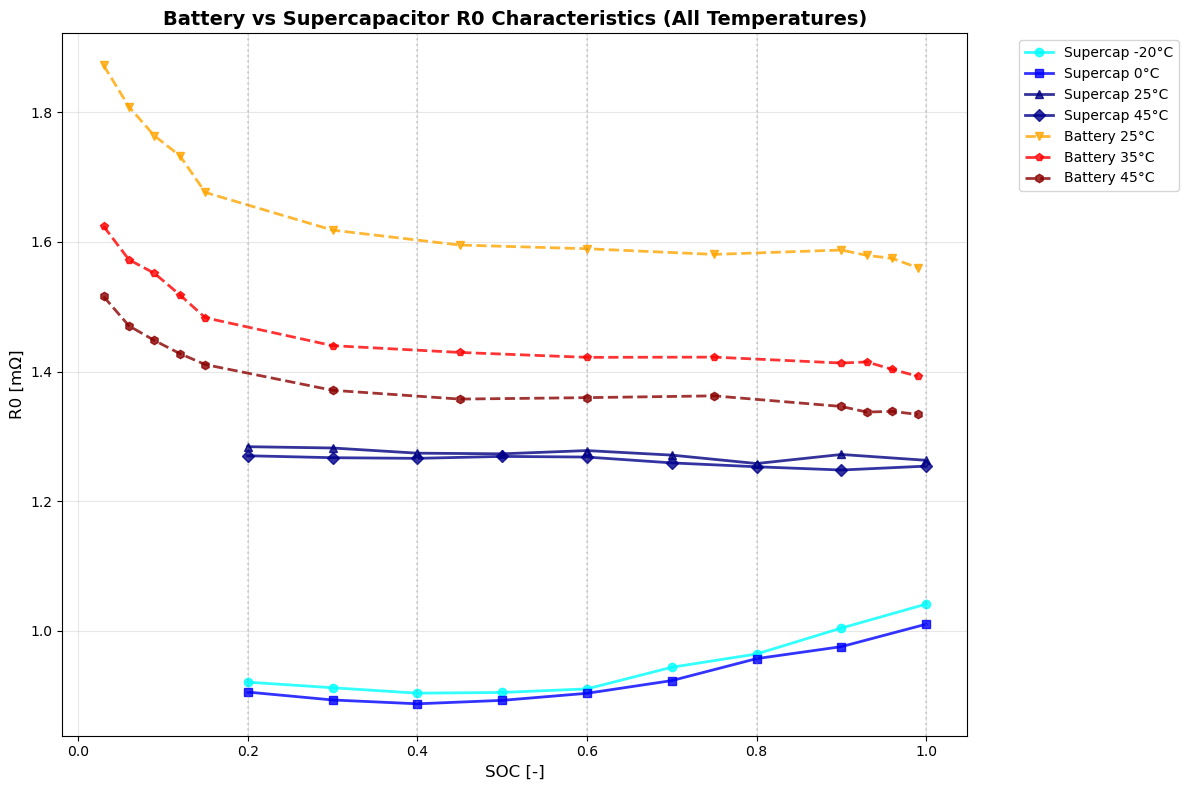


=== Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑† R0 ÎπÑÍµê ÏöîÏïΩ ===
ÏäàÌçºÏ∫êÌå®ÏãúÌÑ∞:
  -20¬∞C: 0.945 mŒ©
    0¬∞C: 0.927 mŒ©
   25¬∞C: 1.273 mŒ©
   45¬∞C: 1.262 mŒ©

Î∞∞ÌÑ∞Î¶¨:
   25¬∞C: 1.657 mŒ©
   35¬∞C: 1.468 mŒ©
   45¬∞C: 1.391 mŒ©

=== Í≥µÌÜµ Ïò®ÎèÑ ([25, 45]) ÏßÅÏ†ë ÎπÑÍµê ===
 25¬∞C: Battery/Supercap = 1.302 (Battery: 1.657 mŒ©, Supercap: 1.273 mŒ©)
 45¬∞C: Battery/Supercap = 1.102 (Battery: 1.391 mŒ©, Supercap: 1.262 mŒ©)


In [53]:
# Î∞∞ÌÑ∞Î¶¨ÏôÄ ÏäàÌçºÏ∫êÌå®ÏãúÌÑ∞Ïùò Î™®Îì† Ïò®ÎèÑ R0 ÌäπÏÑ±ÏùÑ ÌïòÎÇòÏùò ÌîåÎ°ØÏóê Ìï©ÏπòÍ∏∞
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# ÏÉâÏÉÅÍ≥º ÎßàÏª§ ÏÑ§Ï†ï
supercap_colors = ['cyan', 'blue', 'navy', 'darkblue']
battery_colors = ['orange', 'red', 'darkred'] 
supercap_markers = ['o', 's', '^', 'D']
battery_markers = ['v', 'p', 'h']

# ÏäàÌçºÏ∫êÌå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌîåÎ°Ø (Î™®Îì† Ïò®ÎèÑ)
print("ÏäàÌçºÏ∫êÌå®ÏãúÌÑ∞ Ïò®ÎèÑ:", list(R0_dict_1.keys()))
for i, temp in enumerate(sorted(R0_dict_1.keys())):
    data = R0_dict_1[temp]
    soc = data[:, 0]
    r0_mohm = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
    
    plt.plot(soc, r0_mohm, 
             color=supercap_colors[i], 
             marker=supercap_markers[i], 
             linestyle='-',
             linewidth=2, 
             markersize=6, 
             label=f'Supercap {temp}¬∞C', 
             alpha=0.8)

# Î∞∞ÌÑ∞Î¶¨ Îç∞Ïù¥ÌÑ∞ ÌîåÎ°Ø (Î™®Îì† Ïò®ÎèÑ)
print("Î∞∞ÌÑ∞Î¶¨ Ïò®ÎèÑ:", list(R0_dict_KETI.keys()))
for i, temp in enumerate(sorted(R0_dict_KETI.keys())):
    data = R0_dict_KETI[temp]
    soc = data[:, 0]
    r0_mohm = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
    
    plt.plot(soc, r0_mohm, 
             color=battery_colors[i], 
             marker=battery_markers[i], 
             linestyle='--',
             linewidth=2, 
             markersize=6, 
             label=f'Battery {temp}¬∞C', 
             alpha=0.8)

plt.xlabel('SOC [-]', fontsize=12)
plt.ylabel('R0 [mŒ©]', fontsize=12)
plt.title('Battery vs Supercapacitor R0 Characteristics (All Temperatures)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# SOC Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
for soc_line in [0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.axvline(x=soc_line, color='gray', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()

# Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑† R0 ÎπÑÍµê ÏöîÏïΩ
print("\n=== Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑† R0 ÎπÑÍµê ÏöîÏïΩ ===")
print("ÏäàÌçºÏ∫êÌå®ÏãúÌÑ∞:")
for temp in sorted(R0_dict_1.keys()):
    r0_avg = np.mean(R0_dict_1[temp][:, 1] * 1000)
    print(f"  {temp:3d}¬∞C: {r0_avg:.3f} mŒ©")

print("\nÎ∞∞ÌÑ∞Î¶¨:")
for temp in sorted(R0_dict_KETI.keys()):
    r0_avg = np.mean(R0_dict_KETI[temp][:, 1] * 1000)
    print(f"  {temp:3d}¬∞C: {r0_avg:.3f} mŒ©")

# Í≥µÌÜµ Ïò®ÎèÑÏóêÏÑúÏùò ÏßÅÏ†ë ÎπÑÍµê
common_temps = set(R0_dict_1.keys()) & set(R0_dict_KETI.keys())
if common_temps:
    print(f"\n=== Í≥µÌÜµ Ïò®ÎèÑ ({sorted(common_temps)}) ÏßÅÏ†ë ÎπÑÍµê ===")
    for temp in sorted(common_temps):
        supercap_avg = np.mean(R0_dict_1[temp][:, 1] * 1000)
        battery_avg = np.mean(R0_dict_KETI[temp][:, 1] * 1000)
        ratio = battery_avg / supercap_avg
        print(f"{temp:3d}¬∞C: Battery/Supercap = {ratio:.3f} (Battery: {battery_avg:.3f} mŒ©, Supercap: {supercap_avg:.3f} mŒ©)")

# data

In [ ]:
## bat data

In [81]:
R1_table_Bat = np.array([
    [0.000000e+00, 298.150000 ,   308.150000,   318.150000 ],
    [3.000000e-02, 2.447042e-03, 1.422997e-03, 1.054370e-03],
    [6.000000e-02, 1.570703e-03, 1.131760e-03, 9.188304e-04],
    [9.000000e-02, 1.197828e-03, 9.186616e-04, 8.657007e-04],
    [1.200000e-01, 9.989685e-04, 8.348743e-04, 7.726394e-04],
    [1.500000e-01, 1.044312e-03, 9.564878e-04, 8.236010e-04],
    [3.000000e-01, 6.254261e-04, 8.451799e-04, 6.778905e-04],
    [4.500000e-01, 8.206444e-04, 7.814325e-04, 7.971858e-04],
    [6.000000e-01, 8.140708e-04, 8.080259e-04, 7.394437e-04],
    [7.500000e-01, 7.134779e-04, 5.768017e-04, 4.742416e-04],
    [9.000000e-01, 7.342587e-04, 5.864293e-04, 6.878821e-04],
    [9.300000e-01, 6.663595e-04, 6.212866e-04, 6.183215e-04],
    [9.600000e-01, 6.429451e-04, 5.973119e-04, 5.626944e-04],
    [9.900000e-01, 5.569849e-04, 5.182837e-04, 4.611212e-04]])

R2_table_Bat = np.array([
    [0.000000e+00, 298.150000 ,   308.150000,   318.150000 ],     
    [3.000000e-02, 2.899155e-03, 2.246457e-03, 1.960050e-03],
    [6.000000e-02, 2.192447e-03, 1.647496e-03, 1.302513e-03],
    [9.000000e-02, 3.121442e-03, 2.476145e-03, 1.856812e-03],
    [1.200000e-01, 2.373586e-03, 1.786015e-03, 1.378066e-03],
    [1.500000e-01, 1.331568e-03, 9.404784e-04, 7.142121e-04],
    [3.000000e-01, 2.534521e-03, 1.796011e-03, 1.219288e-03],
    [4.500000e-01, 1.672694e-03, 1.276118e-03, 9.736416e-04],
    [6.000000e-01, 9.162371e-04, 6.541277e-04, 5.032941e-04],
    [7.500000e-01, 1.886178e-03, 1.621825e-03, 1.356877e-03],
    [9.000000e-01, 1.223164e-03, 8.699639e-04, 6.974393e-04],
    [9.300000e-01, 1.138986e-03, 8.083451e-04, 6.281841e-04],
    [9.600000e-01, 1.069747e-03, 7.906439e-04, 5.889055e-04],
    [9.900000e-01, 1.009628e-03, 7.557083e-04, 5.717623e-04]])

R1_dict_Bat = create_R0_temp_dict_from_raw(R1_table_Bat, verbose=False)[0]
R2_dict_Bat = create_R0_temp_dict_from_raw(R2_table_Bat, verbose=False)[0]

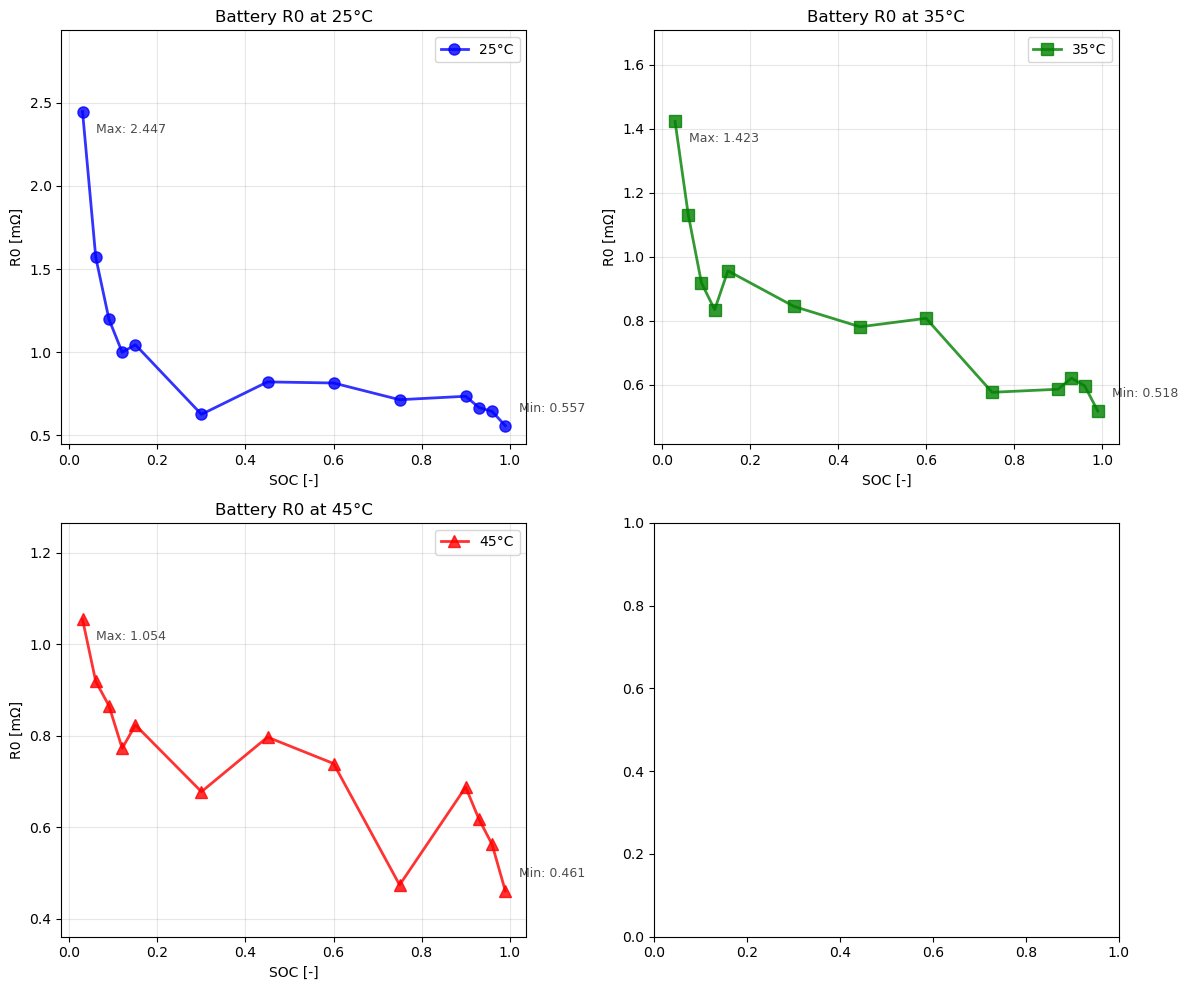

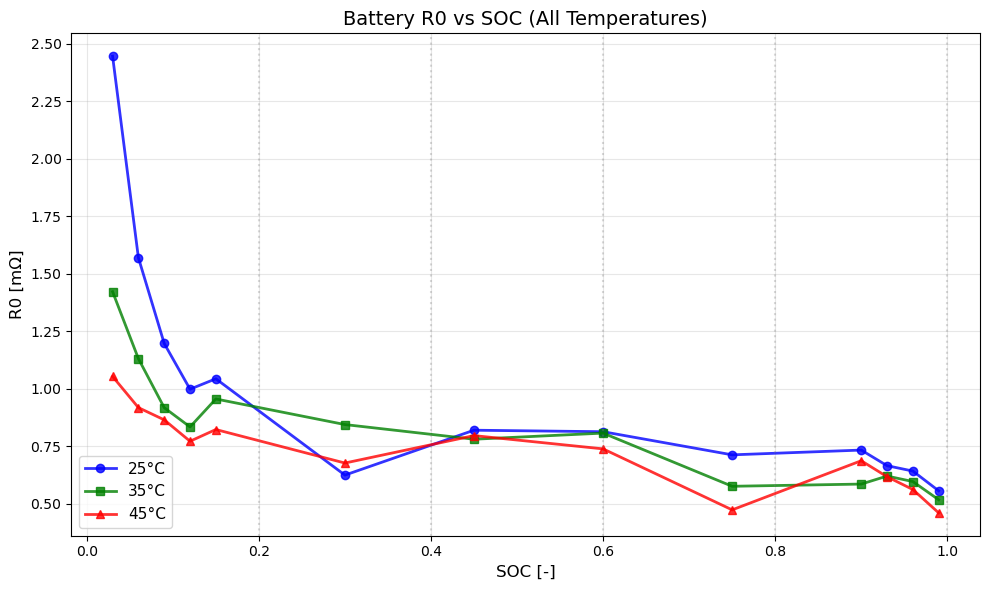

=== Battery Ïò®ÎèÑÎ≥Ñ R0 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Battery R0 ÌÜµÍ≥Ñ:
 25¬∞C: ÌèâÍ∑†=0.987 mŒ©, ÏµúÏÜå=0.557 mŒ©, ÏµúÎåÄ=2.447 mŒ©, Î≥ÄÎèôÌè≠=1.890 mŒ©
 35¬∞C: ÌèâÍ∑†=0.815 mŒ©, ÏµúÏÜå=0.518 mŒ©, ÏµúÎåÄ=1.423 mŒ©, Î≥ÄÎèôÌè≠=0.905 mŒ©
 45¬∞C: ÌèâÍ∑†=0.727 mŒ©, ÏµúÏÜå=0.461 mŒ©, ÏµúÎåÄ=1.054 mŒ©, Î≥ÄÎèôÌè≠=0.593 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
   25¬∞C: R0 = 1.044 mŒ© (Ïã§Ï†ú SOC: 0.15)
   35¬∞C: R0 = 0.956 mŒ© (Ïã§Ï†ú SOC: 0.15)
   45¬∞C: R0 = 0.824 mŒ© (Ïã§Ï†ú SOC: 0.15)

SOC = 0.5:
   25¬∞C: R0 = 0.821 mŒ© (Ïã§Ï†ú SOC: 0.45)
   35¬∞C: R0 = 0.781 mŒ© (Ïã§Ï†ú SOC: 0.45)
   45¬∞C: R0 = 0.797 mŒ© (Ïã§Ï†ú SOC: 0.45)

SOC = 0.8:
   25¬∞C: R0 = 0.713 mŒ© (Ïã§Ï†ú SOC: 0.75)
   35¬∞C: R0 = 0.577 mŒ© (Ïã§Ï†ú SOC: 0.75)
   45¬∞C: R0 = 0.474 mŒ© (Ïã§Ï†ú SOC: 0.75)

SOC = 1.0:
   25¬∞C: R0 = 0.557 mŒ© (Ïã§Ï†ú SOC: 0.99)
   35¬∞C: R0 = 0.518 mŒ© (Ïã§Ï†ú SOC: 0.99)
   45¬∞C: R0 = 0.461 mŒ© (Ïã§Ï†ú SOC: 0.99)

=== Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä) ===
 35¬∞C: R0 ÎπÑÏú® 

In [82]:
R1_results_Bat = analyze_R0_temperature_dependency(R1_dict_Bat, device_type="battery", show_plots=True)

ÏÉàÎ°úÏö¥ parameter_type Í∏∞Îä• ÏÇ¨Ïö© ÏòàÏãú

1. R0 ÌååÎùºÎØ∏ÌÑ∞ Î∂ÑÏÑù:


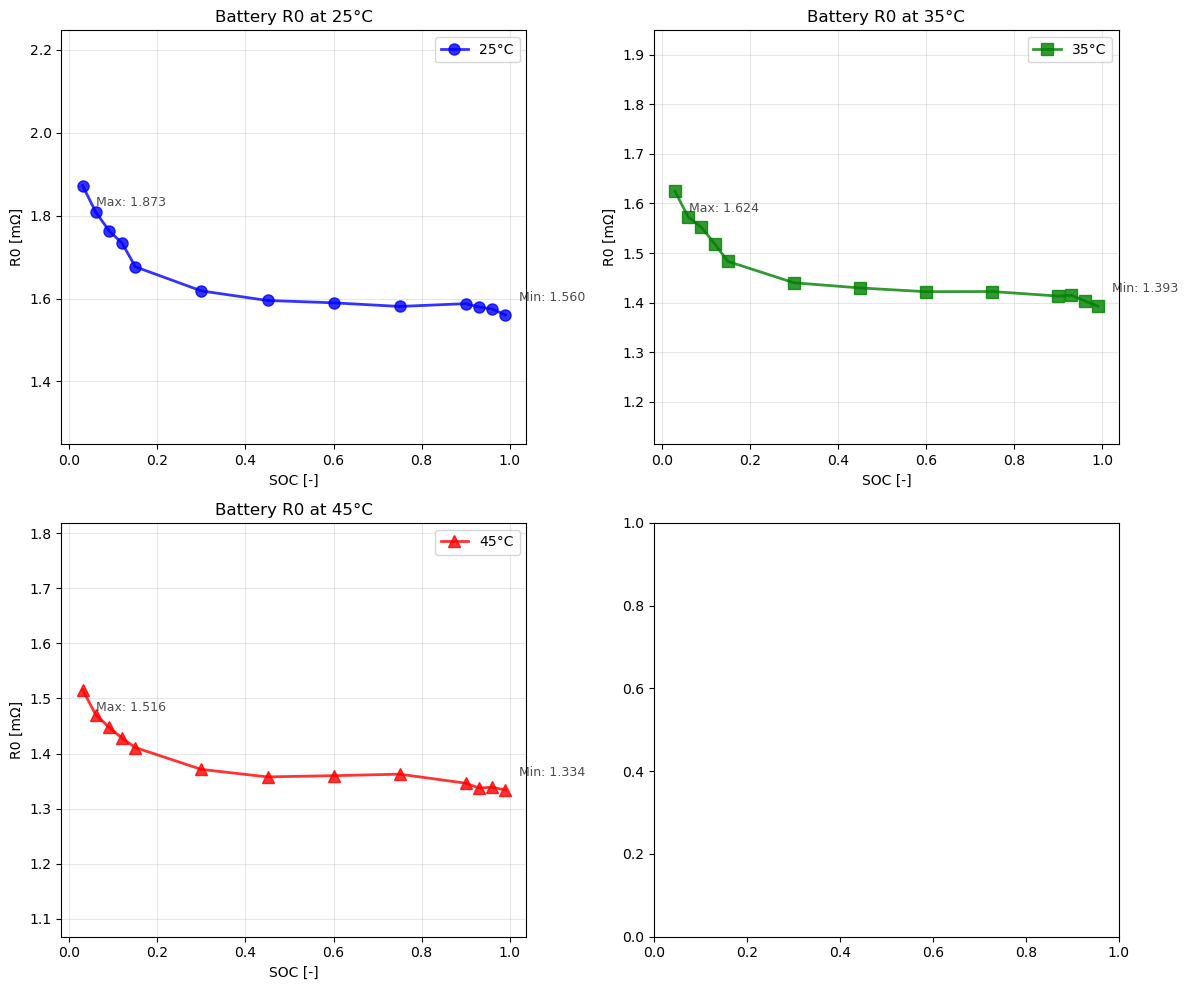

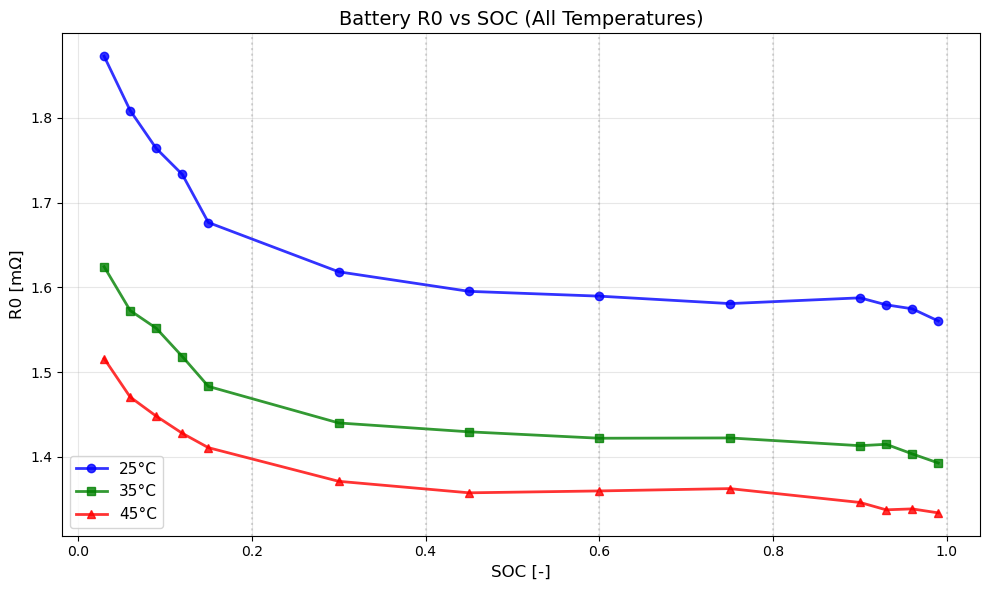

=== Battery Ïò®ÎèÑÎ≥Ñ R0 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Battery R0 ÌÜµÍ≥Ñ:
 25¬∞C: ÌèâÍ∑†=1.657 mŒ©, ÏµúÏÜå=1.560 mŒ©, ÏµúÎåÄ=1.873 mŒ©, Î≥ÄÎèôÌè≠=0.313 mŒ©
 35¬∞C: ÌèâÍ∑†=1.468 mŒ©, ÏµúÏÜå=1.393 mŒ©, ÏµúÎåÄ=1.624 mŒ©, Î≥ÄÎèôÌè≠=0.232 mŒ©
 45¬∞C: ÌèâÍ∑†=1.391 mŒ©, ÏµúÏÜå=1.334 mŒ©, ÏµúÎåÄ=1.516 mŒ©, Î≥ÄÎèôÌè≠=0.182 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
   25¬∞C: R0 = 1.677 mŒ© (Ïã§Ï†ú SOC: 0.15)
   35¬∞C: R0 = 1.483 mŒ© (Ïã§Ï†ú SOC: 0.15)
   45¬∞C: R0 = 1.411 mŒ© (Ïã§Ï†ú SOC: 0.15)

SOC = 0.5:
   25¬∞C: R0 = 1.595 mŒ© (Ïã§Ï†ú SOC: 0.45)
   35¬∞C: R0 = 1.430 mŒ© (Ïã§Ï†ú SOC: 0.45)
   45¬∞C: R0 = 1.358 mŒ© (Ïã§Ï†ú SOC: 0.45)

SOC = 0.8:
   25¬∞C: R0 = 1.581 mŒ© (Ïã§Ï†ú SOC: 0.75)
   35¬∞C: R0 = 1.422 mŒ© (Ïã§Ï†ú SOC: 0.75)
   45¬∞C: R0 = 1.362 mŒ© (Ïã§Ï†ú SOC: 0.75)

SOC = 1.0:
   25¬∞C: R0 = 1.560 mŒ© (Ïã§Ï†ú SOC: 0.99)
   35¬∞C: R0 = 1.393 mŒ© (Ïã§Ï†ú SOC: 0.99)
   45¬∞C: R0 = 1.334 mŒ© (Ïã§Ï†ú SOC: 0.99)

=== Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä) ===
 35¬∞C: R0 ÎπÑÏú® 

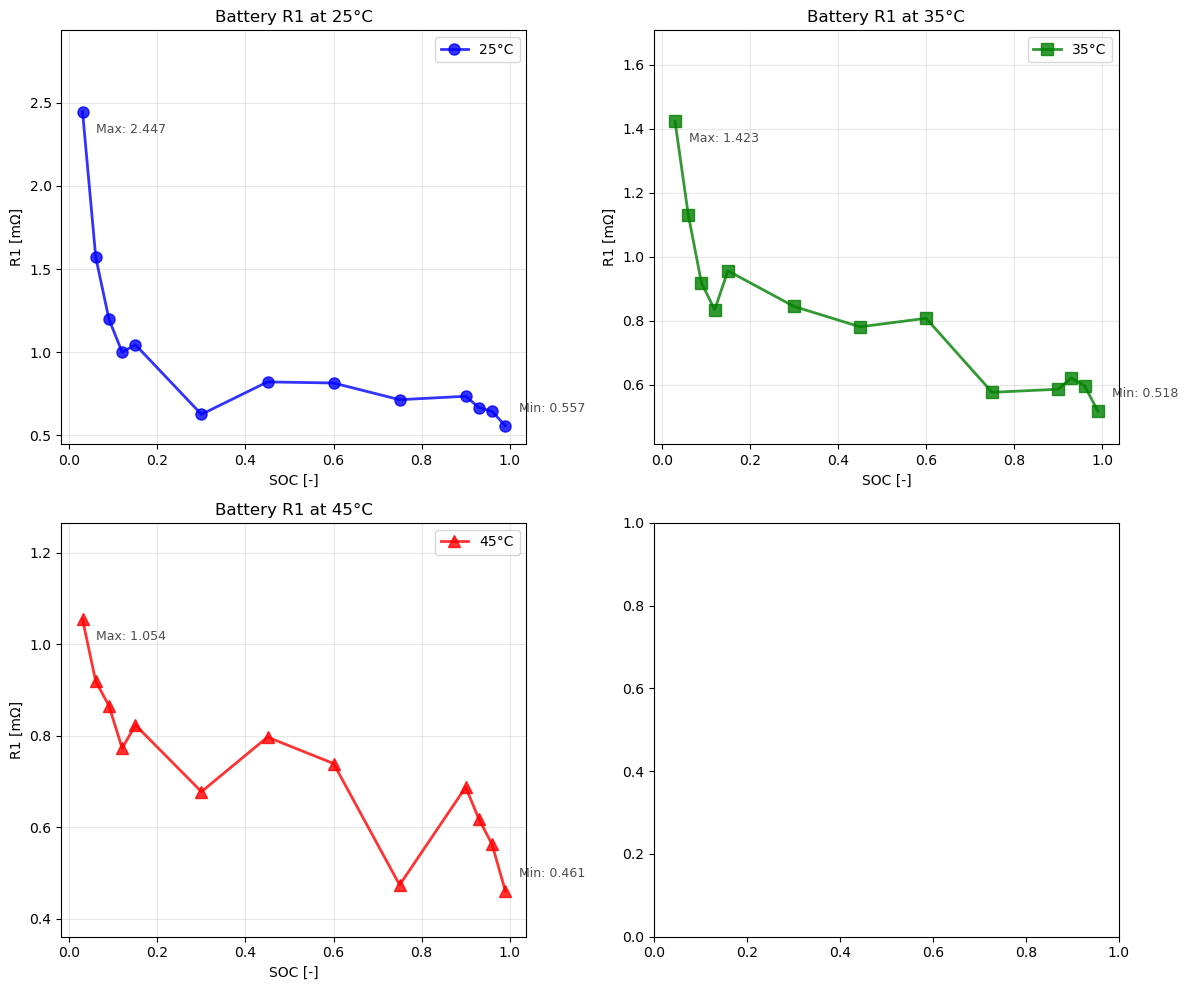

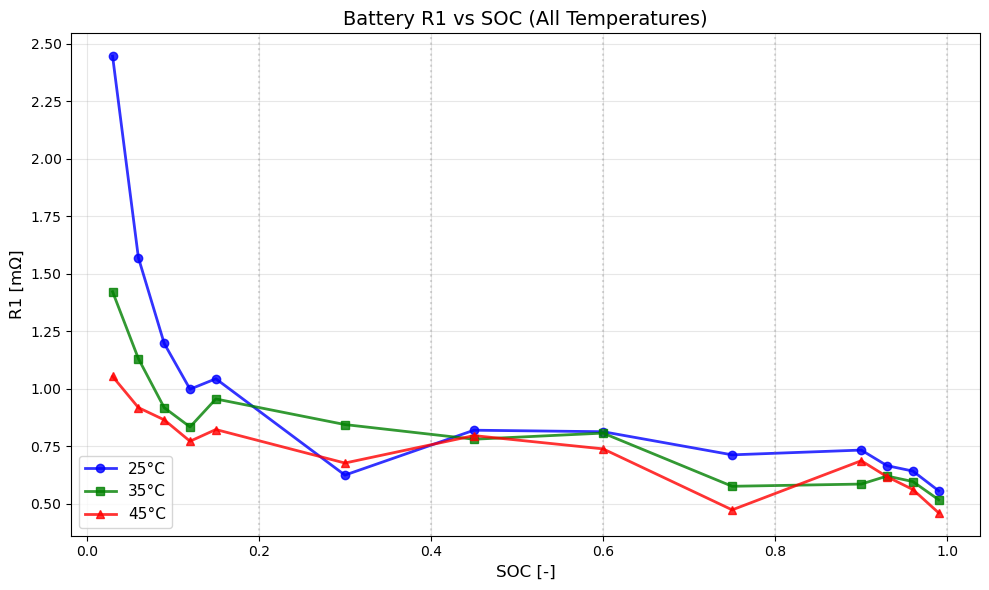

=== Battery Ïò®ÎèÑÎ≥Ñ R1 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Battery R1 ÌÜµÍ≥Ñ:
 25¬∞C: ÌèâÍ∑†=0.987 mŒ©, ÏµúÏÜå=0.557 mŒ©, ÏµúÎåÄ=2.447 mŒ©, Î≥ÄÎèôÌè≠=1.890 mŒ©
 35¬∞C: ÌèâÍ∑†=0.815 mŒ©, ÏµúÏÜå=0.518 mŒ©, ÏµúÎåÄ=1.423 mŒ©, Î≥ÄÎèôÌè≠=0.905 mŒ©
 45¬∞C: ÌèâÍ∑†=0.727 mŒ©, ÏµúÏÜå=0.461 mŒ©, ÏµúÎåÄ=1.054 mŒ©, Î≥ÄÎèôÌè≠=0.593 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
   25¬∞C: R1 = 1.044 mŒ© (Ïã§Ï†ú SOC: 0.15)
   35¬∞C: R1 = 0.956 mŒ© (Ïã§Ï†ú SOC: 0.15)
   45¬∞C: R1 = 0.824 mŒ© (Ïã§Ï†ú SOC: 0.15)

SOC = 0.5:
   25¬∞C: R1 = 0.821 mŒ© (Ïã§Ï†ú SOC: 0.45)
   35¬∞C: R1 = 0.781 mŒ© (Ïã§Ï†ú SOC: 0.45)
   45¬∞C: R1 = 0.797 mŒ© (Ïã§Ï†ú SOC: 0.45)

SOC = 0.8:
   25¬∞C: R1 = 0.713 mŒ© (Ïã§Ï†ú SOC: 0.75)
   35¬∞C: R1 = 0.577 mŒ© (Ïã§Ï†ú SOC: 0.75)
   45¬∞C: R1 = 0.474 mŒ© (Ïã§Ï†ú SOC: 0.75)

SOC = 1.0:
   25¬∞C: R1 = 0.557 mŒ© (Ïã§Ï†ú SOC: 0.99)
   35¬∞C: R1 = 0.518 mŒ© (Ïã§Ï†ú SOC: 0.99)
   45¬∞C: R1 = 0.461 mŒ© (Ïã§Ï†ú SOC: 0.99)

=== Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä) ===
 35¬∞C: R1 ÎπÑÏú® 

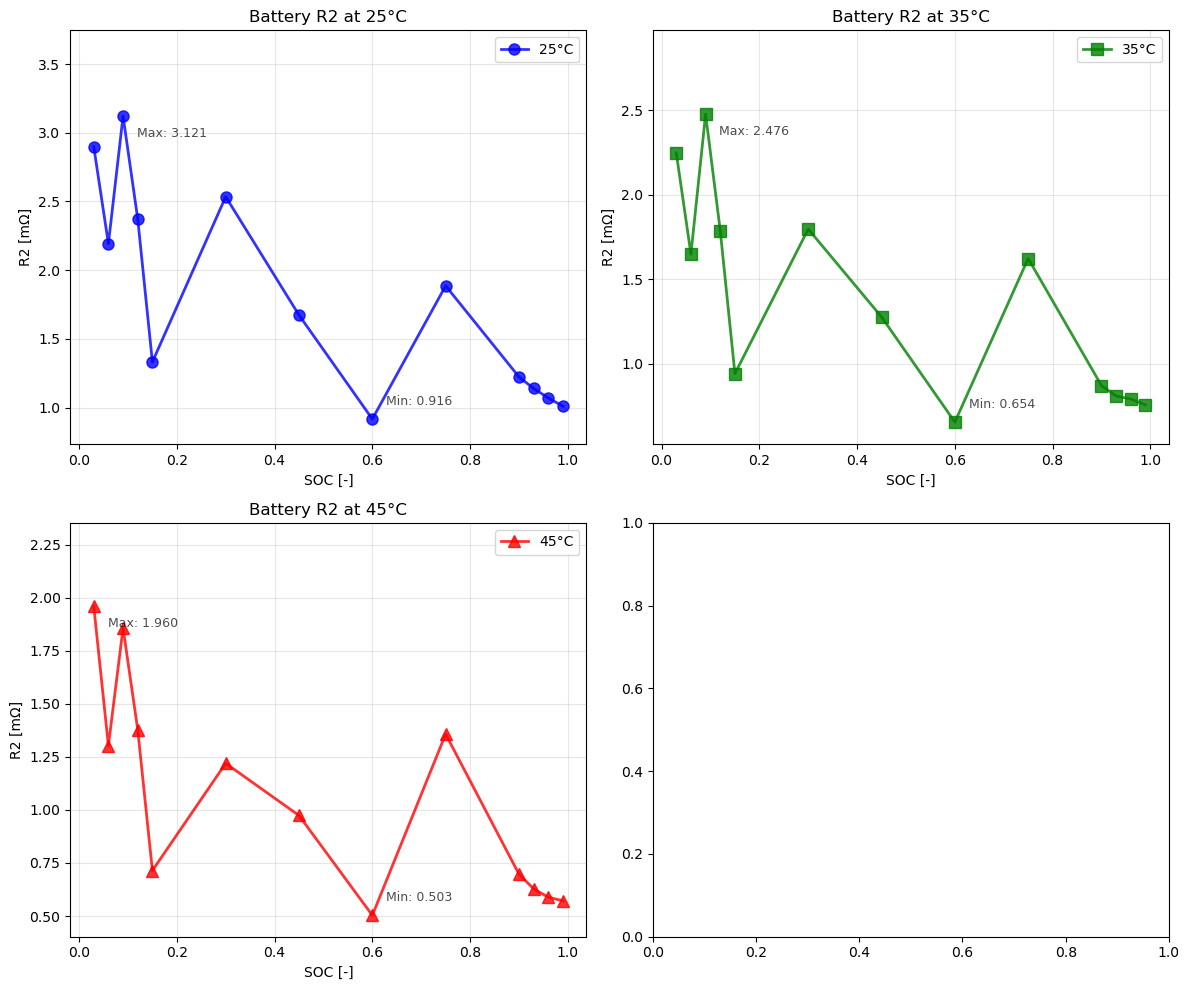

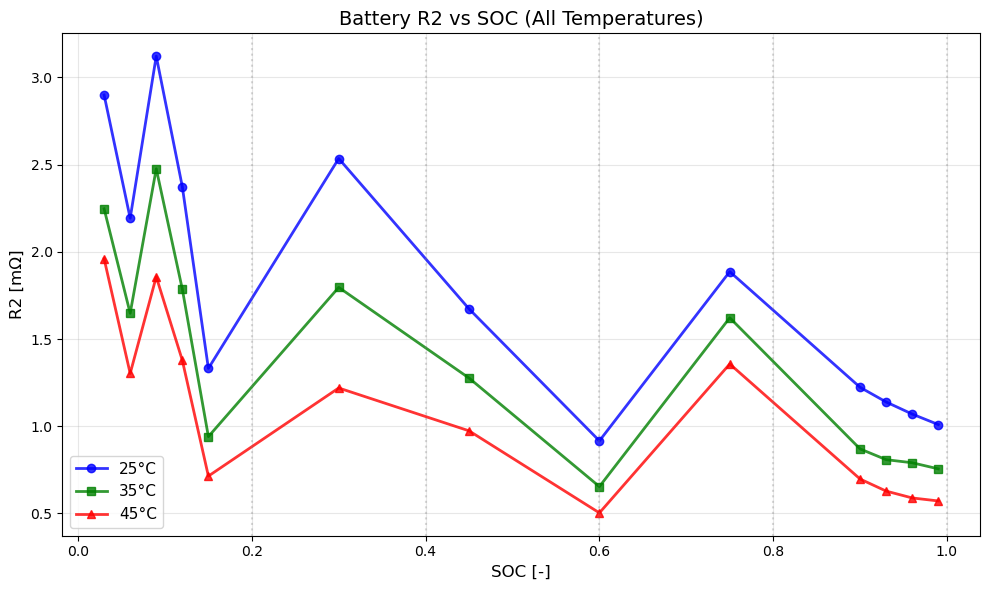

=== Battery Ïò®ÎèÑÎ≥Ñ R2 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Battery R2 ÌÜµÍ≥Ñ:
 25¬∞C: ÌèâÍ∑†=1.798 mŒ©, ÏµúÏÜå=0.916 mŒ©, ÏµúÎåÄ=3.121 mŒ©, Î≥ÄÎèôÌè≠=2.205 mŒ©
 35¬∞C: ÌèâÍ∑†=1.359 mŒ©, ÏµúÏÜå=0.654 mŒ©, ÏµúÎåÄ=2.476 mŒ©, Î≥ÄÎèôÌè≠=1.822 mŒ©
 45¬∞C: ÌèâÍ∑†=1.058 mŒ©, ÏµúÏÜå=0.503 mŒ©, ÏµúÎåÄ=1.960 mŒ©, Î≥ÄÎèôÌè≠=1.457 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
   25¬∞C: R2 = 1.332 mŒ© (Ïã§Ï†ú SOC: 0.15)
   35¬∞C: R2 = 0.940 mŒ© (Ïã§Ï†ú SOC: 0.15)
   45¬∞C: R2 = 0.714 mŒ© (Ïã§Ï†ú SOC: 0.15)

SOC = 0.5:
   25¬∞C: R2 = 1.673 mŒ© (Ïã§Ï†ú SOC: 0.45)
   35¬∞C: R2 = 1.276 mŒ© (Ïã§Ï†ú SOC: 0.45)
   45¬∞C: R2 = 0.974 mŒ© (Ïã§Ï†ú SOC: 0.45)

SOC = 0.8:
   25¬∞C: R2 = 1.886 mŒ© (Ïã§Ï†ú SOC: 0.75)
   35¬∞C: R2 = 1.622 mŒ© (Ïã§Ï†ú SOC: 0.75)
   45¬∞C: R2 = 1.357 mŒ© (Ïã§Ï†ú SOC: 0.75)

SOC = 1.0:
   25¬∞C: R2 = 1.010 mŒ© (Ïã§Ï†ú SOC: 0.99)
   35¬∞C: R2 = 0.756 mŒ© (Ïã§Ï†ú SOC: 0.99)
   45¬∞C: R2 = 0.572 mŒ© (Ïã§Ï†ú SOC: 0.99)

=== Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä) ===
 35¬∞C: R2 ÎπÑÏú® 

In [84]:
# ÏÉàÎ°úÏö¥ parameter_type Í∏∞Îä• ÏÇ¨Ïö© ÏòàÏãú
print("=" * 60)
print("ÏÉàÎ°úÏö¥ parameter_type Í∏∞Îä• ÏÇ¨Ïö© ÏòàÏãú")
print("=" * 60)

# 1. R0 Î∂ÑÏÑù
print("\n1. R0 ÌååÎùºÎØ∏ÌÑ∞ Î∂ÑÏÑù:")
R0_results = analyze_R0_temperature_dependency(R0_dict_KETI, device_type="battery", parameter_type="R0", show_plots=True)

# 2. R1 Î∂ÑÏÑù  
print("\n2. R1 ÌååÎùºÎØ∏ÌÑ∞ Î∂ÑÏÑù:")
R1_results = analyze_R0_temperature_dependency(R1_dict_Bat, device_type="battery", parameter_type="R1", show_plots=True)

# 3. R2 Î∂ÑÏÑù
print("\n3. R2 ÌååÎùºÎØ∏ÌÑ∞ Î∂ÑÏÑù:")
R2_results = analyze_R0_temperature_dependency(R2_dict_Bat, device_type="battery", parameter_type="R2", show_plots=True)

# 25¬∞CÏóêÏÑú R0, R1, R2 ÌèâÍ∑†Í∞í ÎπÑÍµê
print("\n" + "=" * 40)
print("25¬∞CÏóêÏÑú ÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê")
print("=" * 40)
print(f"R0 ÌèâÍ∑†: {R0_results['stats'][25]['mean']:.3f} mŒ©")
print(f"R1 ÌèâÍ∑†: {R1_results['stats'][25]['mean']:.3f} mŒ©") 
print(f"R2 ÌèâÍ∑†: {R2_results['stats'][25]['mean']:.3f} mŒ©")

print(f"\nR1/R0 ÎπÑÏú®: {R1_results['stats'][25]['mean']/R0_results['stats'][25]['mean']:.3f}")
print(f"R2/R0 ÎπÑÏú®: {R2_results['stats'][25]['mean']/R0_results['stats'][25]['mean']:.3f}")
print(f"R2/R1 ÎπÑÏú®: {R2_results['stats'][25]['mean']/R1_results['stats'][25]['mean']:.3f}")

In [90]:
C1_table=np.array([
[0.000000e+00, 298.150000 ,   308.150000,   318.150000 ],
[3.000000e-02, 2.336172e+03, 6.777515e+03, 1.059697e+04],
[6.000000e-02, 4.357307e+03, 9.679760e+03, 1.311987e+04],
[9.000000e-02, 7.018780e+03, 1.080704e+04, 1.414417e+04],
[1.200000e-01, 8.313901e+03, 1.140659e+04, 1.405693e+04],
[1.500000e-01, 8.249087e+03, 1.305118e+04, 1.544458e+04],
[3.000000e-01, 2.363232e+04, 2.682024e+04, 2.376483e+04],
[4.500000e-01, 2.220244e+04, 2.438495e+04, 2.932131e+04],
[6.000000e-01, 2.292081e+04, 2.615972e+04, 2.603091e+04],
[7.500000e-01, 1.292289e+04, 1.107101e+04, 1.046948e+04],
[9.000000e-01, 1.371117e+04, 1.172823e+04, 1.603426e+04],
[9.300000e-01, 1.326310e+04, 1.423360e+04, 1.655660e+04],
[9.600000e-01, 1.474319e+04, 1.605623e+04, 1.825788e+04],
[9.900000e-01, 1.579439e+04, 1.691570e+04, 1.782504e+04]
])
C2_table=np.array([
[0.000000e+00, 298.150000 ,   308.150000,   318.150000],
[3.000000e-02, 5.705628e+04, 1.024583e+05, 1.349575e+05],
[6.000000e-02, 6.140909e+04, 1.182119e+05, 1.745968e+05],
[9.000000e-02, 4.605839e+04, 5.851566e+04, 8.353931e+04],
[1.200000e-01, 5.210580e+04, 6.515615e+04, 8.226233e+04],
[1.500000e-01, 9.042505e+04, 1.588267e+05, 2.026856e+05],
[3.000000e-01, 7.995246e+04, 1.185663e+05, 1.338692e+05],
[4.500000e-01, 1.030074e+05, 1.323853e+05, 1.941136e+05],
[6.000000e-01, 2.039551e+05, 3.314338e+05, 4.273869e+05],
[7.500000e-01, 1.117931e+05, 1.159134e+05, 1.206234e+05],
[9.000000e-01, 1.041175e+05, 9.619967e+04, 2.582847e+05],
[9.300000e-01, 9.939141e+04, 1.431798e+05, 2.341501e+05],
[9.600000e-01, 1.160950e+05, 1.615641e+05, 2.513323e+05],
[9.900000e-01, 1.100750e+05, 1.474430e+05, 1.785941e+05]
])

In [95]:
c1_dict_Bat = create_R0_temp_dict_from_raw(C1_table, verbose=False)[0]
c2_dict_Bat = create_R0_temp_dict_from_raw(C2_table, verbose=False)[0]

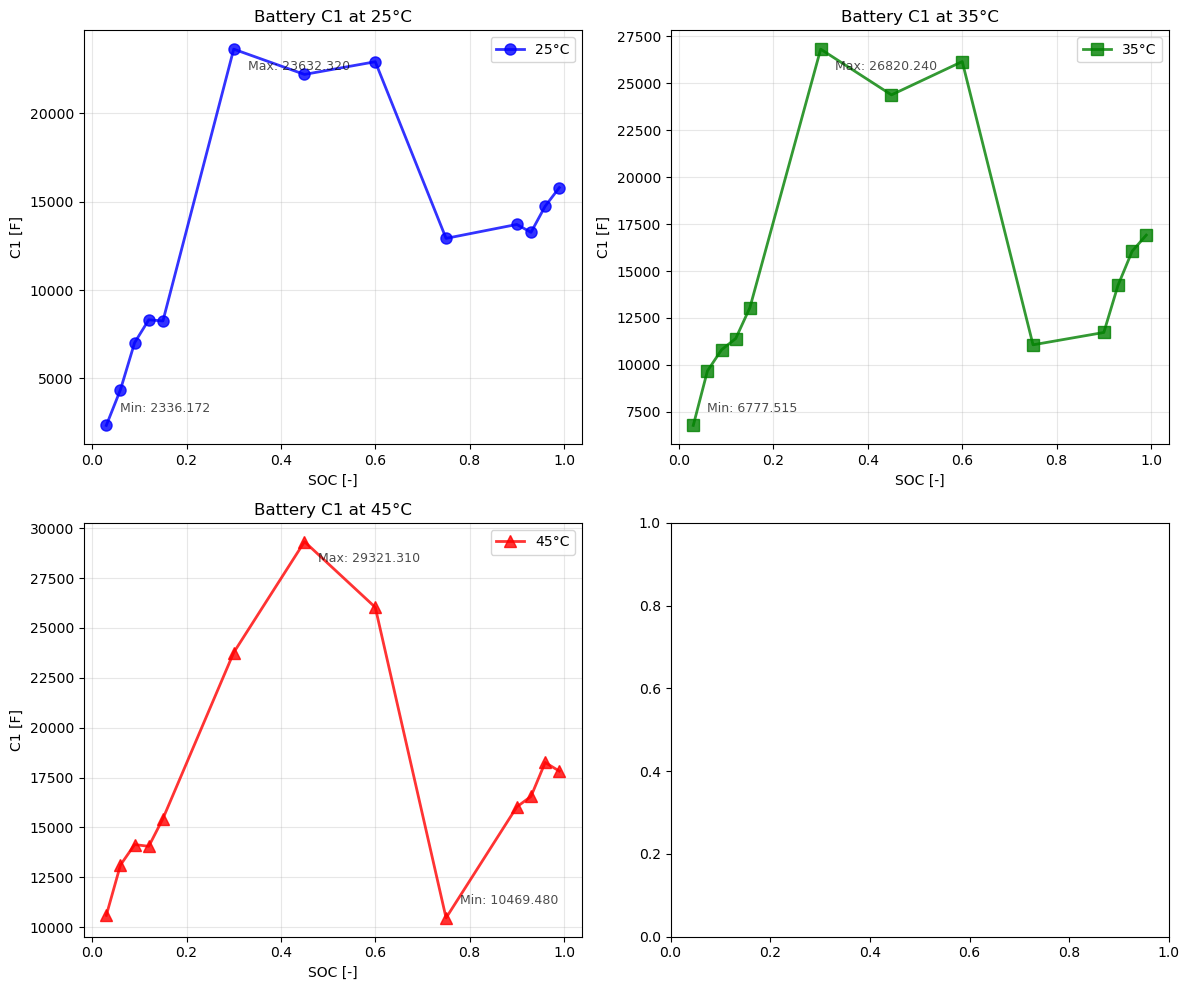

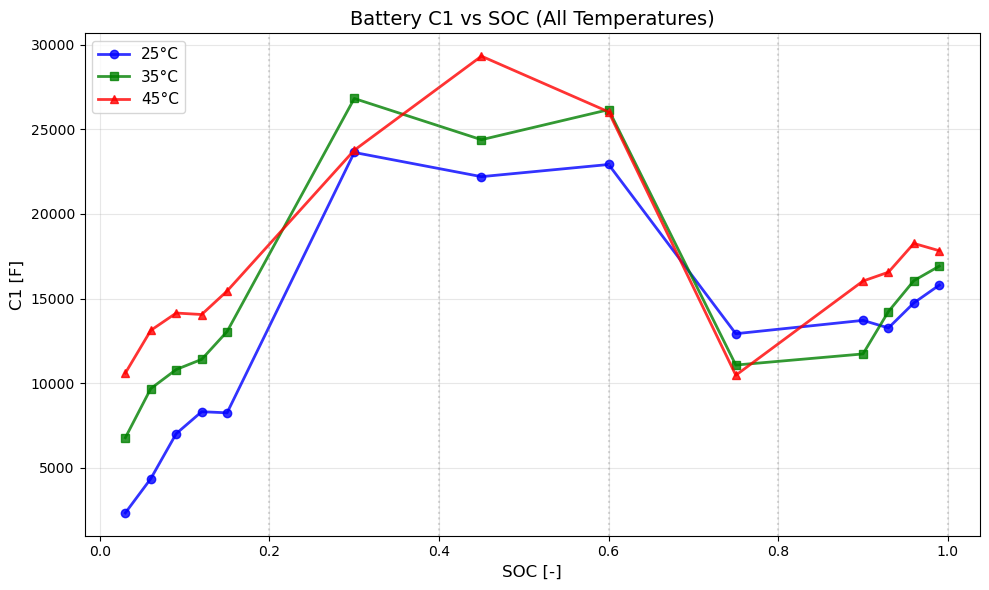

=== Battery Ïò®ÎèÑÎ≥Ñ C1 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Battery C1 ÌÜµÍ≥Ñ:
 25¬∞C: ÌèâÍ∑†=13035.812 F, ÏµúÏÜå=2336.172 F, ÏµúÎåÄ=23632.320 F, Î≥ÄÎèôÌè≠=21296.148 F
 35¬∞C: ÌèâÍ∑†=15314.751 F, ÏµúÏÜå=6777.515 F, ÏµúÎåÄ=26820.240 F, Î≥ÄÎèôÌè≠=20042.725 F
 45¬∞C: ÌèâÍ∑†=17355.602 F, ÏµúÏÜå=10469.480 F, ÏµúÎåÄ=29321.310 F, Î≥ÄÎèôÌè≠=18851.830 F

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
   25¬∞C: C1 = 8249.087 F (Ïã§Ï†ú SOC: 0.15)
   35¬∞C: C1 = 13051.180 F (Ïã§Ï†ú SOC: 0.15)
   45¬∞C: C1 = 15444.580 F (Ïã§Ï†ú SOC: 0.15)

SOC = 0.5:
   25¬∞C: C1 = 22202.440 F (Ïã§Ï†ú SOC: 0.45)
   35¬∞C: C1 = 24384.950 F (Ïã§Ï†ú SOC: 0.45)
   45¬∞C: C1 = 29321.310 F (Ïã§Ï†ú SOC: 0.45)

SOC = 0.8:
   25¬∞C: C1 = 12922.890 F (Ïã§Ï†ú SOC: 0.75)
   35¬∞C: C1 = 11071.010 F (Ïã§Ï†ú SOC: 0.75)
   45¬∞C: C1 = 10469.480 F (Ïã§Ï†ú SOC: 0.75)

SOC = 1.0:
   25¬∞C: C1 = 15794.390 F (Ïã§Ï†ú SOC: 0.99)
   35¬∞C: C1 = 16915.700 F (Ïã§Ï†ú SOC: 0.99)
   45¬∞C: C1 = 17825.040 F (Ïã§Ï†ú SOC: 0.99)

=== Ïò®ÎèÑ

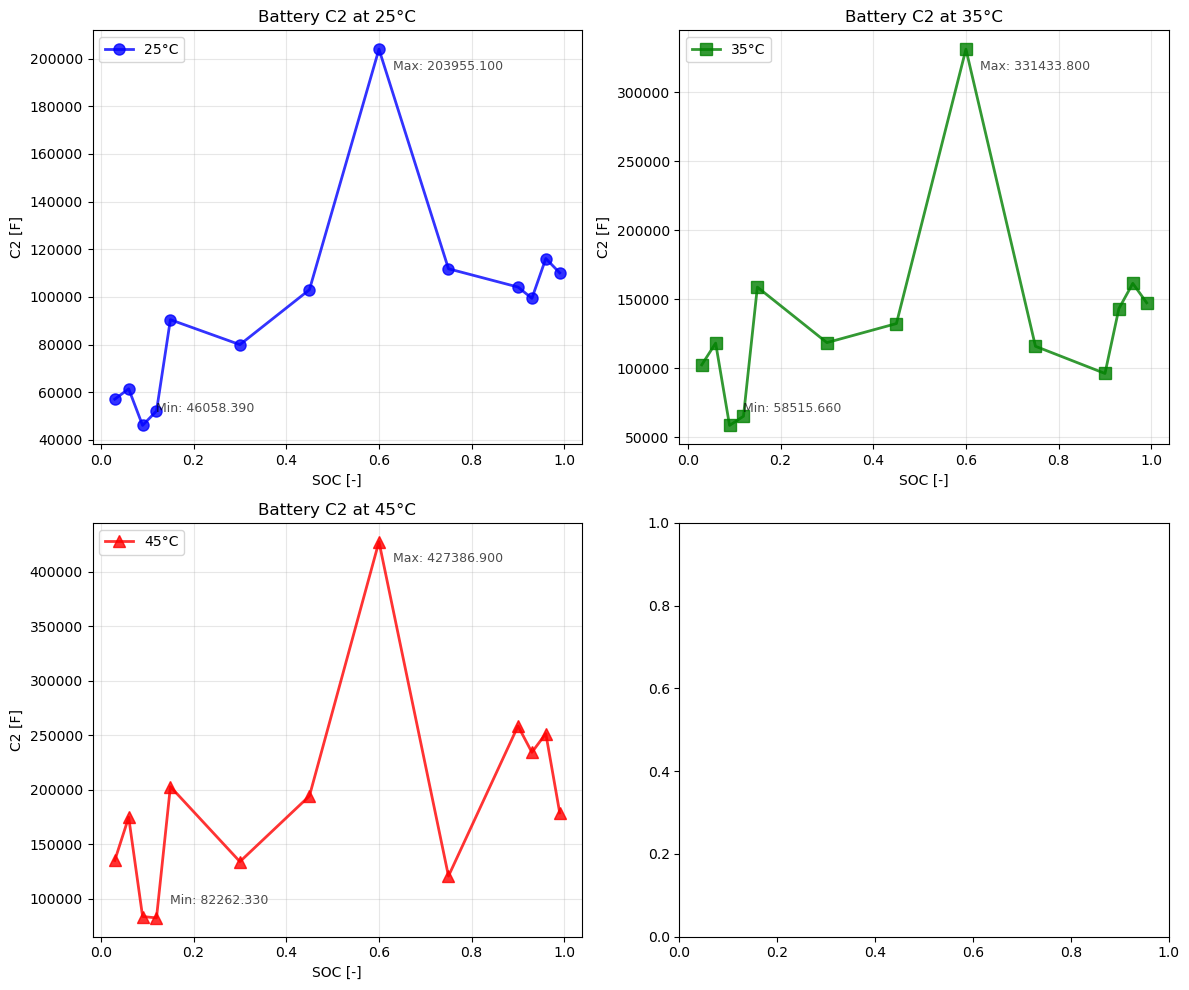

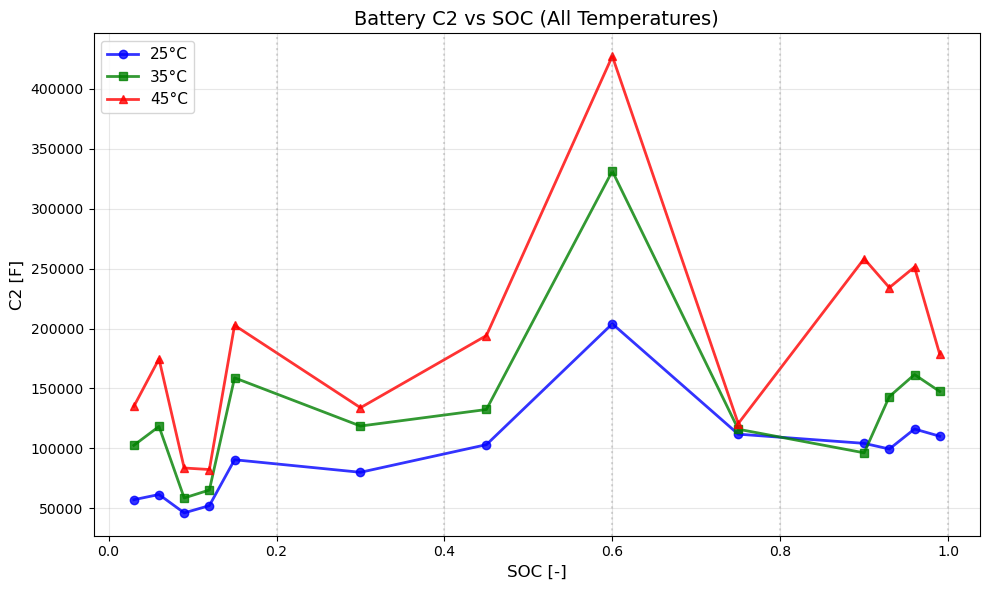

=== Battery Ïò®ÎèÑÎ≥Ñ C2 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Battery C2 ÌÜµÍ≥Ñ:
 25¬∞C: ÌèâÍ∑†=95033.968 F, ÏµúÏÜå=46058.390 F, ÏµúÎåÄ=203955.100 F, Î≥ÄÎèôÌè≠=157896.710 F
 35¬∞C: ÌèâÍ∑†=134604.160 F, ÏµúÏÜå=58515.660 F, ÏµúÎåÄ=331433.800 F, Î≥ÄÎèôÌè≠=272918.140 F
 45¬∞C: ÌèâÍ∑†=190491.988 F, ÏµúÏÜå=82262.330 F, ÏµúÎåÄ=427386.900 F, Î≥ÄÎèôÌè≠=345124.570 F

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
   25¬∞C: C2 = 90425.050 F (Ïã§Ï†ú SOC: 0.15)
   35¬∞C: C2 = 158826.700 F (Ïã§Ï†ú SOC: 0.15)
   45¬∞C: C2 = 202685.600 F (Ïã§Ï†ú SOC: 0.15)

SOC = 0.5:
   25¬∞C: C2 = 103007.400 F (Ïã§Ï†ú SOC: 0.45)
   35¬∞C: C2 = 132385.300 F (Ïã§Ï†ú SOC: 0.45)
   45¬∞C: C2 = 194113.600 F (Ïã§Ï†ú SOC: 0.45)

SOC = 0.8:
   25¬∞C: C2 = 111793.100 F (Ïã§Ï†ú SOC: 0.75)
   35¬∞C: C2 = 115913.400 F (Ïã§Ï†ú SOC: 0.75)
   45¬∞C: C2 = 120623.400 F (Ïã§Ï†ú SOC: 0.75)

SOC = 1.0:
   25¬∞C: C2 = 110075.000 F (Ïã§Ï†ú SOC: 0.99)
   35¬∞C: C2 = 147443.000 F (Ïã§Ï†ú SOC: 0.99)
   45¬∞C: C2 = 178594.100 F (Ïã§Ï†ú 

In [96]:
results_C1_bat = analyze_R0_temperature_dependency(c1_dict_Bat, device_type="battery", parameter_type="C1", show_plots=True)
results_C2_bat = analyze_R0_temperature_dependency(c2_dict_Bat, device_type="battery", parameter_type="C2", show_plots=True)

## scap Parameter

In [98]:
C1_table_scap_paper =np.array([
  [0, -20, 0, 25, 45],
  [0.2, 5.8582e4, 4.7992e4, 2.4378e4, 3.1222e4],
  [0.3, 5.9159e4, 4.8847e4, 2.5422e4, 3.2466e4],
  [0.4, 5.9754e4, 4.8118e4, 2.6371e4, 3.3584e4],
  [0.5, 5.9782e4, 4.6573e4, 2.7115e4, 3.4481e4],
  [0.6, 5.9294e4, 4.4745e4, 2.7530e4, 3.5288e4],
  [0.7, 5.8145e4, 4.3273e4, 2.8094e4, 3.5978e4],
  [0.8, 5.6125e4, 4.3098e4, 2.8614e4, 3.6514e4],
  [0.9, 5.3095e4, 4.3113e4, 2.8753e4, 3.6912e4],
  [1.0, 4.7274e4, 3.9139e4, 2.8367e4, 3.6371e4]
])
C2_table_scap_paper = np.array([
   [    0, -20, 0, 25, 45],
   [0.2, 2.923e3, 3.262e3, 2.410e3, 5.133e3],
   [0.3, 2.964e3, 2.936e3, 2.375e3, 5.338e3],
   [0.4, 2.845e3, 2.805e3, 2.266e3, 5.612e3],
   [0.5, 2.912e3, 2.837e3, 2.290e3, 6.074e3],
   [0.6, 2.742e3, 2.768e3, 2.398e3, 6.263e3],
   [0.7, 3.057e3, 2.467e3, 2.277e3, 5.560e3],
   [0.8, 3.385e3, 2.817e3, 2.122e3, 4.950e3],
   [0.9, 4.679e3, 2.812e3, 2.379e3, 4.544e3],
   [1.0, 1.0545e4, 3.243e3, 2.422e3, 4.807e3],
])


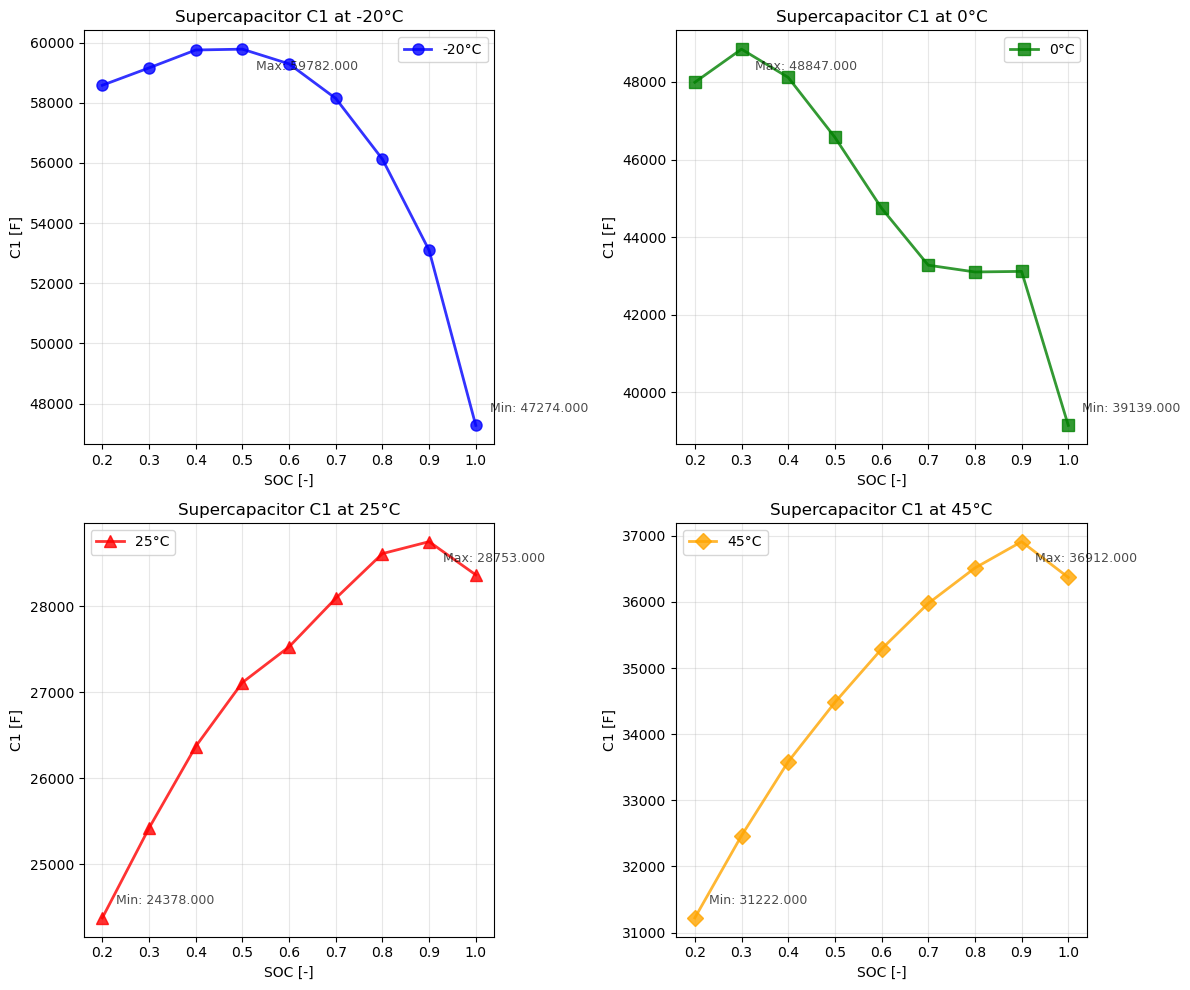

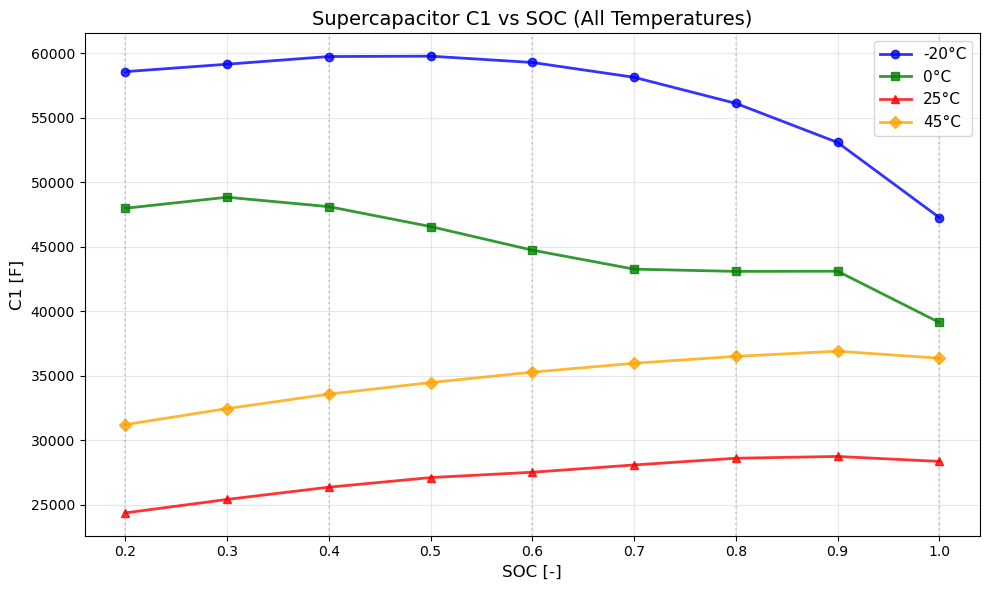

=== Supercapacitor Ïò®ÎèÑÎ≥Ñ C1 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Supercap C1 ÌÜµÍ≥Ñ:
-20¬∞C: ÌèâÍ∑†=56801.111 F, ÏµúÏÜå=47274.000 F, ÏµúÎåÄ=59782.000 F, Î≥ÄÎèôÌè≠=12508.000 F
  0¬∞C: ÌèâÍ∑†=44988.667 F, ÏµúÏÜå=39139.000 F, ÏµúÎåÄ=48847.000 F, Î≥ÄÎèôÌè≠=9708.000 F
 25¬∞C: ÌèâÍ∑†=27182.667 F, ÏµúÏÜå=24378.000 F, ÏµúÎåÄ=28753.000 F, Î≥ÄÎèôÌè≠=4375.000 F
 45¬∞C: ÌèâÍ∑†=34757.333 F, ÏµúÏÜå=31222.000 F, ÏµúÎåÄ=36912.000 F, Î≥ÄÎèôÌè≠=5690.000 F

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
  -20¬∞C: C1 = 58582.000 F (Ïã§Ï†ú SOC: 0.2)
    0¬∞C: C1 = 47992.000 F (Ïã§Ï†ú SOC: 0.2)
   25¬∞C: C1 = 24378.000 F (Ïã§Ï†ú SOC: 0.2)
   45¬∞C: C1 = 31222.000 F (Ïã§Ï†ú SOC: 0.2)

SOC = 0.5:
  -20¬∞C: C1 = 59782.000 F (Ïã§Ï†ú SOC: 0.5)
    0¬∞C: C1 = 46573.000 F (Ïã§Ï†ú SOC: 0.5)
   25¬∞C: C1 = 27115.000 F (Ïã§Ï†ú SOC: 0.5)
   45¬∞C: C1 = 34481.000 F (Ïã§Ï†ú SOC: 0.5)

SOC = 0.8:
  -20¬∞C: C1 = 56125.000 F (Ïã§Ï†ú SOC: 0.8)
    0¬∞C: C1 = 43098.000 F (Ïã§Ï†ú SOC: 0.8)
   25¬∞C: C1 = 28614.000 F 

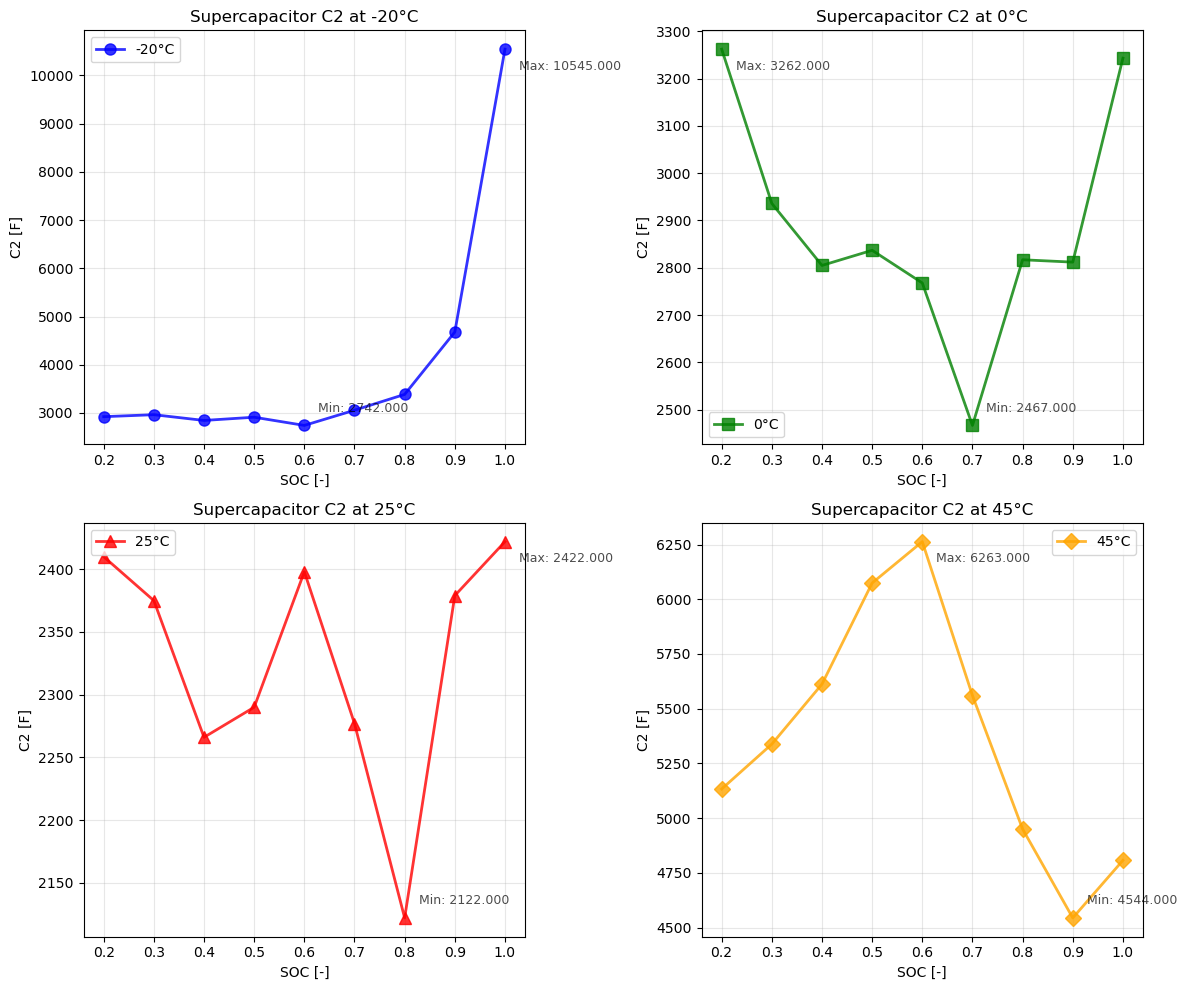

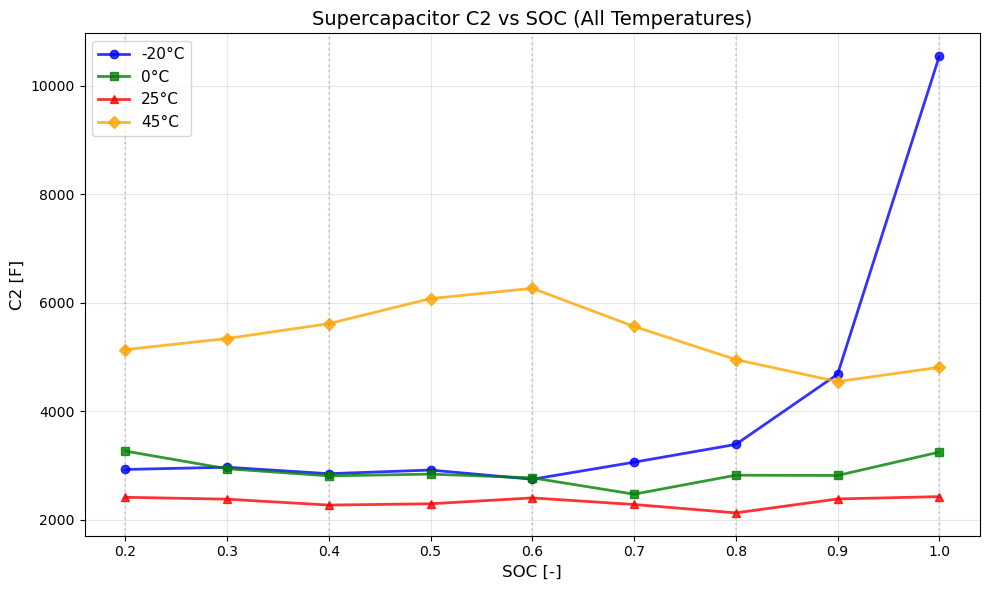

=== Supercapacitor Ïò®ÎèÑÎ≥Ñ C2 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Supercap C2 ÌÜµÍ≥Ñ:
-20¬∞C: ÌèâÍ∑†=4005.778 F, ÏµúÏÜå=2742.000 F, ÏµúÎåÄ=10545.000 F, Î≥ÄÎèôÌè≠=7803.000 F
  0¬∞C: ÌèâÍ∑†=2883.000 F, ÏµúÏÜå=2467.000 F, ÏµúÎåÄ=3262.000 F, Î≥ÄÎèôÌè≠=795.000 F
 25¬∞C: ÌèâÍ∑†=2326.556 F, ÏµúÏÜå=2122.000 F, ÏµúÎåÄ=2422.000 F, Î≥ÄÎèôÌè≠=300.000 F
 45¬∞C: ÌèâÍ∑†=5364.556 F, ÏµúÏÜå=4544.000 F, ÏµúÎåÄ=6263.000 F, Î≥ÄÎèôÌè≠=1719.000 F

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
  -20¬∞C: C2 = 2923.000 F (Ïã§Ï†ú SOC: 0.2)
    0¬∞C: C2 = 3262.000 F (Ïã§Ï†ú SOC: 0.2)
   25¬∞C: C2 = 2410.000 F (Ïã§Ï†ú SOC: 0.2)
   45¬∞C: C2 = 5133.000 F (Ïã§Ï†ú SOC: 0.2)

SOC = 0.5:
  -20¬∞C: C2 = 2912.000 F (Ïã§Ï†ú SOC: 0.5)
    0¬∞C: C2 = 2837.000 F (Ïã§Ï†ú SOC: 0.5)
   25¬∞C: C2 = 2290.000 F (Ïã§Ï†ú SOC: 0.5)
   45¬∞C: C2 = 6074.000 F (Ïã§Ï†ú SOC: 0.5)

SOC = 0.8:
  -20¬∞C: C2 = 3385.000 F (Ïã§Ï†ú SOC: 0.8)
    0¬∞C: C2 = 2817.000 F (Ïã§Ï†ú SOC: 0.8)
   25¬∞C: C2 = 2122.000 F (Ïã§Ï†ú SOC: 0.8)
   45¬∞

In [99]:
results_c1_scap = analyze_R0_temperature_dependency(
    create_R0_temp_dict_from_raw(C1_table_scap_paper, verbose=False)[0], 
    device_type="supercapacitor",   
    parameter_type="C1",
    show_plots=True)
results_c2_scap = analyze_R0_temperature_dependency(
    create_R0_temp_dict_from_raw(C2_table_scap_paper, verbose=False)[0],    
    device_type="supercapacitor",
    parameter_type="C2",
    show_plots=True)    


In [101]:
## Ïª§Ìå®ÏãúÌÑ∞ R1,R2 Îç∞Ïù¥ÌÑ∞ (ÎÖºÎ¨∏Ïóê ÏóÜÏùå, ÏòàÏãúÏö© ÏûÑÏùò Îç∞Ïù¥ÌÑ∞)
R1_table_scap = np.array([
[0, -20, 0, 25, 45],
[0.2, 4.561e-1, 2.804e-1, 2.072, 6.721e-1],
[0.3, 4.159e-1, 1.807e-1, 1.449, 5.016e-1],
[0.4, 3.765e-1, 1.157e-1, 1.057, 4.473e-1],
[0.5, 3.330e-1, 8.059e-2, 7.779e-1, 4.362e-1],
[0.6, 2.840e-1, 6.139e-2, 5.325e-1, 4.329e-1],
[0.7, 2.365e-1, 5.109e-2, 3.194e-1, 4.275e-1],
[0.8, 1.893e-1, 4.719e-2, 1.676e-1, 3.960e-1],
[0.9, 1.355e-1, 4.662e-2, 1.064e-1, 3.407e-1],
[1.0, 8.579e-2, 4.592e-2, 1.070e-1, 2.278e-1]
])

R2_table_scap = np.array([
[0, -20, 0, 25, 45],
[0.2, 1.030e-4, 7.409e-5, 8.607e-5, 7.579e-5],
[0.3, 1.045e-4, 7.980e-5, 8.792e-5, 7.387e-5],
[0.4, 1.117e-4, 8.359e-5, 9.297e-5, 7.161e-5],
[0.5, 1.126e-4, 8.315e-5, 9.310e-5, 6.765e-5],
[0.6, 1.234e-4, 8.460e-5, 9.034e-5, 6.737e-5],
[0.7, 1.153e-4, 9.278e-5, 9.733e-5, 7.741e-5],
[0.8, 1.098e-4, 8.186e-5, 1.091e-4, 8.924e-5],
[0.9, 8.862e-5, 8.137e-5, 1.046e-4, 1.001e-4],
[1.0, 4.859e-5, 7.517e-5, 1.145e-4, 9.724e-5]
])

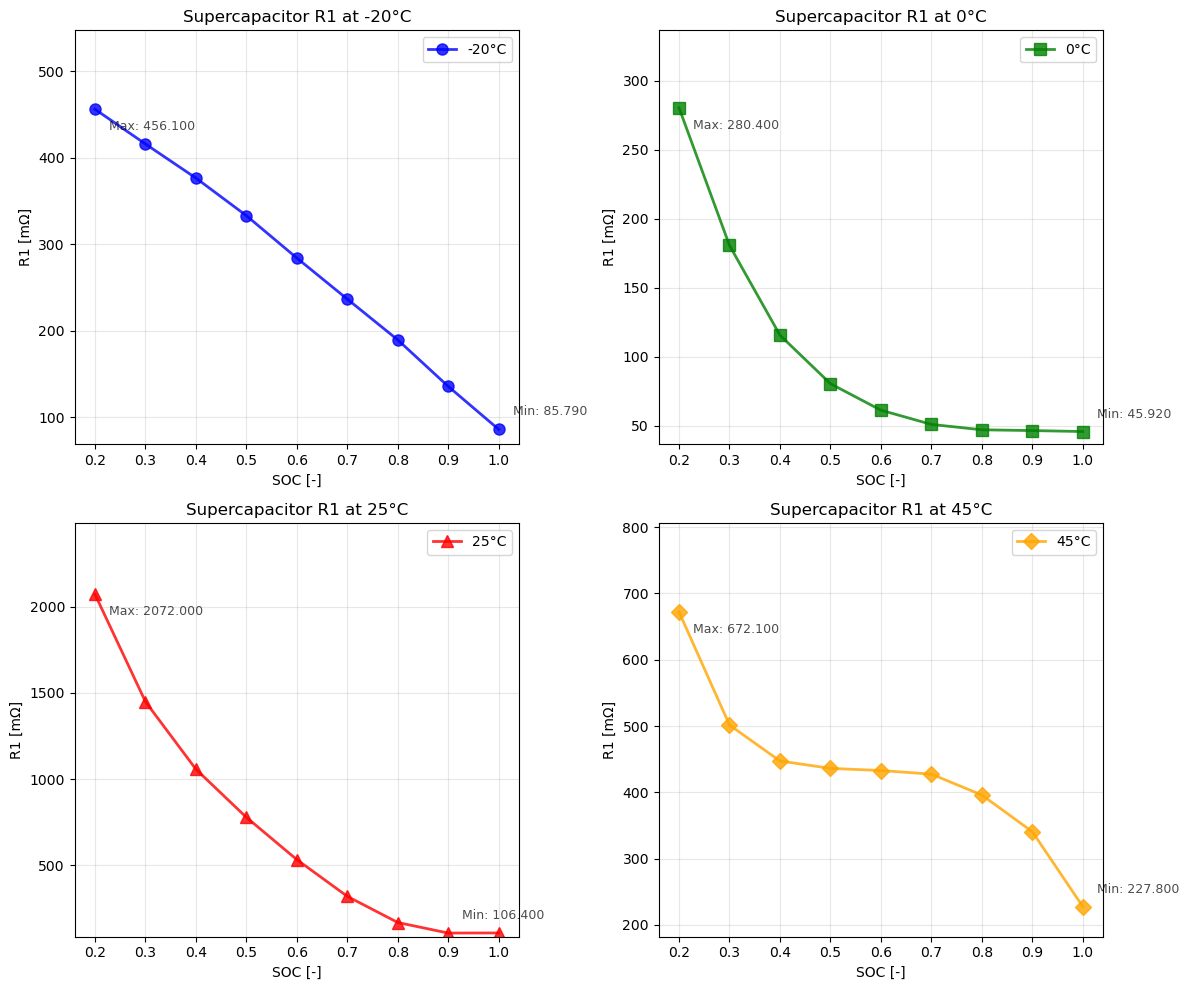

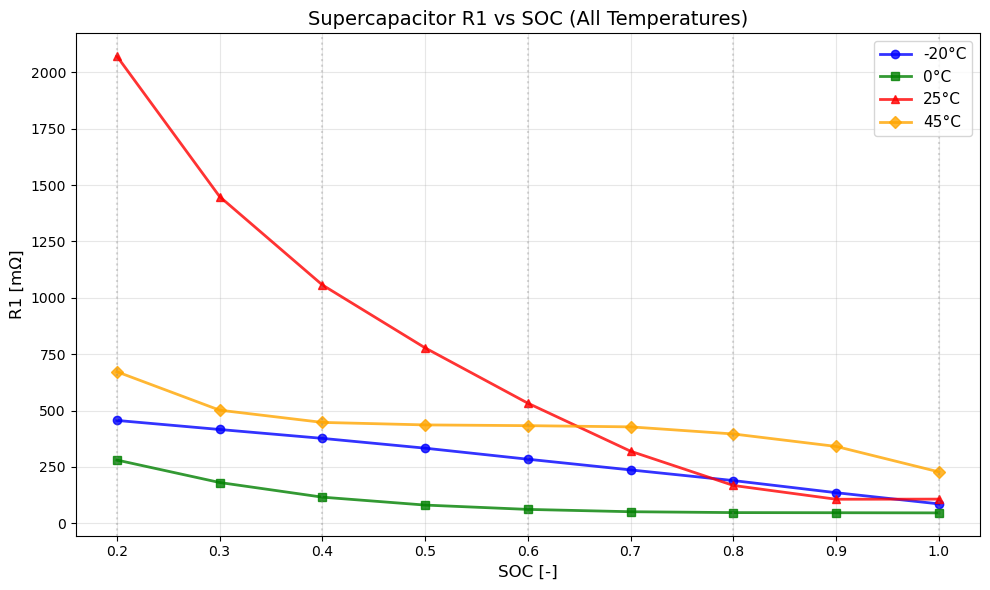

=== Supercapacitor Ïò®ÎèÑÎ≥Ñ R1 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Supercap R1 ÌÜµÍ≥Ñ:
-20¬∞C: ÌèâÍ∑†=279.177 mŒ©, ÏµúÏÜå=85.790 mŒ©, ÏµúÎåÄ=456.100 mŒ©, Î≥ÄÎèôÌè≠=370.310 mŒ©
  0¬∞C: ÌèâÍ∑†=101.067 mŒ©, ÏµúÏÜå=45.920 mŒ©, ÏµúÎåÄ=280.400 mŒ©, Î≥ÄÎèôÌè≠=234.480 mŒ©
 25¬∞C: ÌèâÍ∑†=732.089 mŒ©, ÏµúÏÜå=106.400 mŒ©, ÏµúÎåÄ=2072.000 mŒ©, Î≥ÄÎèôÌè≠=1965.600 mŒ©
 45¬∞C: ÌèâÍ∑†=431.344 mŒ©, ÏµúÏÜå=227.800 mŒ©, ÏµúÎåÄ=672.100 mŒ©, Î≥ÄÎèôÌè≠=444.300 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
  -20¬∞C: R1 = 456.100 mŒ© (Ïã§Ï†ú SOC: 0.2)
    0¬∞C: R1 = 280.400 mŒ© (Ïã§Ï†ú SOC: 0.2)
   25¬∞C: R1 = 2072.000 mŒ© (Ïã§Ï†ú SOC: 0.2)
   45¬∞C: R1 = 672.100 mŒ© (Ïã§Ï†ú SOC: 0.2)

SOC = 0.5:
  -20¬∞C: R1 = 333.000 mŒ© (Ïã§Ï†ú SOC: 0.5)
    0¬∞C: R1 = 80.590 mŒ© (Ïã§Ï†ú SOC: 0.5)
   25¬∞C: R1 = 777.900 mŒ© (Ïã§Ï†ú SOC: 0.5)
   45¬∞C: R1 = 436.200 mŒ© (Ïã§Ï†ú SOC: 0.5)

SOC = 0.8:
  -20¬∞C: R1 = 189.300 mŒ© (Ïã§Ï†ú SOC: 0.8)
    0¬∞C: R1 = 47.190 mŒ© (Ïã§Ï†ú SOC: 0.8)
   25¬∞C: R1 = 167.600 mŒ

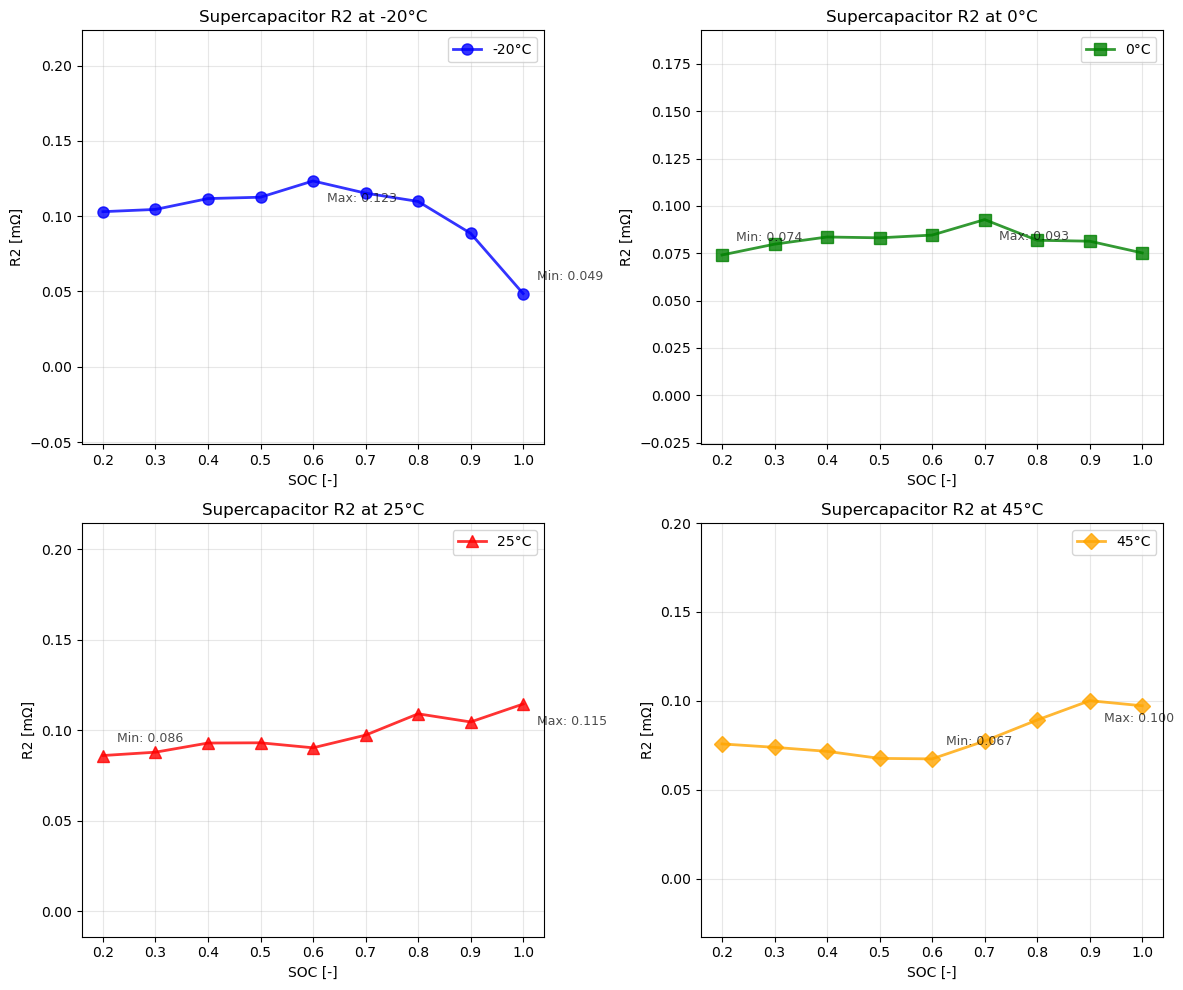

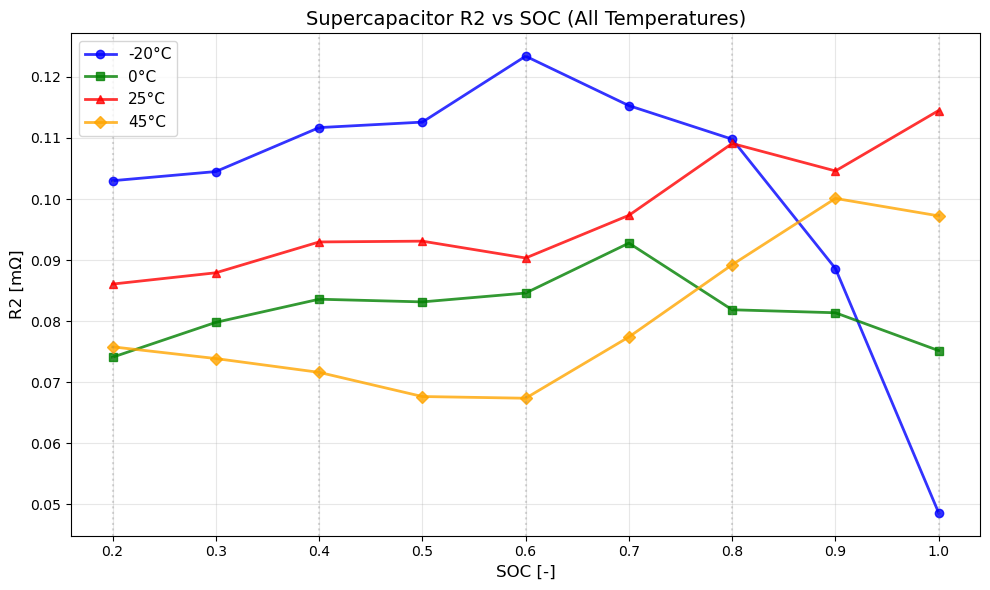

=== Supercapacitor Ïò®ÎèÑÎ≥Ñ R2 ÌäπÏÑ± Î∂ÑÏÑù ===

Í∞Å Ïò®ÎèÑÏóêÏÑúÏùò Supercap R2 ÌÜµÍ≥Ñ:
-20¬∞C: ÌèâÍ∑†=0.102 mŒ©, ÏµúÏÜå=0.049 mŒ©, ÏµúÎåÄ=0.123 mŒ©, Î≥ÄÎèôÌè≠=0.075 mŒ©
  0¬∞C: ÌèâÍ∑†=0.082 mŒ©, ÏµúÏÜå=0.074 mŒ©, ÏµúÎåÄ=0.093 mŒ©, Î≥ÄÎèôÌè≠=0.019 mŒ©
 25¬∞C: ÌèâÍ∑†=0.097 mŒ©, ÏµúÏÜå=0.086 mŒ©, ÏµúÎåÄ=0.115 mŒ©, Î≥ÄÎèôÌè≠=0.028 mŒ©
 45¬∞C: ÌèâÍ∑†=0.080 mŒ©, ÏµúÏÜå=0.067 mŒ©, ÏµúÎåÄ=0.100 mŒ©, Î≥ÄÎèôÌè≠=0.033 mŒ©

ÌäπÏ†ï SOCÏóêÏÑúÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:

SOC = 0.2:
  -20¬∞C: R2 = 0.103 mŒ© (Ïã§Ï†ú SOC: 0.2)
    0¬∞C: R2 = 0.074 mŒ© (Ïã§Ï†ú SOC: 0.2)
   25¬∞C: R2 = 0.086 mŒ© (Ïã§Ï†ú SOC: 0.2)
   45¬∞C: R2 = 0.076 mŒ© (Ïã§Ï†ú SOC: 0.2)

SOC = 0.5:
  -20¬∞C: R2 = 0.113 mŒ© (Ïã§Ï†ú SOC: 0.5)
    0¬∞C: R2 = 0.083 mŒ© (Ïã§Ï†ú SOC: 0.5)
   25¬∞C: R2 = 0.093 mŒ© (Ïã§Ï†ú SOC: 0.5)
   45¬∞C: R2 = 0.068 mŒ© (Ïã§Ï†ú SOC: 0.5)

SOC = 0.8:
  -20¬∞C: R2 = 0.110 mŒ© (Ïã§Ï†ú SOC: 0.8)
    0¬∞C: R2 = 0.082 mŒ© (Ïã§Ï†ú SOC: 0.8)
   25¬∞C: R2 = 0.109 mŒ© (Ïã§Ï†ú SOC: 0.8)
   45¬∞C: R2 = 0.089 mŒ© (Ïã§Ï†ú 

In [102]:
result_R1_scap = analyze_R0_temperature_dependency(
    create_R0_temp_dict_from_raw(R1_table_scap, verbose=False)[0],  
    device_type="supercapacitor",
    parameter_type="R1",
    show_plots=True)
result_R2_scap = analyze_R0_temperature_dependency(
    create_R0_temp_dict_from_raw(R2_table_scap, verbose=False)[0],  
    device_type="supercapacitor",
    parameter_type="R2",
    show_plots=True)
    

## KETI Scap Data

In [ ]:
R0_table_KETI_scap = np.array([

    [0.00, 0.310000],
    [0.05, 0.308750],
    [0.10, 0.307500],
    [0.15, 0.306250],
    [0.20, 0.305000],
    [0.25, 0.303750],
    [0.30, 0.302500],
    [0.35, 0.301250],
    [0.40, 0.300000],
    [0.45, 0.298750],
    [0.50, 0.297500],
    [0.55, 0.296250],
    [0.60, 0.295000],
    [0.65, 0.293750],
    [0.70, 0.292500],
    [0.75, 0.291250],
    [0.80, 0.290000],
    [0.85, 0.288750],
    [0.90, 0.287500],
    [0.95, 0.286250],
    [1.00, 0.285000]
])

In [ ]:
 R1_table_KETI_scap = np.array([
          0.00, 0.002600;
          0.05, 0.002550;
          0.10, 0.002500;
          0.15, 0.002450;
          0.20, 0.002400;
          0.25, 0.002350;
          0.30, 0.002300;
          0.35, 0.002250;
          0.40, 0.002200;
          0.45, 0.002150;
          0.50, 0.002100;
          0.55, 0.002050;
          0.60, 0.002000;
          0.65, 0.001950;
          0.70, 0.001900;
          0.75, 0.001850;
          0.80, 0.001800;
          0.85, 0.001750;
          0.90, 0.001700;
          0.95, 0.001650;
          1.00, 0.001600
        ],

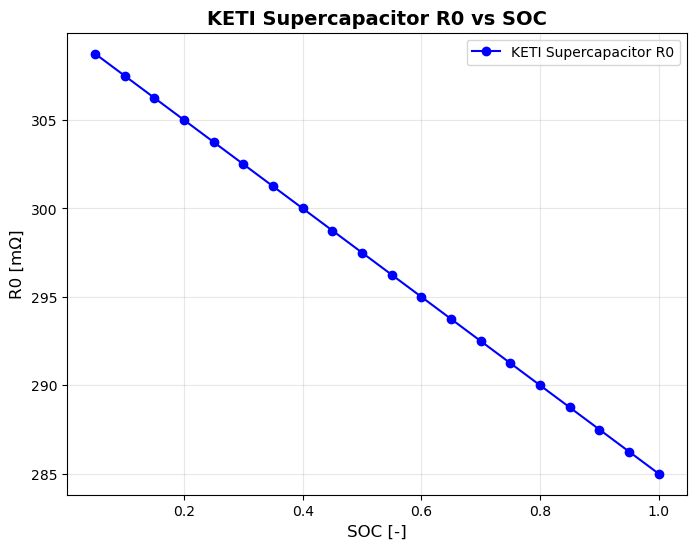

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(R0_table_KETI_scap[:, 0], R0_table_KETI_scap[:, 1]*1000, 
         marker='o', linestyle='-', color='blue', label='KETI Supercapacitor R0')   
plt.xlabel('SOC [-]', fontsize=12)
plt.ylabel('R0 [mŒ©]', fontsize=12)
plt.title('KETI Supercapacitor R0 vs SOC', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)   
plt.legend(fontsize=10)

# Î∞∞ÌÑ∞Î¶¨ ÌååÎùºÎØ∏ÌÑ∞ Î∂ÑÏÑù Ïò®ÎèÑ/SOC


In [85]:
# Î∞∞ÌÑ∞Î¶¨Ïùò Ïò®ÎèÑ-Ï†ÄÌï≠ Í¥ÄÍ≥Ñ Î∂ÑÏÑù: Ïôú Ïò®ÎèÑÍ∞Ä Ïò§Î•ºÏàòÎ°ù Ï†ÄÌï≠Ïù¥ Îñ®Ïñ¥ÏßÄÎäîÍ∞Ä?

print("=" * 80)
print("Î∞∞ÌÑ∞Î¶¨Ïùò Ïò®ÎèÑ-Ï†ÄÌï≠ Í¥ÄÍ≥Ñ: Î¨ºÎ¶¨ÌôîÌïôÏ†Å Î©îÏª§ÎãàÏ¶ò Î∂ÑÏÑù")
print("=" * 80)

# ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïò®ÎèÑ Í≥ÑÏàò ÌôïÏù∏
print("\nüìä ÌòÑÏû¨ KETI Î∞∞ÌÑ∞Î¶¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º:")
print("Ïò®ÎèÑÎ≥Ñ R0 ÌèâÍ∑†Í∞í:")
for temp in sorted(R0_dict_KETI.keys()):
    r0_avg = np.mean(R0_dict_KETI[temp][:, 1] * 1000)
    print(f"  {temp}¬∞C: {r0_avg:.3f} mŒ©")

print("\nÏò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä):")
if 'R0_results' in locals():
    for temp, coeff_data in R0_results['temp_coeffs'].items():
        print(f"  {temp}¬∞C: {coeff_data['coeff_pct_per_c']:.3f} %/¬∞C")

print("\n" + "=" * 60)
print("üî¨ Î¨ºÎ¶¨ÌôîÌïôÏ†Å Î©îÏª§ÎãàÏ¶ò ÏÑ§Î™Ö")
print("=" * 60)

print("""
1. Ïù¥Ïò® Ï†ÑÎèÑÎèÑ (Ionic Conductivity) Ï¶ùÍ∞Ä:
   ‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí Ïù¥Ïò®Ïùò Ïó¥Ï†Å Ïö¥Îèô ÏóêÎÑàÏßÄ Ï¶ùÍ∞Ä
   ‚Ä¢ Li+ Ïù¥Ïò®Ïùò Ïù¥ÎèôÎèÑ(mobility) Ìñ•ÏÉÅ
   ‚Ä¢ Ï†ÑÌï¥Ïßà ÎÇ¥ Ïù¥Ïò® Ï†ÑÎèÑÎèÑ ‚àù exp(-Ea/kT) [ÏïÑÎ†àÎãàÏö∞Ïä§ Î∞©Ï†ïÏãù]
   ‚Ä¢ Í≤∞Í≥º: Ï†ÑÌï¥Ïßà Ï†ÄÌï≠ Í∞êÏÜå

2. Ï†ÑÌï¥Ïßà Ï†êÏÑ±ÎèÑ(Viscosity) Í∞êÏÜå:
   ‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí Ï†ÑÌï¥Ïßà Ï†êÏÑ±ÎèÑ Í∞êÏÜå
   ‚Ä¢ Ïù¥Ïò® Ïù¥Îèô Ï†ÄÌï≠ Í∞êÏÜå
   ‚Ä¢ Œ∑ ‚àù exp(B/T) [Ï†êÏÑ±ÎèÑ-Ïò®ÎèÑ Í¥ÄÍ≥Ñ]
   ‚Ä¢ Í≤∞Í≥º: Ïù¥Ïò® Ï†ÑÎã¨ Ï†ÄÌï≠ Í∞êÏÜå

3. Í≥†Ï≤¥-Ï†ÑÌï¥Ïßà Í≥ÑÎ©¥(SEI) Ï†ÄÌï≠ Î≥ÄÌôî:
   ‚Ä¢ SEI Ï∏µÏùò Ïù¥Ïò® Ï†ÑÎèÑÎèÑ Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
   ‚Ä¢ Í≥ÑÎ©¥ Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùë ÏÜçÎèÑ Ï¶ùÍ∞Ä
   ‚Ä¢ Í≤∞Í≥º: Í≥ÑÎ©¥ Ï†ÄÌï≠ Í∞êÏÜå

4. ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ Í¥ÄÏ†ê:
   ‚Ä¢ Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùë: i‚ÇÄ ‚àù exp(-ŒîG‚Ä°/RT)
   ‚Ä¢ Ïò®ÎèÑ Ï¶ùÍ∞Ä ‚Üí ÌôúÏÑ±Ìôî Ïû•Î≤Ω Í∑πÎ≥µ Ïö©Ïù¥
   ‚Ä¢ Í≤∞Í≥º: Ï†ÑÌïò Ï†ÑÎã¨ Ï†ÄÌï≠ Í∞êÏÜå
""")

print("\n" + "=" * 60)
print("üìà Ïò®ÎèÑ Í≥ÑÏàòÏùò Ïã§Ï†ú ÏùòÎØ∏")
print("=" * 60)

# Ïò®ÎèÑ Í≥ÑÏàò Í≥ÑÏÇ∞ Î∞è ÏÑ§Î™Ö
temp_25 = 25
temp_45 = 45
if temp_25 in R0_dict_KETI and temp_45 in R0_dict_KETI:
    r0_25 = np.mean(R0_dict_KETI[temp_25][:, 1] * 1000)
    r0_45 = np.mean(R0_dict_KETI[temp_45][:, 1] * 1000)
    temp_coeff = (r0_45/r0_25 - 1) / (temp_45 - temp_25) * 100
    
    print(f"""
Ïò®ÎèÑ Í≥ÑÏàò Î∂ÑÏÑù:
‚Ä¢ 25¬∞CÏóêÏÑú R0: {r0_25:.3f} mŒ©
‚Ä¢ 45¬∞CÏóêÏÑú R0: {r0_45:.3f} mŒ©
‚Ä¢ Ïò®ÎèÑ Í≥ÑÏàò: {temp_coeff:.3f} %/¬∞C (ÏùåÏùò Í∞í ‚Üí Ïò®ÎèÑ Ï¶ùÍ∞ÄÏãú Ï†ÄÌï≠ Í∞êÏÜå)

Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏:
‚Ä¢ Ïò®ÎèÑÍ∞Ä 1¬∞C ÏÉÅÏäπÌï† ÎïåÎßàÎã§ Ï†ÄÌï≠Ïù¥ ÏïΩ {abs(temp_coeff):.1f}% Í∞êÏÜå
‚Ä¢ 20¬∞C Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Ï†ÄÌï≠ Î≥ÄÌôî: ÏïΩ {temp_coeff*20:.1f}%
‚Ä¢ Ïù¥Îäî Î¶¨Ìä¨Ïù¥Ïò® Î∞∞ÌÑ∞Î¶¨Ïùò Ï†ÑÌòïÏ†ÅÏù∏ ÌäπÏÑ±
""")

print("\n" + "=" * 60)
print("‚ö° Ïã§Ï†ú ÏùëÏö©ÏóêÏÑúÏùò ÏùòÎØ∏")
print("=" * 60)

print("""
1. Ï†ÄÏò® ÏÑ±Îä•:
   ‚Ä¢ Í≤®Ïö∏Ï≤† Î∞∞ÌÑ∞Î¶¨ ÏÑ±Îä• Ï†ÄÌïòÏùò Ï£ºÏöî ÏõêÏù∏
   ‚Ä¢ ÎÇ¥Î∂Ä Ï†ÄÌï≠ Ï¶ùÍ∞Ä ‚Üí Ï†ÑÏïï Í∞ïÌïò ‚Üí Ïö©Îüâ Í∞êÏÜå
   ‚Ä¢ ÌûàÌÑ∞ ÏãúÏä§ÌÖúÏùò ÌïÑÏöîÏÑ±

2. Í≥†Ïò® ÏÑ±Îä•:
   ‚Ä¢ Ï†ÄÌï≠ Í∞êÏÜåÎ°ú Ï†ÑÎ†• ÏÑ±Îä• Ìñ•ÏÉÅ
   ‚Ä¢ ÌïòÏßÄÎßå Î∂ÄÎ∞òÏùë Ï¶ùÍ∞Ä, ÏàòÎ™Ö Í∞êÏÜå ÏúÑÌóò
   ‚Ä¢ Ïó¥ Í¥ÄÎ¶¨ ÏãúÏä§ÌÖúÏùò Ï§ëÏöîÏÑ±

3. Ïó¥ Í¥ÄÎ¶¨ ÏÑ§Í≥Ñ:
   ‚Ä¢ ÏµúÏ†Å ÎèôÏûë Ïò®ÎèÑ Î≤îÏúÑ Ïú†ÏßÄ ÌïÑÏöî
   ‚Ä¢ Î∞∞ÌÑ∞Î¶¨ Ìå© ÎÉâÍ∞Å/Í∞ÄÏó¥ ÏãúÏä§ÌÖú ÏÑ§Í≥Ñ
   ‚Ä¢ ÏÑ±Îä•Í≥º ÏàòÎ™ÖÏùò Í∑†ÌòïÏ†ê Ï∞æÍ∏∞
""")

print("\n" + "=" * 60)
print("üîÑ Îã§Î•∏ ÌååÎùºÎØ∏ÌÑ∞Îì§Í≥ºÏùò ÎπÑÍµê")
print("=" * 60)

# R1, R2 Ïò®ÎèÑ Í≥ÑÏàòÏôÄ ÎπÑÍµê
if 'R1_results' in locals() and 'R2_results' in locals():
    print("Ïò®ÎèÑ Í≥ÑÏàò ÎπÑÍµê:")
    print(f"R0: {R0_results['temp_coeffs'][45]['coeff_pct_per_c']:.3f} %/¬∞C")
    print(f"R1: {R1_results['temp_coeffs'][45]['coeff_pct_per_c']:.3f} %/¬∞C") 
    print(f"R2: {R2_results['temp_coeffs'][45]['coeff_pct_per_c']:.3f} %/¬∞C")
    
    print("""
Ìï¥ÏÑù:
‚Ä¢ R0 (Ïò§ÎØπ Ï†ÄÌï≠): Ï£ºÎ°ú Ïù¥Ïò® Ï†ÑÎèÑÎèÑÏóê ÏùòÏ°¥
‚Ä¢ R1, R2 (Î∂ÑÍ∑π Ï†ÄÌï≠): Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùë ÏÜçÎèÑÏóê Îçî ÎØºÍ∞ê
‚Ä¢ Î™®Îì† Ï†ÄÌï≠ ÏÑ±Î∂ÑÏù¥ Ïò®ÎèÑ Ï¶ùÍ∞ÄÏôÄ Ìï®Íªò Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•
""")

print("\n" + "=" * 60)
print("üìö Ï∞∏Í≥†: ÏïÑÎ†àÎãàÏö∞Ïä§ Í¥ÄÍ≥ÑÏãù")
print("=" * 60)

print("""
Ïù¥Ïò® Ï†ÑÎèÑÎèÑÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:
œÉ(T) = œÉ‚ÇÄ √ó exp(-Ea/kT)

Ïó¨Í∏∞ÏÑú:
‚Ä¢ œÉ(T): Ïò®ÎèÑ TÏóêÏÑúÏùò Ïù¥Ïò® Ï†ÑÎèÑÎèÑ
‚Ä¢ œÉ‚ÇÄ: ÎπàÎèÑ Ïù∏Ïûê
‚Ä¢ Ea: ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ (Î≥¥ÌÜµ 0.3-0.8 eV)
‚Ä¢ k: Î≥ºÏ∏†Îßå ÏÉÅÏàò
‚Ä¢ T: Ï†àÎåÄÏò®ÎèÑ

Ï†ÄÌï≠ÏùÄ Ï†ÑÎèÑÎèÑÏùò Ïó≠ÏàòÏù¥ÎØÄÎ°ú:
R(T) ‚àù 1/œÉ(T) ‚àù exp(Ea/kT)

Îî∞ÎùºÏÑú Ïò®ÎèÑÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ÄÌï≠ÏùÄ ÏßÄÏàòÏ†ÅÏúºÎ°ú Í∞êÏÜåÌï©ÎãàÎã§.
""")

print("=" * 80)

Î∞∞ÌÑ∞Î¶¨Ïùò Ïò®ÎèÑ-Ï†ÄÌï≠ Í¥ÄÍ≥Ñ: Î¨ºÎ¶¨ÌôîÌïôÏ†Å Î©îÏª§ÎãàÏ¶ò Î∂ÑÏÑù

üìä ÌòÑÏû¨ KETI Î∞∞ÌÑ∞Î¶¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º:
Ïò®ÎèÑÎ≥Ñ R0 ÌèâÍ∑†Í∞í:
  25¬∞C: 1.657 mŒ©
  35¬∞C: 1.468 mŒ©
  45¬∞C: 1.391 mŒ©

Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä):
  35¬∞C: -1.133 %/¬∞C
  45¬∞C: -0.799 %/¬∞C

üî¨ Î¨ºÎ¶¨ÌôîÌïôÏ†Å Î©îÏª§ÎãàÏ¶ò ÏÑ§Î™Ö

1. Ïù¥Ïò® Ï†ÑÎèÑÎèÑ (Ionic Conductivity) Ï¶ùÍ∞Ä:
   ‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí Ïù¥Ïò®Ïùò Ïó¥Ï†Å Ïö¥Îèô ÏóêÎÑàÏßÄ Ï¶ùÍ∞Ä
   ‚Ä¢ Li+ Ïù¥Ïò®Ïùò Ïù¥ÎèôÎèÑ(mobility) Ìñ•ÏÉÅ
   ‚Ä¢ Ï†ÑÌï¥Ïßà ÎÇ¥ Ïù¥Ïò® Ï†ÑÎèÑÎèÑ ‚àù exp(-Ea/kT) [ÏïÑÎ†àÎãàÏö∞Ïä§ Î∞©Ï†ïÏãù]
   ‚Ä¢ Í≤∞Í≥º: Ï†ÑÌï¥Ïßà Ï†ÄÌï≠ Í∞êÏÜå

2. Ï†ÑÌï¥Ïßà Ï†êÏÑ±ÎèÑ(Viscosity) Í∞êÏÜå:
   ‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí Ï†ÑÌï¥Ïßà Ï†êÏÑ±ÎèÑ Í∞êÏÜå
   ‚Ä¢ Ïù¥Ïò® Ïù¥Îèô Ï†ÄÌï≠ Í∞êÏÜå
   ‚Ä¢ Œ∑ ‚àù exp(B/T) [Ï†êÏÑ±ÎèÑ-Ïò®ÎèÑ Í¥ÄÍ≥Ñ]
   ‚Ä¢ Í≤∞Í≥º: Ïù¥Ïò® Ï†ÑÎã¨ Ï†ÄÌï≠ Í∞êÏÜå

3. Í≥†Ï≤¥-Ï†ÑÌï¥Ïßà Í≥ÑÎ©¥(SEI) Ï†ÄÌï≠ Î≥ÄÌôî:
   ‚Ä¢ SEI Ï∏µÏùò Ïù¥Ïò® Ï†ÑÎèÑÎèÑ Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
   ‚Ä¢ Í≥ÑÎ©¥ Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùë ÏÜçÎèÑ Ï¶ùÍ∞Ä
   ‚Ä¢ Í≤∞Í≥º: Í≥ÑÎ©¥ 

C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1085887059.py:108: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1085887059.py:108: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1085887059.py:108: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1085887059.py:108: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1085887059.py:108: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1085887059.py:108: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HAN

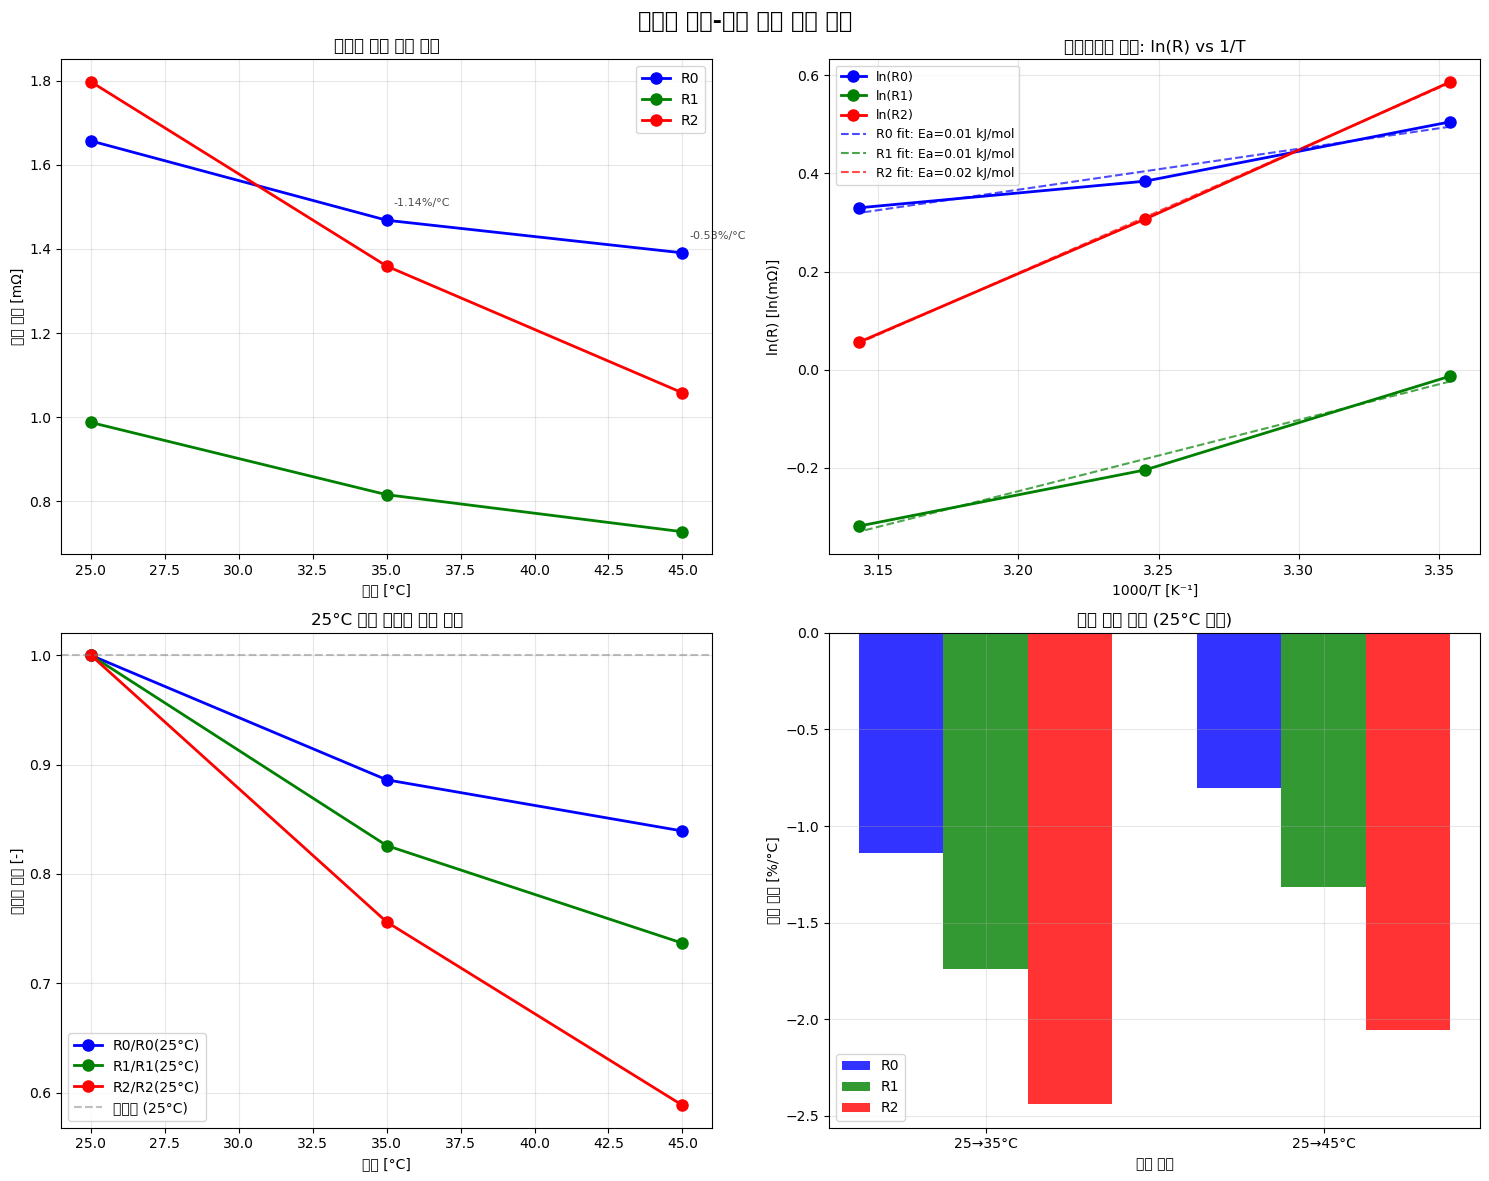


üî¨ ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ Î∂ÑÏÑù Í≤∞Í≥º
R0 ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ: 0.01 kJ/mol (0.072 eV)
R1 ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ: 0.01 kJ/mol (0.125 eV)
R2 ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ: 0.02 kJ/mol (0.217 eV)

Ï∞∏Í≥†Í∞í:
‚Ä¢ Î¶¨Ìä¨Ïù¥Ïò® Î∞∞ÌÑ∞Î¶¨ Ï†ÑÌï¥Ïßà Ïù¥Ïò® Ï†ÑÎèÑÎèÑ: 0.3-0.8 eV
‚Ä¢ SEI Ï∏µ Ïù¥Ïò® Ï†ÑÎèÑÎèÑ: 0.5-1.0 eV
‚Ä¢ Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùë: 0.4-0.9 eV


In [86]:
# Ïò®ÎèÑ-Ï†ÄÌï≠ Í¥ÄÍ≥ÑÏùò ÏãúÍ∞ÅÏ†Å Î∂ÑÏÑù
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Î∞∞ÌÑ∞Î¶¨ Ïò®ÎèÑ-Ï†ÄÌï≠ Í¥ÄÍ≥Ñ Ï¢ÖÌï© Î∂ÑÏÑù', fontsize=16, fontweight='bold')

# 1. Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑† Ï†ÄÌï≠ Î≥ÄÌôî (R0, R1, R2)
ax1.set_title('Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑† Ï†ÄÌï≠ Î≥ÄÌôî')
temps = sorted(R0_dict_KETI.keys())
r0_avgs = [np.mean(R0_dict_KETI[t][:, 1] * 1000) for t in temps]
r1_avgs = [np.mean(R1_dict_Bat[t][:, 1] * 1000) for t in temps]
r2_avgs = [np.mean(R2_dict_Bat[t][:, 1] * 1000) for t in temps]

ax1.plot(temps, r0_avgs, 'bo-', linewidth=2, markersize=8, label='R0')
ax1.plot(temps, r1_avgs, 'go-', linewidth=2, markersize=8, label='R1')
ax1.plot(temps, r2_avgs, 'ro-', linewidth=2, markersize=8, label='R2')
ax1.set_xlabel('Ïò®ÎèÑ [¬∞C]')
ax1.set_ylabel('ÌèâÍ∑† Ï†ÄÌï≠ [mŒ©]')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Ïò®ÎèÑ Í≥ÑÏàò ÌëúÏãú
for i, temp in enumerate(temps[1:], 1):
    if i < len(temps):
        temp_prev = temps[i-1]
        r0_coeff = (r0_avgs[i]/r0_avgs[i-1] - 1) / (temp - temp_prev) * 100
        ax1.annotate(f'{r0_coeff:.2f}%/¬∞C', 
                    xy=(temp, r0_avgs[i]), 
                    xytext=(5, 10), textcoords='offset points',
                    fontsize=8, alpha=0.7)

# 2. ÏïÑÎ†àÎãàÏö∞Ïä§ ÌîåÎ°Ø (ln(R) vs 1/T)
ax2.set_title('ÏïÑÎ†àÎãàÏö∞Ïä§ ÌîåÎ°Ø: ln(R) vs 1/T')
T_kelvin = np.array(temps) + 273.15
inv_T = 1000 / T_kelvin  # 1000/T for better scale

ax2.plot(inv_T, np.log(r0_avgs), 'bo-', linewidth=2, markersize=8, label='ln(R0)')
ax2.plot(inv_T, np.log(r1_avgs), 'go-', linewidth=2, markersize=8, label='ln(R1)')
ax2.plot(inv_T, np.log(r2_avgs), 'ro-', linewidth=2, markersize=8, label='ln(R2)')

# ÏÑ†Ìòï ÌîºÌåÖ
z0 = np.polyfit(inv_T, np.log(r0_avgs), 1)
z1 = np.polyfit(inv_T, np.log(r1_avgs), 1)
z2 = np.polyfit(inv_T, np.log(r2_avgs), 1)

ax2.plot(inv_T, np.polyval(z0, inv_T), 'b--', alpha=0.7, 
         label=f'R0 fit: Ea={z0[0]*8.314/1000:.2f} kJ/mol')
ax2.plot(inv_T, np.polyval(z1, inv_T), 'g--', alpha=0.7,
         label=f'R1 fit: Ea={z1[0]*8.314/1000:.2f} kJ/mol')
ax2.plot(inv_T, np.polyval(z2, inv_T), 'r--', alpha=0.7,
         label=f'R2 fit: Ea={z2[0]*8.314/1000:.2f} kJ/mol')

ax2.set_xlabel('1000/T [K‚Åª¬π]')
ax2.set_ylabel('ln(R) [ln(mŒ©)]')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. ÏÉÅÎåÄÏ†Å Ï†ÄÌï≠ Î≥ÄÌôî (25¬∞C Í∏∞Ï§Ä Ï†ïÍ∑úÌôî)
ax3.set_title('25¬∞C Í∏∞Ï§Ä ÏÉÅÎåÄÏ†Å Ï†ÄÌï≠ Î≥ÄÌôî')
r0_norm = np.array(r0_avgs) / r0_avgs[0]  # 25¬∞C Í∏∞Ï§Ä
r1_norm = np.array(r1_avgs) / r1_avgs[0]
r2_norm = np.array(r2_avgs) / r2_avgs[0]

ax3.plot(temps, r0_norm, 'bo-', linewidth=2, markersize=8, label='R0/R0(25¬∞C)')
ax3.plot(temps, r1_norm, 'go-', linewidth=2, markersize=8, label='R1/R1(25¬∞C)')
ax3.plot(temps, r2_norm, 'ro-', linewidth=2, markersize=8, label='R2/R2(25¬∞C)')
ax3.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Í∏∞Ï§ÄÏÑ† (25¬∞C)')
ax3.set_xlabel('Ïò®ÎèÑ [¬∞C]')
ax3.set_ylabel('ÏÉÅÎåÄÏ†Å Ï†ÄÌï≠ [-]')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Ïò®ÎèÑ Í≥ÑÏàò ÎπÑÍµê
ax4.set_title('Ïò®ÎèÑ Í≥ÑÏàò ÎπÑÍµê (25¬∞C Í∏∞Ï§Ä)')
if len(temps) >= 2:
    temp_coeffs_r0 = []
    temp_coeffs_r1 = []
    temp_coeffs_r2 = []
    temp_ranges = []
    
    for i in range(1, len(temps)):
        dt = temps[i] - temps[0]  # 25¬∞C Í∏∞Ï§Ä
        coeff_r0 = (r0_avgs[i]/r0_avgs[0] - 1) / dt * 100
        coeff_r1 = (r1_avgs[i]/r1_avgs[0] - 1) / dt * 100
        coeff_r2 = (r2_avgs[i]/r2_avgs[0] - 1) / dt * 100
        
        temp_coeffs_r0.append(coeff_r0)
        temp_coeffs_r1.append(coeff_r1)
        temp_coeffs_r2.append(coeff_r2)
        temp_ranges.append(f'25‚Üí{temps[i]}¬∞C')
    
    x_pos = np.arange(len(temp_ranges))
    width = 0.25
    
    ax4.bar(x_pos - width, temp_coeffs_r0, width, label='R0', alpha=0.8, color='blue')
    ax4.bar(x_pos, temp_coeffs_r1, width, label='R1', alpha=0.8, color='green')
    ax4.bar(x_pos + width, temp_coeffs_r2, width, label='R2', alpha=0.8, color='red')
    
    ax4.set_xlabel('Ïò®ÎèÑ Î≤îÏúÑ')
    ax4.set_ylabel('Ïò®ÎèÑ Í≥ÑÏàò [%/¬∞C]')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(temp_ranges)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ Í≥ÑÏÇ∞ Í≤∞Í≥º Ï∂úÎ†•
print("\n" + "=" * 50)
print("üî¨ ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ Î∂ÑÏÑù Í≤∞Í≥º")
print("=" * 50)
print(f"R0 ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ: {z0[0]*8.314/1000:.2f} kJ/mol ({z0[0]*8.314*1000/96485:.3f} eV)")
print(f"R1 ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ: {z1[0]*8.314/1000:.2f} kJ/mol ({z1[0]*8.314*1000/96485:.3f} eV)")
print(f"R2 ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ: {z2[0]*8.314/1000:.2f} kJ/mol ({z2[0]*8.314*1000/96485:.3f} eV)")

print(f"\nÏ∞∏Í≥†Í∞í:")
print(f"‚Ä¢ Î¶¨Ìä¨Ïù¥Ïò® Î∞∞ÌÑ∞Î¶¨ Ï†ÑÌï¥Ïßà Ïù¥Ïò® Ï†ÑÎèÑÎèÑ: 0.3-0.8 eV")
print(f"‚Ä¢ SEI Ï∏µ Ïù¥Ïò® Ï†ÑÎèÑÎèÑ: 0.5-1.0 eV")
print(f"‚Ä¢ Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùë: 0.4-0.9 eV")

In [97]:
# C1, C2 Ï∫êÌå®ÏãúÌÑ¥Ïä§ ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌïú Ï¢ÖÌï© Î∂ÑÏÑù

print("=" * 80)
print("Î∞∞ÌÑ∞Î¶¨ C1, C2 Ï∫êÌå®ÏãúÌÑ¥Ïä§ ÌååÎùºÎØ∏ÌÑ∞: Î¨ºÎ¶¨ÌôîÌïôÏ†Å ÏùòÎØ∏ÏôÄ Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±")
print("=" * 80)

# ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú C1, C2 Î∂ÑÏÑù Í≤∞Í≥º ÌôïÏù∏
print("\nüìä ÌòÑÏû¨ KETI Î∞∞ÌÑ∞Î¶¨ C1, C2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º:")

print("\nÏò®ÎèÑÎ≥Ñ C1 ÌèâÍ∑†Í∞í:")
for temp in sorted(c1_dict_Bat.keys()):
    c1_avg = np.mean(c1_dict_Bat[temp][:, 1])
    print(f"  {temp}¬∞C: {c1_avg:.0f} F")

print("\nÏò®ÎèÑÎ≥Ñ C2 ÌèâÍ∑†Í∞í:")
for temp in sorted(c2_dict_Bat.keys()):
    c2_avg = np.mean(c2_dict_Bat[temp][:, 1])
    print(f"  {temp}¬∞C: {c2_avg:.0f} F")

print("\nC1 Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä):")
if 'results_C1_bat' in locals():
    for temp, coeff_data in results_C1_bat['temp_coeffs'].items():
        print(f"  {temp}¬∞C: {coeff_data['coeff_pct_per_c']:.3f} %/¬∞C")

print("\nC2 Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä):")
if 'results_C2_bat' in locals():
    for temp, coeff_data in results_C2_bat['temp_coeffs'].items():
        print(f"  {temp}¬∞C: {coeff_data['coeff_pct_per_c']:.3f} %/¬∞C")

print("\n" + "=" * 70)
print("üî¨ C1, C2 Ï∫êÌå®ÏãúÌÑ¥Ïä§Ïùò Î¨ºÎ¶¨ÌôîÌïôÏ†Å ÏùòÎØ∏")
print("=" * 70)

print("""
üîã Îì±Í∞ÄÌöåÎ°ú Î™®Îç∏ÏóêÏÑú C1, C2Ïùò Ïó≠Ìï†:

Î∞∞ÌÑ∞Î¶¨ Îì±Í∞ÄÌöåÎ°ú (2-RC Î™®Îç∏):
    R0 ‚îÄ‚îÄ R1‚îÄ‚îÄC1 ‚îÄ‚îÄ R2‚îÄ‚îÄC2
          ‚îÇ        ‚îÇ
          ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ Î≥ëÎ†¨ Ïó∞Í≤∞

‚Ä¢ R0: Ïò§ÎØπ Ï†ÄÌï≠ (Ï¶âÏãú ÏùëÎãµ)
‚Ä¢ R1-C1: Îπ†Î•∏ Î∂ÑÍ∑π Í≥ºÏ†ï (Ï¥à~Î∂Ñ Îã®ÏúÑ)
‚Ä¢ R2-C2: ÎäêÎ¶∞ Î∂ÑÍ∑π Í≥ºÏ†ï (Î∂Ñ~ÏãúÍ∞Ñ Îã®ÏúÑ)

üß™ Î¨ºÎ¶¨ÌôîÌïôÏ†Å ÏùòÎØ∏:

1. C1 (Fast Capacitance):
   ‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïôÏ†Å Ïù¥Ï§ëÏ∏µ Ï∫êÌå®ÏãúÌÑ¥Ïä§
   ‚Ä¢ Ï†ÑÍ∑π/Ï†ÑÌï¥Ïßà Í≥ÑÎ©¥ÏóêÏÑúÏùò Ï†ÑÌïò Ï∂ïÏ†Å
   ‚Ä¢ Îπ†Î•∏ Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùëÍ≥º Ïó∞Í¥Ä
   ‚Ä¢ ÏãúÏÉÅÏàò: œÑ1 = R1 √ó C1 (Ïàò Ï¥à~ÏàòÏã≠ Ï¥à)

2. C2 (Slow Capacitance):
   ‚Ä¢ ÌôïÏÇ∞ Í≥ºÏ†ïÍ≥º Ïó∞Í¥ÄÎêú ÏùòÏÇ¨ Ï∫êÌå®ÏãúÌÑ¥Ïä§
   ‚Ä¢ Í≥†Ï≤¥ÏÉÅ ÎÇ¥ Î¶¨Ìä¨ Ïù¥Ïò® ÎÜçÎèÑ Íµ¨Î∞∞
   ‚Ä¢ ÎäêÎ¶∞ ÌôïÏÇ∞ Í≥ºÏ†ï ÌëúÌòÑ
   ‚Ä¢ ÏãúÏÉÅÏàò: œÑ2 = R2 √ó C2 (Ïàò Î∂Ñ~Ïàò ÏãúÍ∞Ñ)
""")

print("\n" + "=" * 70)
print("üìà Ïò®ÎèÑÍ∞Ä Ï∫êÌå®ÏãúÌÑ¥Ïä§Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•")
print("=" * 70)

# C1, C2 Ïò®ÎèÑ Í≥ÑÏàò ÎπÑÍµê
if 'results_C1_bat' in locals() and 'results_C2_bat' in locals():
    print("\nÏò®ÎèÑ Ìö®Í≥º ÎπÑÍµê:")
    
    # 25¬∞CÏôÄ 45¬∞C Í∞í ÎπÑÍµê
    temp_25 = 25
    temp_45 = 45
    
    if temp_25 in c1_dict_Bat and temp_45 in c1_dict_Bat:
        c1_25 = np.mean(c1_dict_Bat[temp_25][:, 1])
        c1_45 = np.mean(c1_dict_Bat[temp_45][:, 1])
        c1_change = (c1_45/c1_25 - 1) * 100
        
        c2_25 = np.mean(c2_dict_Bat[temp_25][:, 1])
        c2_45 = np.mean(c2_dict_Bat[temp_45][:, 1])
        c2_change = (c2_45/c2_25 - 1) * 100
        
        print(f"""
C1 Î≥ÄÌôî (25¬∞C ‚Üí 45¬∞C):
‚Ä¢ 25¬∞C: {c1_25:.0f} F
‚Ä¢ 45¬∞C: {c1_45:.0f} F
‚Ä¢ Î≥ÄÌôîÏú®: {c1_change:.1f}% (Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Ï¶ùÍ∞Ä)

C2 Î≥ÄÌôî (25¬∞C ‚Üí 45¬∞C):
‚Ä¢ 25¬∞C: {c2_25:.0f} F
‚Ä¢ 45¬∞C: {c2_45:.0f} F
‚Ä¢ Î≥ÄÌôîÏú®: {c2_change:.1f}% (Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Ï¶ùÍ∞Ä)

Ìï¥ÏÑù:
‚Ä¢ Îëê Ï∫êÌå®ÏãúÌÑ¥Ïä§ Î™®Îëê Ïò®ÎèÑ ÏÉÅÏäπÍ≥º Ìï®Íªò Ï¶ùÍ∞Ä
‚Ä¢ C2Í∞Ä C1Î≥¥Îã§ Ïò®ÎèÑÏóê Îçî ÎØºÍ∞ê (ÌôïÏÇ∞ Í≥ºÏ†ïÏùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±)
‚Ä¢ Ï†ÄÌï≠Í≥º Î∞òÎåÄ Í≤ΩÌñ• (Ï†ÄÌï≠‚Üì, Ï∫êÌå®ÏãúÌÑ¥Ïä§‚Üë)
""")

print("\n" + "=" * 70)
print("‚öóÔ∏è Î¨ºÎ¶¨ÌôîÌïôÏ†Å Î©îÏª§ÎãàÏ¶ò")
print("=" * 70)

print("""
1. Ïù¥Ï§ëÏ∏µ Ï∫êÌå®ÏãúÌÑ¥Ïä§ (C1) Ï¶ùÍ∞Ä:
   ‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí Ïù¥Ïò® Ïù¥ÎèôÎèÑ Ï¶ùÍ∞Ä
   ‚Ä¢ Ï†ÑÍ∑π ÌëúÎ©¥ ÌôúÏÑ± ÏÇ¨Ïù¥Ìä∏ Ï¶ùÍ∞Ä
   ‚Ä¢ Ï†ÑÌï¥Ïßà Ïú†Ï†ÑÏÉÅÏàò Î≥ÄÌôî
   ‚Ä¢ Cdl = Œµ √ó Œµ0 √ó A / d (Ïò®ÎèÑÏóê Îî∞Î•∏ Œµ, A Ï¶ùÍ∞Ä)

2. ÌôïÏÇ∞ Ï∫êÌå®ÏãúÌÑ¥Ïä§ (C2) Ï¶ùÍ∞Ä:
   ‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí ÌôïÏÇ∞ Í≥ÑÏàò Ï¶ùÍ∞Ä: D ‚àù exp(-Ed/RT)
   ‚Ä¢ ÌôïÏÇ∞ ÍπäÏù¥ Ï¶ùÍ∞Ä: Œ¥ = ‚àö(D√ót)
   ‚Ä¢ Îçî ÎßéÏùÄ ÌôúÎ¨ºÏßà Ï∞∏Ïó¨ ‚Üí Ïú†Ìö® Ï∫êÌå®ÏãúÌÑ¥Ïä§ Ï¶ùÍ∞Ä
   ‚Ä¢ Warburg ÏûÑÌîºÎçòÏä§ÏôÄ Ïó∞Í¥Ä

3. Ïò®ÎèÑ ÏùòÏ°¥ÏÑ± Í¥ÄÍ≥Ñ:
   ‚Ä¢ C1 ‚àù T^Œ± (Œ± ‚âà 0.5~1.0)
   ‚Ä¢ C2 ‚àù exp(Ed/RT) (ÌôïÏÇ∞ ÌôúÏÑ±Ìôî ÏóêÎÑàÏßÄ ÏùòÏ°¥)
   ‚Ä¢ C2 > C1 ÏùºÎ∞òÏ†Å (ÌôïÏÇ∞ Í≥ºÏ†ïÏù¥ Îçî ÌÅ∞ Ï∫êÌå®ÏãúÌÑ¥Ïä§ Í∏∞Ïó¨)
""")

print("\n" + "=" * 70)
print("üîÑ ÏãúÏÉÅÏàò(Time Constant) Î∂ÑÏÑù")
print("=" * 70)

# ÏãúÏÉÅÏàò Í≥ÑÏÇ∞
tau1_values = []
tau2_values = []
temps_for_tau = []

for temp in sorted(c1_dict_Bat.keys()):
    if temp in R1_dict_Bat and temp in R2_dict_Bat:
        # ÌèâÍ∑†Í∞íÏúºÎ°ú ÏãúÏÉÅÏàò Í≥ÑÏÇ∞
        r1_avg = np.mean(R1_dict_Bat[temp][:, 1])  # Œ©
        c1_avg = np.mean(c1_dict_Bat[temp][:, 1])  # F
        r2_avg = np.mean(R2_dict_Bat[temp][:, 1])  # Œ©
        c2_avg = np.mean(c2_dict_Bat[temp][:, 1])  # F
        
        tau1 = r1_avg * c1_avg  # Ï¥à
        tau2 = r2_avg * c2_avg  # Ï¥à
        
        tau1_values.append(tau1)
        tau2_values.append(tau2)
        temps_for_tau.append(temp)
        
        print(f"{temp}¬∞C:")
        print(f"  œÑ1 = R1√óC1 = {r1_avg*1000:.2f}mŒ© √ó {c1_avg:.0f}F = {tau1:.2f}Ï¥à")
        print(f"  œÑ2 = R2√óC2 = {r2_avg*1000:.2f}mŒ© √ó {c2_avg:.0f}F = {tau2:.2f}Ï¥à")
        print(f"  œÑ2/œÑ1 ÎπÑÏú®: {tau2/tau1:.1f}")

print(f"""
ÏãúÏÉÅÏàòÏùò Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏:
‚Ä¢ œÑ1: Îπ†Î•∏ Î∂ÑÍ∑π Í≥ºÏ†ï (Ï†ÑÌïò Ï†ÑÎã¨ Î∞òÏùë)
‚Ä¢ œÑ2: ÎäêÎ¶∞ Î∂ÑÍ∑π Í≥ºÏ†ï (ÌôïÏÇ∞ Í≥ºÏ†ï)
‚Ä¢ œÑ2 >> œÑ1: Îã§Ï§ë ÏãúÍ∞Ñ Ïä§ÏºÄÏùº Í±∞Îèô
‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí Îëê ÏãúÏÉÅÏàò Î™®Îëê Î≥ÄÌôî (R‚Üì, C‚ÜëÏùò ÏÉÅÎåÄÏ†Å Ìö®Í≥º)
""")

print("\n" + "=" * 70)
print("‚ö° Ïã§Ï†ú ÏùëÏö©ÏóêÏÑúÏùò ÏùòÎØ∏")
print("=" * 70)

print("""
1. Î∞∞ÌÑ∞Î¶¨ ÎèôÏ†Å ÏùëÎãµ:
   ‚Ä¢ ÌéÑÏä§ Ï†ÑÎ•ò Ïù∏Í∞Ä Ïãú Ï†ÑÏïï ÏùëÎãµ ÌäπÏÑ±
   ‚Ä¢ C1 ‚Üë ‚Üí Îπ†Î•∏ Ï†ÑÏïï ÌöåÎ≥µ Í∞úÏÑ†
   ‚Ä¢ C2 ‚Üë ‚Üí Ïû•Í∏∞ ÏïàÏ†ïÏÑ± Ìñ•ÏÉÅ

2. Ïò®ÎèÑ Í¥ÄÎ¶¨ Ï†ÑÎûµ:
   ‚Ä¢ Í≥†Ïò®: C‚Üë, R‚Üì ‚Üí ÎèôÏ†Å ÏÑ±Îä• Ìñ•ÏÉÅ, ÏàòÎ™Ö Ïö∞Î†§
   ‚Ä¢ Ï†ÄÏò®: C‚Üì, R‚Üë ‚Üí ÏùëÎãµÏÑ± Ï†ÄÌïò, Ïö©Îüâ Í∞êÏÜå
   ‚Ä¢ ÏµúÏ†Å Ïò®ÎèÑ Î≤îÏúÑÏóêÏÑú C/R Í∑†Ìòï Ïú†ÏßÄ

3. Î™®Îç∏ÎßÅ Ï†ïÌôïÎèÑ:
   ‚Ä¢ Ïò®ÎèÑÎ≥Ñ C1, C2 ÌäπÏÑ±Ìôî ÌïÑÏàò
   ‚Ä¢ SOC ÏùòÏ°¥ÏÑ±Í≥º Ìï®Íªò Í≥†Î†§
   ‚Ä¢ Ïó¥Ï†Å Í±∞Îèô ÏòàÏ∏° Ï†ïÌôïÎèÑ Ìñ•ÏÉÅ

4. Ï∂©Î∞©Ï†Ñ ÌäπÏÑ±:
   ‚Ä¢ Í≥†Ïú® Ï∂©Î∞©Ï†Ñ Ïãú Ï∫êÌå®ÏãúÌÑ¥Ïä§ ÏòÅÌñ• Ï¶ùÎåÄ
   ‚Ä¢ CÍ∞Ä ÌÅ¥ÏàòÎ°ù Ï†ÑÏïï ripple Í∞êÏÜå
   ‚Ä¢ ÏóêÎÑàÏßÄ ÌöåÏàò Ìö®Ïú®Í≥º ÏßÅÍ≤∞
""")

print("\n" + "=" * 70)
print("üìä Ï∫êÌå®ÏãúÌÑ¥Ïä§ ÌÅ¨Í∏∞ ÎπÑÍµê")
print("=" * 70)

# C1 vs C2 ÌÅ¨Í∏∞ ÎπÑÍµê
c1_avg_all = np.mean([np.mean(c1_dict_Bat[temp][:, 1]) for temp in c1_dict_Bat.keys()])
c2_avg_all = np.mean([np.mean(c2_dict_Bat[temp][:, 1]) for temp in c2_dict_Bat.keys()])

print(f"""
ÌèâÍ∑† Ï∫êÌå®ÏãúÌÑ¥Ïä§ Í∞í:
‚Ä¢ C1 (Îπ†Î•∏): {c1_avg_all:.0f} F
‚Ä¢ C2 (ÎäêÎ¶∞): {c2_avg_all:.0f} F
‚Ä¢ C2/C1 ÎπÑÏú®: {c2_avg_all/c1_avg_all:.1f}

ÏùºÎ∞òÏ†Å ÌäπÏÑ±:
‚Ä¢ C2 >> C1 (ÌôïÏÇ∞ Í≥ºÏ†ïÏù¥ Îçî ÌÅ∞ Ï∫êÌå®ÏãúÌÑ¥Ïä§ Í∏∞Ïó¨)
‚Ä¢ Î¶¨Ìä¨Ïù¥Ïò® Î∞∞ÌÑ∞Î¶¨: C1 ‚âà 10¬≤~10‚Å¥ F, C2 ‚âà 10‚Å¥~10‚Å∂ F
‚Ä¢ Ïò®ÎèÑ‚Üë ‚Üí Îëê Ï∫êÌå®ÏãúÌÑ¥Ïä§ Î™®Îëê Ï¶ùÍ∞Ä, C2Í∞Ä Îçî ÎØºÍ∞ê
""")

print("=" * 80)

Î∞∞ÌÑ∞Î¶¨ C1, C2 Ï∫êÌå®ÏãúÌÑ¥Ïä§ ÌååÎùºÎØ∏ÌÑ∞: Î¨ºÎ¶¨ÌôîÌïôÏ†Å ÏùòÎØ∏ÏôÄ Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±

üìä ÌòÑÏû¨ KETI Î∞∞ÌÑ∞Î¶¨ C1, C2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º:

Ïò®ÎèÑÎ≥Ñ C1 ÌèâÍ∑†Í∞í:
  25¬∞C: 13036 F
  35¬∞C: 15315 F
  45¬∞C: 17356 F

Ïò®ÎèÑÎ≥Ñ C2 ÌèâÍ∑†Í∞í:
  25¬∞C: 95034 F
  35¬∞C: 134604 F
  45¬∞C: 190492 F

C1 Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä):
  35¬∞C: 3.797 %/¬∞C
  45¬∞C: 3.532 %/¬∞C

C2 Ïò®ÎèÑ Í≥ÑÏàò (25¬∞C Í∏∞Ï§Ä):
  35¬∞C: 4.249 %/¬∞C
  45¬∞C: 5.077 %/¬∞C

üî¨ C1, C2 Ï∫êÌå®ÏãúÌÑ¥Ïä§Ïùò Î¨ºÎ¶¨ÌôîÌïôÏ†Å ÏùòÎØ∏

üîã Îì±Í∞ÄÌöåÎ°ú Î™®Îç∏ÏóêÏÑú C1, C2Ïùò Ïó≠Ìï†:

Î∞∞ÌÑ∞Î¶¨ Îì±Í∞ÄÌöåÎ°ú (2-RC Î™®Îç∏):
    R0 ‚îÄ‚îÄ R1‚îÄ‚îÄC1 ‚îÄ‚îÄ R2‚îÄ‚îÄC2
          ‚îÇ        ‚îÇ
          ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ Î≥ëÎ†¨ Ïó∞Í≤∞

‚Ä¢ R0: Ïò§ÎØπ Ï†ÄÌï≠ (Ï¶âÏãú ÏùëÎãµ)
‚Ä¢ R1-C1: Îπ†Î•∏ Î∂ÑÍ∑π Í≥ºÏ†ï (Ï¥à~Î∂Ñ Îã®ÏúÑ)
‚Ä¢ R2-C2: ÎäêÎ¶∞ Î∂ÑÍ∑π Í≥ºÏ†ï (Î∂Ñ~ÏãúÍ∞Ñ Îã®ÏúÑ)

üß™ Î¨ºÎ¶¨ÌôîÌïôÏ†Å ÏùòÎØ∏:

1. C1 (Fast Capacitance):
   ‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïôÏ†Å Ïù¥Ï§ëÏ∏µ Ï∫êÌå®ÏãúÌÑ¥Ïä§
   ‚Ä¢ Ï†ÑÍ∑π/Ï†ÑÌï

Î∞∞ÌÑ∞Î¶¨ RC ÌååÎùºÎØ∏ÌÑ∞ Ï¢ÖÌï© Î∂ÑÏÑù: SOC Î∞è Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
üìä ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞:
Ïò®ÎèÑ: [25, 35, 45]¬∞C
SOC Î≤îÏúÑ: Í∞Å Ïò®ÎèÑÎ≥ÑÎ°ú Îã§ÏñëÌïú SOC Ìè¨Ïù∏Ìä∏


C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\4115648189.py:60: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\4115648189.py:60: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\4115648189.py:60: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\4115648189.py:60: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\4115648189.py:60: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\4115648189.py:60: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing fr

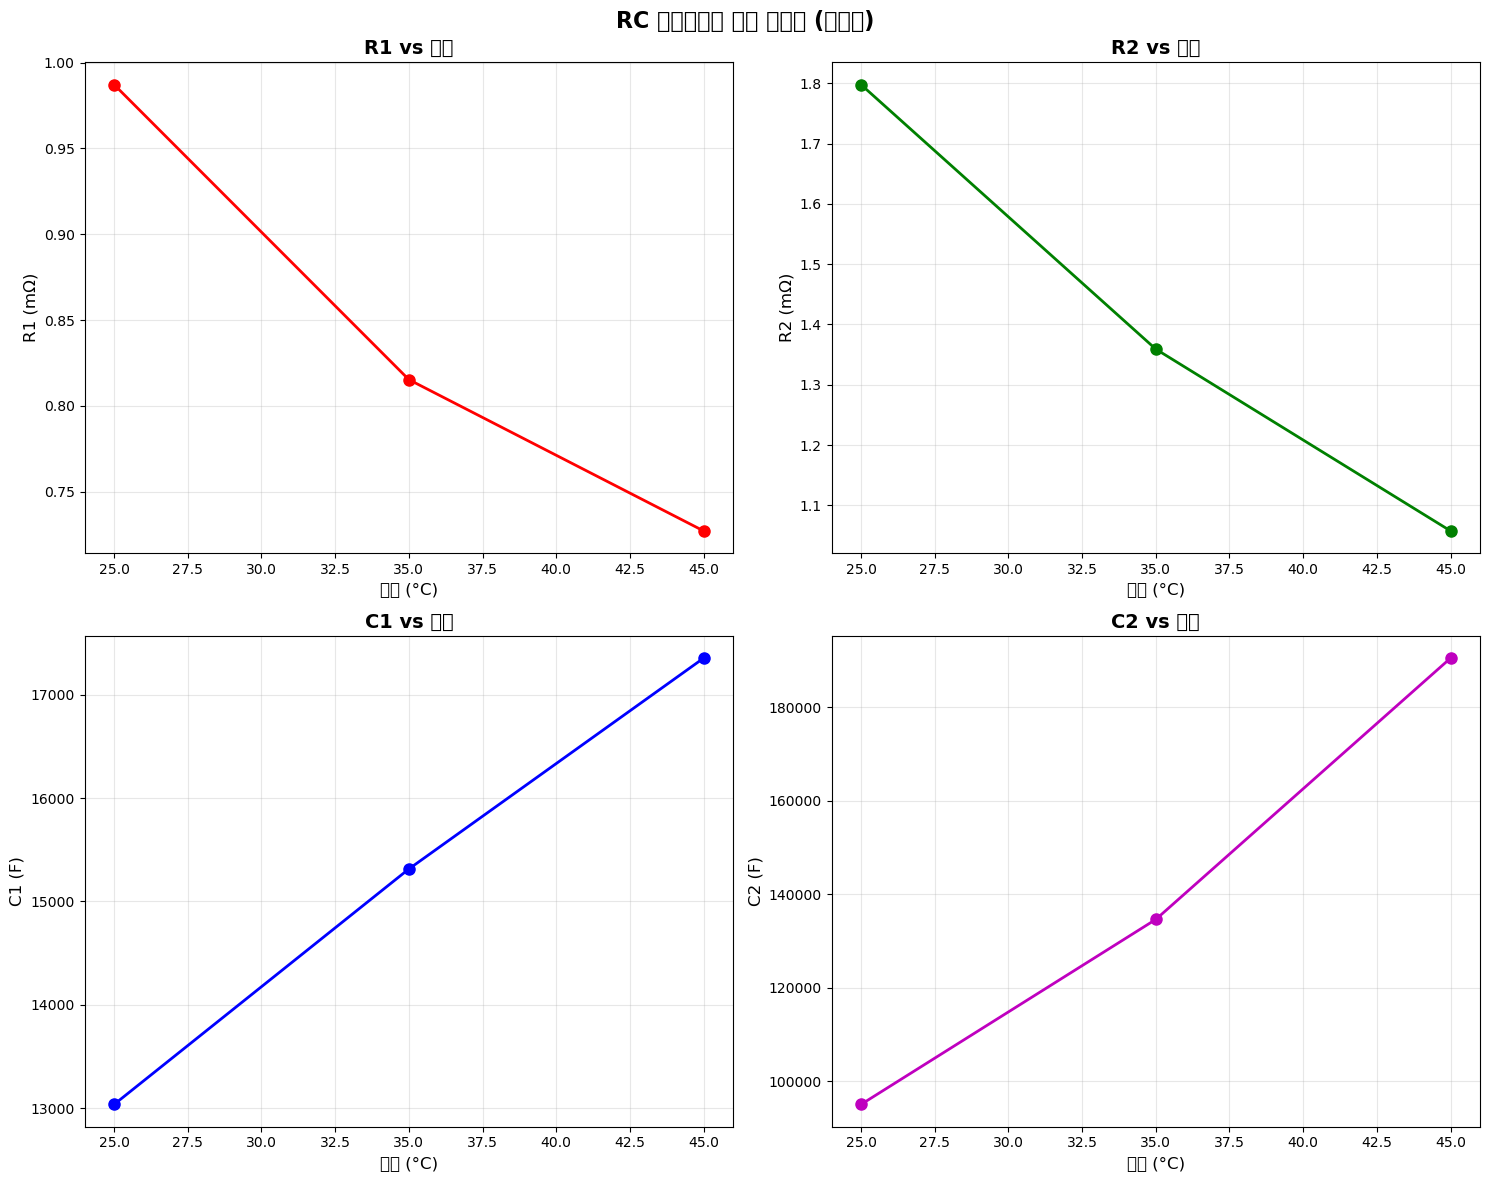


üìà Ïò®ÎèÑ Í≥ÑÏàò Î∂ÑÏÑù (25¬∞C Í∏∞Ï§Ä)

Í∏∞Ï§Ä Ïò®ÎèÑ: 25¬∞C
ÌååÎùºÎØ∏ÌÑ∞     25¬∞C Í∞í       35¬∞C Í∞í       45¬∞C Í∞í       Ïò®ÎèÑÍ≥ÑÏàò (%/¬∞C)    
----------------------------------------------------------------------
R1 (mŒ©)  0.99         0.82         0.73         -1.317         
R2 (mŒ©)  1.80         1.36         1.06         -2.058         
C1 (F)   13036        15315        17356        1.657          
C2 (F)   95034        134604       190492       5.022          

Ìï¥ÏÑù:
‚Ä¢ R1, R2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Í∞êÏÜå (ÏùåÏùò Ïò®ÎèÑ Í≥ÑÏàò)
‚Ä¢ C1, C2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Ï¶ùÍ∞Ä (ÏñëÏùò Ïò®ÎèÑ Í≥ÑÏàò)
‚Ä¢ Ï†ÄÌï≠Í≥º Ï∫êÌå®ÏãúÌÑ¥Ïä§Îäî Î∞òÎåÄ Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ


In [103]:
# R1, R2, C1, C2 ÌååÎùºÎØ∏ÌÑ∞Ïùò SOC Î∞è Ïò®ÎèÑ ÏùòÏ°¥ÏÑ± Ï¢ÖÌï© Î∂ÑÏÑù

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

print("=" * 80)
print("Î∞∞ÌÑ∞Î¶¨ RC ÌååÎùºÎØ∏ÌÑ∞ Ï¢ÖÌï© Î∂ÑÏÑù: SOC Î∞è Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±")
print("=" * 80)

# ÌòÑÏû¨ ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("üìä ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞:")
print(f"Ïò®ÎèÑ: {sorted(R1_dict_Bat.keys())}¬∞C")
print(f"SOC Î≤îÏúÑ: Í∞Å Ïò®ÎèÑÎ≥ÑÎ°ú Îã§ÏñëÌïú SOC Ìè¨Ïù∏Ìä∏")

# 1. Í∞Å ÌååÎùºÎØ∏ÌÑ∞Ïùò Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑†Í∞í ÎπÑÍµê
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('RC ÌååÎùºÎØ∏ÌÑ∞Ïùò Ïò®ÎèÑ ÏùòÏ°¥ÏÑ± (ÌèâÍ∑†Í∞í)', fontsize=16, fontweight='bold')

temps = sorted(R1_dict_Bat.keys())
r1_means = []
r2_means = []
c1_means = []
c2_means = []

for temp in temps:
    r1_means.append(np.mean(R1_dict_Bat[temp][:, 1]) * 1000)  # mŒ© Î≥ÄÌôò
    r2_means.append(np.mean(R2_dict_Bat[temp][:, 1]) * 1000)  # mŒ© Î≥ÄÌôò
    c1_means.append(np.mean(c1_dict_Bat[temp][:, 1]))
    c2_means.append(np.mean(c2_dict_Bat[temp][:, 1]))

# R1 Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
axes[0, 0].plot(temps, r1_means, 'ro-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
axes[0, 0].set_ylabel('R1 (mŒ©)', fontsize=12)
axes[0, 0].set_title('R1 vs Ïò®ÎèÑ', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# R2 Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
axes[0, 1].plot(temps, r2_means, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
axes[0, 1].set_ylabel('R2 (mŒ©)', fontsize=12)
axes[0, 1].set_title('R2 vs Ïò®ÎèÑ', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# C1 Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
axes[1, 0].plot(temps, c1_means, 'bo-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
axes[1, 0].set_ylabel('C1 (F)', fontsize=12)
axes[1, 0].set_title('C1 vs Ïò®ÎèÑ', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# C2 Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±
axes[1, 1].plot(temps, c2_means, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
axes[1, 1].set_ylabel('C2 (F)', fontsize=12)
axes[1, 1].set_title('C2 vs Ïò®ÎèÑ', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ïò®ÎèÑ Í≥ÑÏàò Í≥ÑÏÇ∞ Î∞è ÌëúÏãú
print("\n" + "=" * 60)
print("üìà Ïò®ÎèÑ Í≥ÑÏàò Î∂ÑÏÑù (25¬∞C Í∏∞Ï§Ä)")
print("=" * 60)

# 25¬∞CÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïò®ÎèÑ Í≥ÑÏàò Í≥ÑÏÇ∞
base_temp = 25
if base_temp in temps:
    base_idx = temps.index(base_temp)
    
    print(f"\nÍ∏∞Ï§Ä Ïò®ÎèÑ: {base_temp}¬∞C")
    print(f"{'ÌååÎùºÎØ∏ÌÑ∞':<8} {'25¬∞C Í∞í':<12} {'35¬∞C Í∞í':<12} {'45¬∞C Í∞í':<12} {'Ïò®ÎèÑÍ≥ÑÏàò (%/¬∞C)':<15}")
    print("-" * 70)
    
    # R1 Ïò®ÎèÑ Í≥ÑÏàò
    r1_base = r1_means[base_idx]
    for i, temp in enumerate(temps):
        if temp != base_temp:
            r1_coeff = (r1_means[i] - r1_base) / r1_base / (temp - base_temp) * 100
            if i == len(temps)-1:  # ÎßàÏßÄÎßâ Ïò®ÎèÑÏóêÏÑúÎßå Ï∂úÎ†•
                print(f"{'R1 (mŒ©)':<8} {r1_means[0]:<12.2f} {r1_means[1]:<12.2f} {r1_means[2]:<12.2f} {r1_coeff:<15.3f}")
    
    # R2 Ïò®ÎèÑ Í≥ÑÏàò
    r2_base = r2_means[base_idx]
    for i, temp in enumerate(temps):
        if temp != base_temp:
            r2_coeff = (r2_means[i] - r2_base) / r2_base / (temp - base_temp) * 100
            if i == len(temps)-1:
                print(f"{'R2 (mŒ©)':<8} {r2_means[0]:<12.2f} {r2_means[1]:<12.2f} {r2_means[2]:<12.2f} {r2_coeff:<15.3f}")
    
    # C1 Ïò®ÎèÑ Í≥ÑÏàò
    c1_base = c1_means[base_idx]
    for i, temp in enumerate(temps):
        if temp != base_temp:
            c1_coeff = (c1_means[i] - c1_base) / c1_base / (temp - base_temp) * 100
            if i == len(temps)-1:
                print(f"{'C1 (F)':<8} {c1_means[0]:<12.0f} {c1_means[1]:<12.0f} {c1_means[2]:<12.0f} {c1_coeff:<15.3f}")
    
    # C2 Ïò®ÎèÑ Í≥ÑÏàò
    c2_base = c2_means[base_idx]
    for i, temp in enumerate(temps):
        if temp != base_temp:
            c2_coeff = (c2_means[i] - c2_base) / c2_base / (temp - base_temp) * 100
            if i == len(temps)-1:
                print(f"{'C2 (F)':<8} {c2_means[0]:<12.0f} {c2_means[1]:<12.0f} {c2_means[2]:<12.0f} {c2_coeff:<15.3f}")

print("\nÌï¥ÏÑù:")
print("‚Ä¢ R1, R2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Í∞êÏÜå (ÏùåÏùò Ïò®ÎèÑ Í≥ÑÏàò)")
print("‚Ä¢ C1, C2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Ï¶ùÍ∞Ä (ÏñëÏùò Ïò®ÎèÑ Í≥ÑÏàò)")
print("‚Ä¢ Ï†ÄÌï≠Í≥º Ï∫êÌå®ÏãúÌÑ¥Ïä§Îäî Î∞òÎåÄ Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ")


üìä RC ÌååÎùºÎØ∏ÌÑ∞Ïùò SOC ÏùòÏ°¥ÏÑ± Î∂ÑÏÑù


C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\2685290920.py:61: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\2685290920.py:61: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\2685290920.py:61: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\2685290920.py:61: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\2685290920.py:61: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\2685290920.py:61: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing f

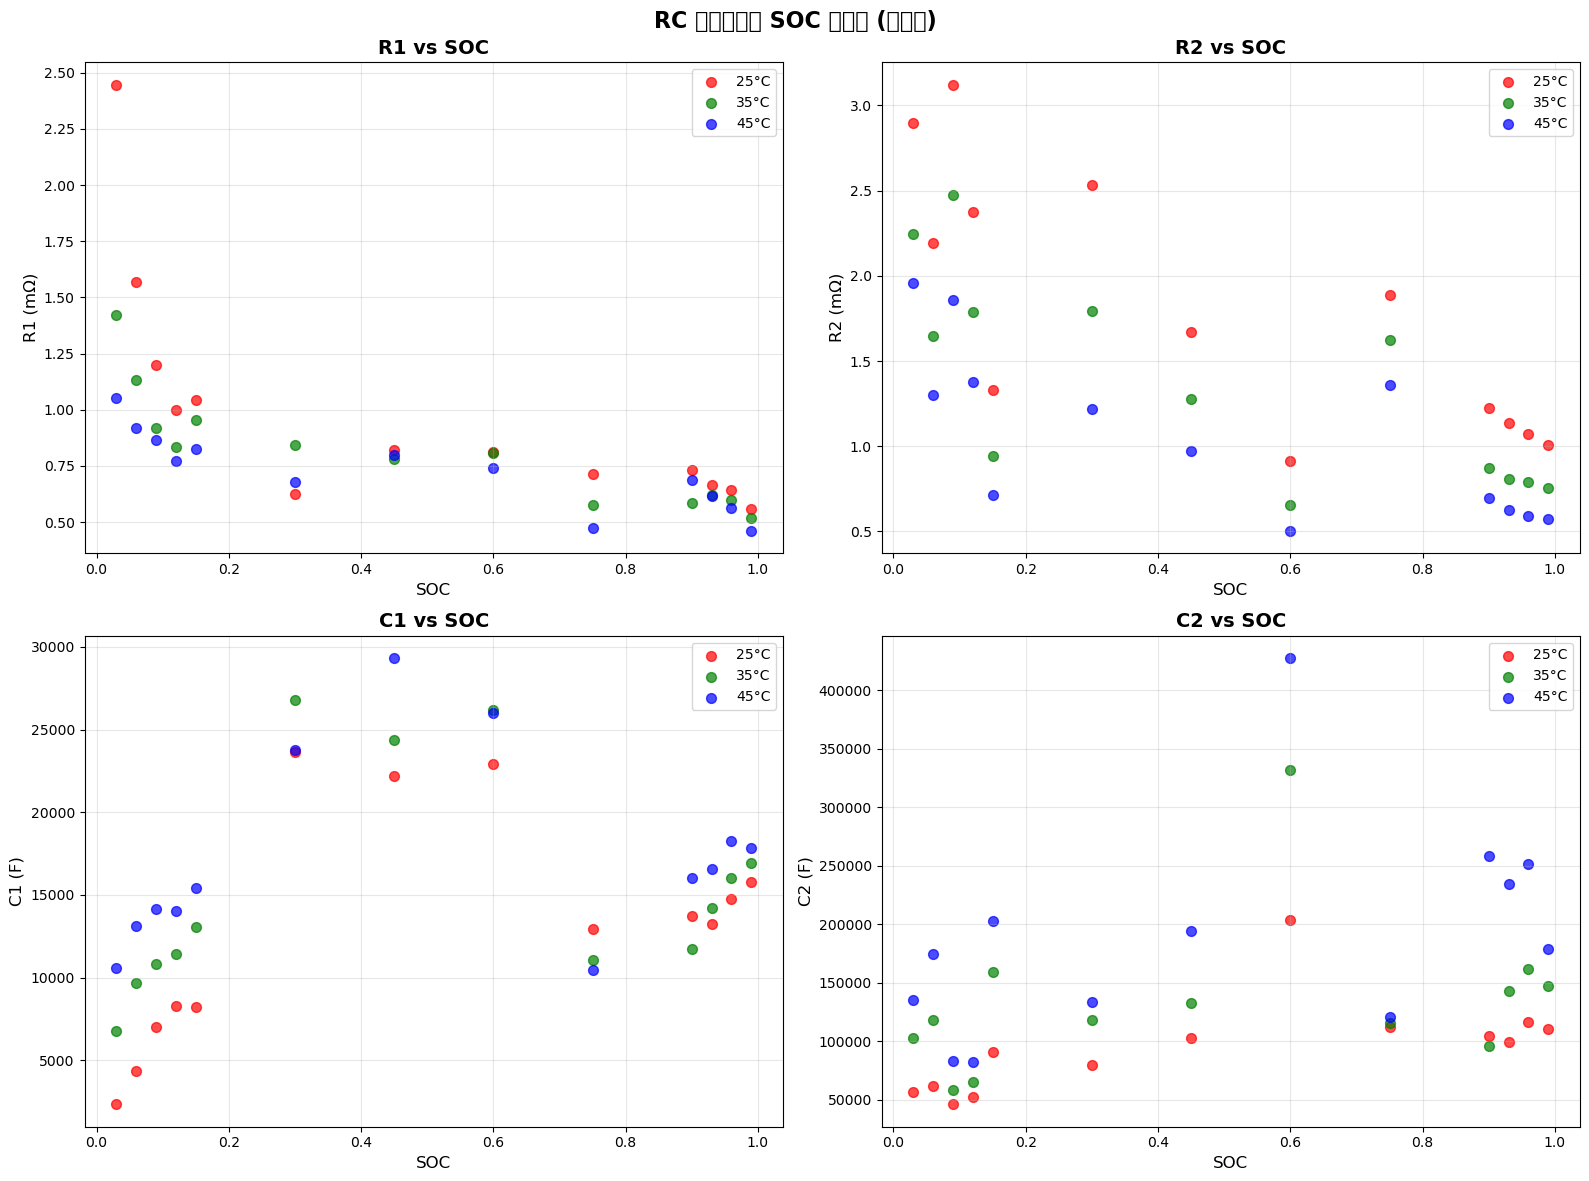


üìà SOC ÏùòÏ°¥ÏÑ± Ï†ïÎüâ Î∂ÑÏÑù

üå°Ô∏è 25¬∞CÏóêÏÑúÏùò SOC ÏùòÏ°¥ÏÑ±:
  SOC Î≤îÏúÑ: 0.03 ~ 0.99
  R1 Î≥ÄÌôî: 0.56 ~ 2.45 mŒ© (Î≥ÄÎèôÎ•†: 191.5%)
  R2 Î≥ÄÌôî: 0.92 ~ 3.12 mŒ© (Î≥ÄÎèôÎ•†: 122.7%)
  C1 Î≥ÄÌôî: 2336 ~ 23632 F (Î≥ÄÎèôÎ•†: 163.4%)
  C2 Î≥ÄÌôî: 46058 ~ 203955 F (Î≥ÄÎèôÎ•†: 166.1%)

üå°Ô∏è 35¬∞CÏóêÏÑúÏùò SOC ÏùòÏ°¥ÏÑ±:
  SOC Î≤îÏúÑ: 0.03 ~ 0.99
  R1 Î≥ÄÌôî: 0.52 ~ 1.42 mŒ© (Î≥ÄÎèôÎ•†: 111.0%)
  R2 Î≥ÄÌôî: 0.65 ~ 2.48 mŒ© (Î≥ÄÎèôÎ•†: 134.1%)
  C1 Î≥ÄÌôî: 6778 ~ 26820 F (Î≥ÄÎèôÎ•†: 130.9%)
  C2 Î≥ÄÌôî: 58516 ~ 331434 F (Î≥ÄÎèôÎ•†: 202.8%)

üå°Ô∏è 45¬∞CÏóêÏÑúÏùò SOC ÏùòÏ°¥ÏÑ±:
  SOC Î≤îÏúÑ: 0.03 ~ 0.99
  R1 Î≥ÄÌôî: 0.46 ~ 1.05 mŒ© (Î≥ÄÎèôÎ•†: 81.6%)
  R2 Î≥ÄÌôî: 0.50 ~ 1.96 mŒ© (Î≥ÄÎèôÎ•†: 137.7%)
  C1 Î≥ÄÌôî: 10469 ~ 29321 F (Î≥ÄÎèôÎ•†: 108.6%)
  C2 Î≥ÄÌôî: 82262 ~ 427387 F (Î≥ÄÎèôÎ•†: 181.2%)

üîç SOC ÏùòÏ°¥ÏÑ± ÌäπÏÑ± Î∂ÑÏÑù

SOC Íµ¨Í∞ÑÎ≥Ñ ÌäπÏÑ±:

üìä 25¬∞C Ïò®ÎèÑÏóêÏÑú:
  Ï†ÄSOC: R1=1.31mŒ©, R2=2.41mŒ©, C1=8985F, C2=64501F
  Ï§ëSOC: R1=0.75mŒ©, R2=1.71mŒ©, C1=22919F, C

In [104]:
# 2. SOC ÏùòÏ°¥ÏÑ± Î∂ÑÏÑù
print("\n" + "=" * 80)
print("üìä RC ÌååÎùºÎØ∏ÌÑ∞Ïùò SOC ÏùòÏ°¥ÏÑ± Î∂ÑÏÑù")
print("=" * 80)

# SOC vs ÌååÎùºÎØ∏ÌÑ∞ ÌîåÎ°Ø (Í∞Å Ïò®ÎèÑÎ≥Ñ)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('RC ÌååÎùºÎØ∏ÌÑ∞Ïùò SOC ÏùòÏ°¥ÏÑ± (Ïò®ÎèÑÎ≥Ñ)', fontsize=16, fontweight='bold')

colors = ['red', 'green', 'blue']
temp_labels = [f'{temp}¬∞C' for temp in temps]

# R1 vs SOC
for i, temp in enumerate(temps):
    soc_data = R1_dict_Bat[temp][:, 0]
    r1_data = R1_dict_Bat[temp][:, 1] * 1000  # mŒ© Î≥ÄÌôò
    axes[0, 0].scatter(soc_data, r1_data, c=colors[i], label=temp_labels[i], alpha=0.7, s=50)

axes[0, 0].set_xlabel('SOC', fontsize=12)
axes[0, 0].set_ylabel('R1 (mŒ©)', fontsize=12)
axes[0, 0].set_title('R1 vs SOC', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# R2 vs SOC
for i, temp in enumerate(temps):
    soc_data = R2_dict_Bat[temp][:, 0]
    r2_data = R2_dict_Bat[temp][:, 1] * 1000  # mŒ© Î≥ÄÌôò
    axes[0, 1].scatter(soc_data, r2_data, c=colors[i], label=temp_labels[i], alpha=0.7, s=50)

axes[0, 1].set_xlabel('SOC', fontsize=12)
axes[0, 1].set_ylabel('R2 (mŒ©)', fontsize=12)
axes[0, 1].set_title('R2 vs SOC', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# C1 vs SOC
for i, temp in enumerate(temps):
    soc_data = c1_dict_Bat[temp][:, 0]
    c1_data = c1_dict_Bat[temp][:, 1]
    axes[1, 0].scatter(soc_data, c1_data, c=colors[i], label=temp_labels[i], alpha=0.7, s=50)

axes[1, 0].set_xlabel('SOC', fontsize=12)
axes[1, 0].set_ylabel('C1 (F)', fontsize=12)
axes[1, 0].set_title('C1 vs SOC', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# C2 vs SOC
for i, temp in enumerate(temps):
    soc_data = c2_dict_Bat[temp][:, 0]
    c2_data = c2_dict_Bat[temp][:, 1]
    axes[1, 1].scatter(soc_data, c2_data, c=colors[i], label=temp_labels[i], alpha=0.7, s=50)

axes[1, 1].set_xlabel('SOC', fontsize=12)
axes[1, 1].set_ylabel('C2 (F)', fontsize=12)
axes[1, 1].set_title('C2 vs SOC', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# SOC ÏùòÏ°¥ÏÑ± Ï†ïÎüâ Î∂ÑÏÑù
print("\n" + "=" * 60)
print("üìà SOC ÏùòÏ°¥ÏÑ± Ï†ïÎüâ Î∂ÑÏÑù")
print("=" * 60)

for temp in temps:
    print(f"\nüå°Ô∏è {temp}¬∞CÏóêÏÑúÏùò SOC ÏùòÏ°¥ÏÑ±:")
    
    # Í∞Å ÌååÎùºÎØ∏ÌÑ∞Î≥Ñ SOC Î≤îÏúÑÏôÄ Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞
    r1_soc = R1_dict_Bat[temp][:, 0]
    r1_vals = R1_dict_Bat[temp][:, 1] * 1000
    r1_min, r1_max = np.min(r1_vals), np.max(r1_vals)
    r1_variation = (r1_max - r1_min) / np.mean(r1_vals) * 100
    
    r2_soc = R2_dict_Bat[temp][:, 0]
    r2_vals = R2_dict_Bat[temp][:, 1] * 1000
    r2_min, r2_max = np.min(r2_vals), np.max(r2_vals)
    r2_variation = (r2_max - r2_min) / np.mean(r2_vals) * 100
    
    c1_soc = c1_dict_Bat[temp][:, 0]
    c1_vals = c1_dict_Bat[temp][:, 1]
    c1_min, c1_max = np.min(c1_vals), np.max(c1_vals)
    c1_variation = (c1_max - c1_min) / np.mean(c1_vals) * 100
    
    c2_soc = c2_dict_Bat[temp][:, 0]
    c2_vals = c2_dict_Bat[temp][:, 1]
    c2_min, c2_max = np.min(c2_vals), np.max(c2_vals)
    c2_variation = (c2_max - c2_min) / np.mean(c2_vals) * 100
    
    print(f"  SOC Î≤îÏúÑ: {np.min(r1_soc):.2f} ~ {np.max(r1_soc):.2f}")
    print(f"  R1 Î≥ÄÌôî: {r1_min:.2f} ~ {r1_max:.2f} mŒ© (Î≥ÄÎèôÎ•†: {r1_variation:.1f}%)")
    print(f"  R2 Î≥ÄÌôî: {r2_min:.2f} ~ {r2_max:.2f} mŒ© (Î≥ÄÎèôÎ•†: {r2_variation:.1f}%)")
    print(f"  C1 Î≥ÄÌôî: {c1_min:.0f} ~ {c1_max:.0f} F (Î≥ÄÎèôÎ•†: {c1_variation:.1f}%)")
    print(f"  C2 Î≥ÄÌôî: {c2_min:.0f} ~ {c2_max:.0f} F (Î≥ÄÎèôÎ•†: {c2_variation:.1f}%)")

print("\n" + "=" * 60)
print("üîç SOC ÏùòÏ°¥ÏÑ± ÌäπÏÑ± Î∂ÑÏÑù")
print("=" * 60)

# Í∞Å Ïò®ÎèÑÏóêÏÑú SOCÎ≥Ñ Í≤ΩÌñ• Î∂ÑÏÑù
print("\nSOC Íµ¨Í∞ÑÎ≥Ñ ÌäπÏÑ±:")
soc_ranges = [(0.0, 0.3, "Ï†ÄSOC"), (0.3, 0.7, "Ï§ëSOC"), (0.7, 1.0, "Í≥†SOC")]

for temp in temps:
    print(f"\nüìä {temp}¬∞C Ïò®ÎèÑÏóêÏÑú:")
    
    for soc_min, soc_max, soc_label in soc_ranges:
        # R1 Î∂ÑÏÑù
        r1_mask = (R1_dict_Bat[temp][:, 0] >= soc_min) & (R1_dict_Bat[temp][:, 0] <= soc_max)
        if np.any(r1_mask):
            r1_avg = np.mean(R1_dict_Bat[temp][r1_mask, 1]) * 1000
            
            # R2 Î∂ÑÏÑù 
            r2_mask = (R2_dict_Bat[temp][:, 0] >= soc_min) & (R2_dict_Bat[temp][:, 0] <= soc_max)
            r2_avg = np.mean(R2_dict_Bat[temp][r2_mask, 1]) * 1000
            
            # C1 Î∂ÑÏÑù
            c1_mask = (c1_dict_Bat[temp][:, 0] >= soc_min) & (c1_dict_Bat[temp][:, 0] <= soc_max)
            c1_avg = np.mean(c1_dict_Bat[temp][c1_mask, 1])
            
            # C2 Î∂ÑÏÑù
            c2_mask = (c2_dict_Bat[temp][:, 0] >= soc_min) & (c2_dict_Bat[temp][:, 0] <= soc_max)
            c2_avg = np.mean(c2_dict_Bat[temp][c2_mask, 1])
            
            print(f"  {soc_label}: R1={r1_avg:.2f}mŒ©, R2={r2_avg:.2f}mŒ©, C1={c1_avg:.0f}F, C2={c2_avg:.0f}F")

print("\nÌï¥ÏÑù:")
print("‚Ä¢ Ï†ÄSOC: ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎÜíÏùÄ Ï†ÄÌï≠, ÎÇÆÏùÄ Ï∫êÌå®ÏãúÌÑ¥Ïä§")
print("‚Ä¢ Í≥†SOC: ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ï†ÄÌï≠, ÎÜíÏùÄ Ï∫êÌå®ÏãúÌÑ¥Ïä§")
print("‚Ä¢ Ïò®ÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï†ÄÌï≠‚Üì, Ï∫êÌå®ÏãúÌÑ¥Ïä§‚Üë")


‚è∞ ÏãúÏÉÅÏàò (œÑ = R√óC) Ï¢ÖÌï© Î∂ÑÏÑù


C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\118624771.py:85: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\118624771.py:85: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\118624771.py:85: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\118624771.py:85: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\118624771.py:85: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\118624771.py:85: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from fo

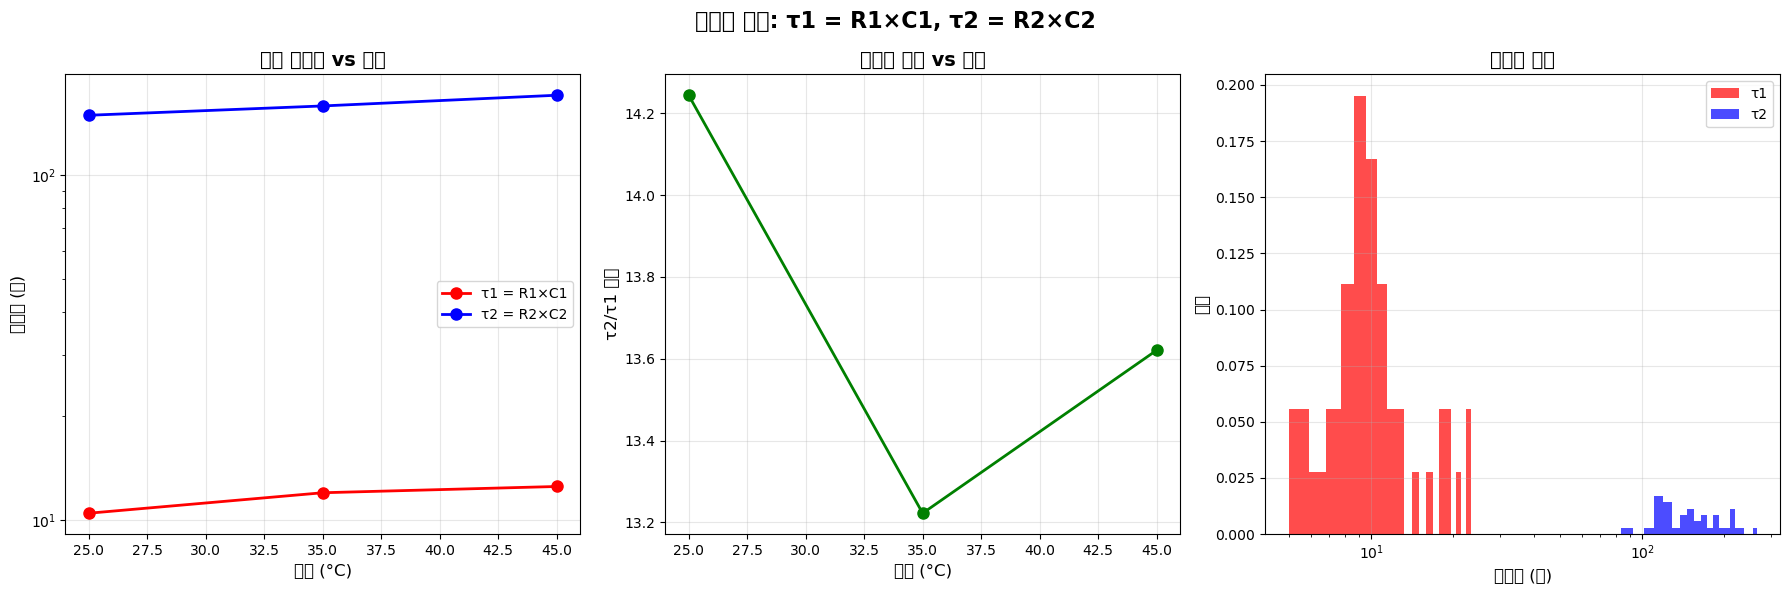


üìä ÏãúÏÉÅÏàò Ï†ïÎüâ Î∂ÑÏÑù:
Ïò®ÎèÑ(¬∞C)   œÑ1 ÌèâÍ∑†(s)     œÑ2 ÌèâÍ∑†(s)     œÑ2/œÑ1 ÎπÑÏú®   ÏãúÍ∞Ñ Ïä§ÏºÄÏùº         
-----------------------------------------------------------------
25       10.46        148.96       14.2       œÑ1:10.5s, œÑ2:2.5min
35       11.99        158.53       13.2       œÑ1:12.0s, œÑ2:2.6min
45       12.50        170.27       13.6       œÑ1:12.5s, œÑ2:2.8min

Ìï¥ÏÑù:
‚Ä¢ œÑ1 (Îπ†Î•∏): 10.5~12.5Ï¥à (Ï†ÑÌïòÏ†ÑÎã¨ Í≥ºÏ†ï)
‚Ä¢ œÑ2 (ÎäêÎ¶∞): 149.0~170.3Ï¥à (ÌôïÏÇ∞ Í≥ºÏ†ï)
‚Ä¢ œÑ2/œÑ1 ÎπÑÏú®: 13.2~14.2 (Îã§Ï§ë ÏãúÍ∞Ñ Ïä§ÏºÄÏùº)
‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí ÏãúÏÉÅÏàò Î≥ÄÌôî (R‚Üì, C‚ÜëÏùò ÏÉÅÎåÄÏ†Å Ìö®Í≥º)

üî¨ ÏãúÏÉÅÏàòÏùò Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏

œÑ1 = R1 √ó C1 (Îπ†Î•∏ ÏãúÏÉÅÏàò):
‚Ä¢ Ï†ÑÍ∑π/Ï†ÑÌï¥Ïßà Í≥ÑÎ©¥Ïùò Ï†ÑÌïò Ï†ÑÎã¨ Í≥ºÏ†ï
‚Ä¢ Ïù¥Ï§ëÏ∏µ Ï∂©Ï†Ñ ÏãúÍ∞Ñ
‚Ä¢ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏàòÏ¥à~ÏàòÏã≠Ï¥à Î≤îÏúÑ
‚Ä¢ ÌéÑÏä§ ÏùëÎãµÏùò Ï¥àÍ∏∞ Í≥ºÎèÑ ÌòÑÏÉÅ

œÑ2 = R2 √ó C2 (ÎäêÎ¶∞ ÏãúÏÉÅÏàò):
‚Ä¢ Í≥†Ï≤¥ÏÉÅ ÎÇ¥ Î¶¨Ìä¨ Ïù¥Ïò® ÌôïÏÇ∞ Í≥ºÏ†ï
‚Ä¢ ÎÜçÎèÑ Íµ¨Î∞∞ ÌèâÌòïÌôî ÏãúÍ∞Ñ
‚Ä¢ ÏùºÎ∞òÏ†

In [105]:
# 3. ÏãúÏÉÅÏàò(Time Constant) Ï¢ÖÌï© Î∂ÑÏÑù
print("\n" + "=" * 80)
print("‚è∞ ÏãúÏÉÅÏàò (œÑ = R√óC) Ï¢ÖÌï© Î∂ÑÏÑù")
print("=" * 80)

# ÏãúÏÉÅÏàò Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ÏãúÏÉÅÏàò Î∂ÑÏÑù: œÑ1 = R1√óC1, œÑ2 = R2√óC2', fontsize=16, fontweight='bold')

# Í∞Å Ïò®ÎèÑÎ≥Ñ ÏãúÏÉÅÏàò Í≥ÑÏÇ∞
tau_data = {'temp': [], 'tau1_mean': [], 'tau2_mean': [], 'tau1_all': [], 'tau2_all': [], 'soc_all': []}

for temp in temps:
    # SOCÍ∞Ä ÏùºÏπòÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ï∞æÍ∏∞
    r1_data = R1_dict_Bat[temp]
    r2_data = R2_dict_Bat[temp] 
    c1_data = c1_dict_Bat[temp]
    c2_data = c2_dict_Bat[temp]
    
    # SOC Í∏∞Ï§ÄÏúºÎ°ú Îß§Ïπ≠ (Í∞ÄÏû• Í∞ÄÍπåÏö¥ SOC Í∞í Ï∞æÍ∏∞)
    tau1_vals = []
    tau2_vals = []
    soc_vals = []
    
    for i in range(len(r1_data)):
        r1_soc = r1_data[i, 0]
        r1_val = r1_data[i, 1]
        
        # R2, C1, C2ÏóêÏÑú Í∞ÄÏû• Í∞ÄÍπåÏö¥ SOC Ï∞æÍ∏∞
        r2_idx = np.argmin(np.abs(r2_data[:, 0] - r1_soc))
        c1_idx = np.argmin(np.abs(c1_data[:, 0] - r1_soc))
        c2_idx = np.argmin(np.abs(c2_data[:, 0] - r1_soc))
        
        # SOC Ï∞®Ïù¥Í∞Ä 0.05 Ïù¥ÎÇ¥Ïù∏ Í≤ΩÏö∞Îßå ÏÇ¨Ïö©
        if (np.abs(r2_data[r2_idx, 0] - r1_soc) < 0.05 and 
            np.abs(c1_data[c1_idx, 0] - r1_soc) < 0.05 and 
            np.abs(c2_data[c2_idx, 0] - r1_soc) < 0.05):
            
            r2_val = r2_data[r2_idx, 1]
            c1_val = c1_data[c1_idx, 1]
            c2_val = c2_data[c2_idx, 1]
            
            tau1 = r1_val * c1_val
            tau2 = r2_val * c2_val
            
            tau1_vals.append(tau1)
            tau2_vals.append(tau2)
            soc_vals.append(r1_soc)
    
    tau_data['temp'].append(temp)
    tau_data['tau1_mean'].append(np.mean(tau1_vals))
    tau_data['tau2_mean'].append(np.mean(tau2_vals))
    tau_data['tau1_all'].extend(tau1_vals)
    tau_data['tau2_all'].extend(tau2_vals)
    tau_data['soc_all'].extend(soc_vals)

# Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑† ÏãúÏÉÅÏàò ÌîåÎ°Ø
axes[0].plot(tau_data['temp'], tau_data['tau1_mean'], 'ro-', linewidth=2, markersize=8, label='œÑ1 = R1√óC1')
axes[0].plot(tau_data['temp'], tau_data['tau2_mean'], 'bo-', linewidth=2, markersize=8, label='œÑ2 = R2√óC2')
axes[0].set_xlabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
axes[0].set_ylabel('ÏãúÏÉÅÏàò (Ï¥à)', fontsize=12)
axes[0].set_title('ÌèâÍ∑† ÏãúÏÉÅÏàò vs Ïò®ÎèÑ', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

# ÏãúÏÉÅÏàò ÎπÑÏú® Î∂ÑÏÑù
tau_ratios = [tau2/tau1 for tau1, tau2 in zip(tau_data['tau1_mean'], tau_data['tau2_mean'])]
axes[1].plot(tau_data['temp'], tau_ratios, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
axes[1].set_ylabel('œÑ2/œÑ1 ÎπÑÏú®', fontsize=12)
axes[1].set_title('ÏãúÏÉÅÏàò ÎπÑÏú® vs Ïò®ÎèÑ', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# ÏãúÏÉÅÏàò Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)
axes[2].hist(tau_data['tau1_all'], bins=20, alpha=0.7, label='œÑ1', color='red', density=True)
axes[2].hist(tau_data['tau2_all'], bins=20, alpha=0.7, label='œÑ2', color='blue', density=True)
axes[2].set_xlabel('ÏãúÏÉÅÏàò (Ï¥à)', fontsize=12)
axes[2].set_ylabel('Î∞ÄÎèÑ', fontsize=12)
axes[2].set_title('ÏãúÏÉÅÏàò Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].set_xscale('log')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÏãúÏÉÅÏàò Ï†ïÎüâ Î∂ÑÏÑù
print("\nüìä ÏãúÏÉÅÏàò Ï†ïÎüâ Î∂ÑÏÑù:")
print(f"{'Ïò®ÎèÑ(¬∞C)':<8} {'œÑ1 ÌèâÍ∑†(s)':<12} {'œÑ2 ÌèâÍ∑†(s)':<12} {'œÑ2/œÑ1 ÎπÑÏú®':<10} {'ÏãúÍ∞Ñ Ïä§ÏºÄÏùº':<15}")
print("-" * 65)

for i, temp in enumerate(tau_data['temp']):
    tau1_avg = tau_data['tau1_mean'][i]
    tau2_avg = tau_data['tau2_mean'][i]
    ratio = tau2_avg / tau1_avg
    
    # ÏãúÍ∞Ñ Ïä§ÏºÄÏùº Î∂ÑÎ•ò
    if tau1_avg < 60:
        tau1_scale = f"{tau1_avg:.1f}s"
    elif tau1_avg < 3600:
        tau1_scale = f"{tau1_avg/60:.1f}min"
    else:
        tau1_scale = f"{tau1_avg/3600:.1f}h"
        
    if tau2_avg < 60:
        tau2_scale = f"{tau2_avg:.1f}s"
    elif tau2_avg < 3600:
        tau2_scale = f"{tau2_avg/60:.1f}min"
    else:
        tau2_scale = f"{tau2_avg/3600:.1f}h"
    
    print(f"{temp:<8} {tau1_avg:<12.2f} {tau2_avg:<12.2f} {ratio:<10.1f} œÑ1:{tau1_scale}, œÑ2:{tau2_scale}")

print(f"\nÌï¥ÏÑù:")
print(f"‚Ä¢ œÑ1 (Îπ†Î•∏): {np.min(tau_data['tau1_mean']):.1f}~{np.max(tau_data['tau1_mean']):.1f}Ï¥à (Ï†ÑÌïòÏ†ÑÎã¨ Í≥ºÏ†ï)")
print(f"‚Ä¢ œÑ2 (ÎäêÎ¶∞): {np.min(tau_data['tau2_mean']):.1f}~{np.max(tau_data['tau2_mean']):.1f}Ï¥à (ÌôïÏÇ∞ Í≥ºÏ†ï)")
print(f"‚Ä¢ œÑ2/œÑ1 ÎπÑÏú®: {np.min(tau_ratios):.1f}~{np.max(tau_ratios):.1f} (Îã§Ï§ë ÏãúÍ∞Ñ Ïä§ÏºÄÏùº)")
print(f"‚Ä¢ Ïò®ÎèÑ ÏÉÅÏäπ ‚Üí ÏãúÏÉÅÏàò Î≥ÄÌôî (R‚Üì, C‚ÜëÏùò ÏÉÅÎåÄÏ†Å Ìö®Í≥º)")

# Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏ ÏÑ§Î™Ö
print("\n" + "=" * 60)
print("üî¨ ÏãúÏÉÅÏàòÏùò Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏")
print("=" * 60)
print("""
œÑ1 = R1 √ó C1 (Îπ†Î•∏ ÏãúÏÉÅÏàò):
‚Ä¢ Ï†ÑÍ∑π/Ï†ÑÌï¥Ïßà Í≥ÑÎ©¥Ïùò Ï†ÑÌïò Ï†ÑÎã¨ Í≥ºÏ†ï
‚Ä¢ Ïù¥Ï§ëÏ∏µ Ï∂©Ï†Ñ ÏãúÍ∞Ñ
‚Ä¢ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏàòÏ¥à~ÏàòÏã≠Ï¥à Î≤îÏúÑ
‚Ä¢ ÌéÑÏä§ ÏùëÎãµÏùò Ï¥àÍ∏∞ Í≥ºÎèÑ ÌòÑÏÉÅ

œÑ2 = R2 √ó C2 (ÎäêÎ¶∞ ÏãúÏÉÅÏàò):
‚Ä¢ Í≥†Ï≤¥ÏÉÅ ÎÇ¥ Î¶¨Ìä¨ Ïù¥Ïò® ÌôïÏÇ∞ Í≥ºÏ†ï
‚Ä¢ ÎÜçÎèÑ Íµ¨Î∞∞ ÌèâÌòïÌôî ÏãúÍ∞Ñ
‚Ä¢ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏàòÎ∂Ñ~ÏàòÏãúÍ∞Ñ Î≤îÏúÑ
‚Ä¢ Ïû•Í∏∞Í∞Ñ Ïù¥ÏôÑ Í±∞Îèô

Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:
‚Ä¢ Í≥†Ïò®: œÑ Í∞êÏÜå (Î∞òÏùë ÏÜçÎèÑ Ï¶ùÍ∞Ä)
‚Ä¢ Ï†ÄÏò®: œÑ Ï¶ùÍ∞Ä (Î∞òÏùë ÏÜçÎèÑ Í∞êÏÜå)
‚Ä¢ RÍ≥º CÏùò ÏÉÅÎåÄÏ†Å Î≥ÄÌôîÏú®Ïóê Îî∞Îùº œÑ Î≥ÄÌôî Í≤∞Ï†ï
""")


üéØ 3D ÏãúÍ∞ÅÌôî: SOC-Ïò®ÎèÑ-ÌååÎùºÎØ∏ÌÑ∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ


C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1694425532.py:66: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1694425532.py:66: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1694425532.py:66: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1694425532.py:66: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1694425532.py:66: UserWarning: Glyph 52880 (\N{HANGUL SYLLABLE KAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\1694425532.py:66: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missin

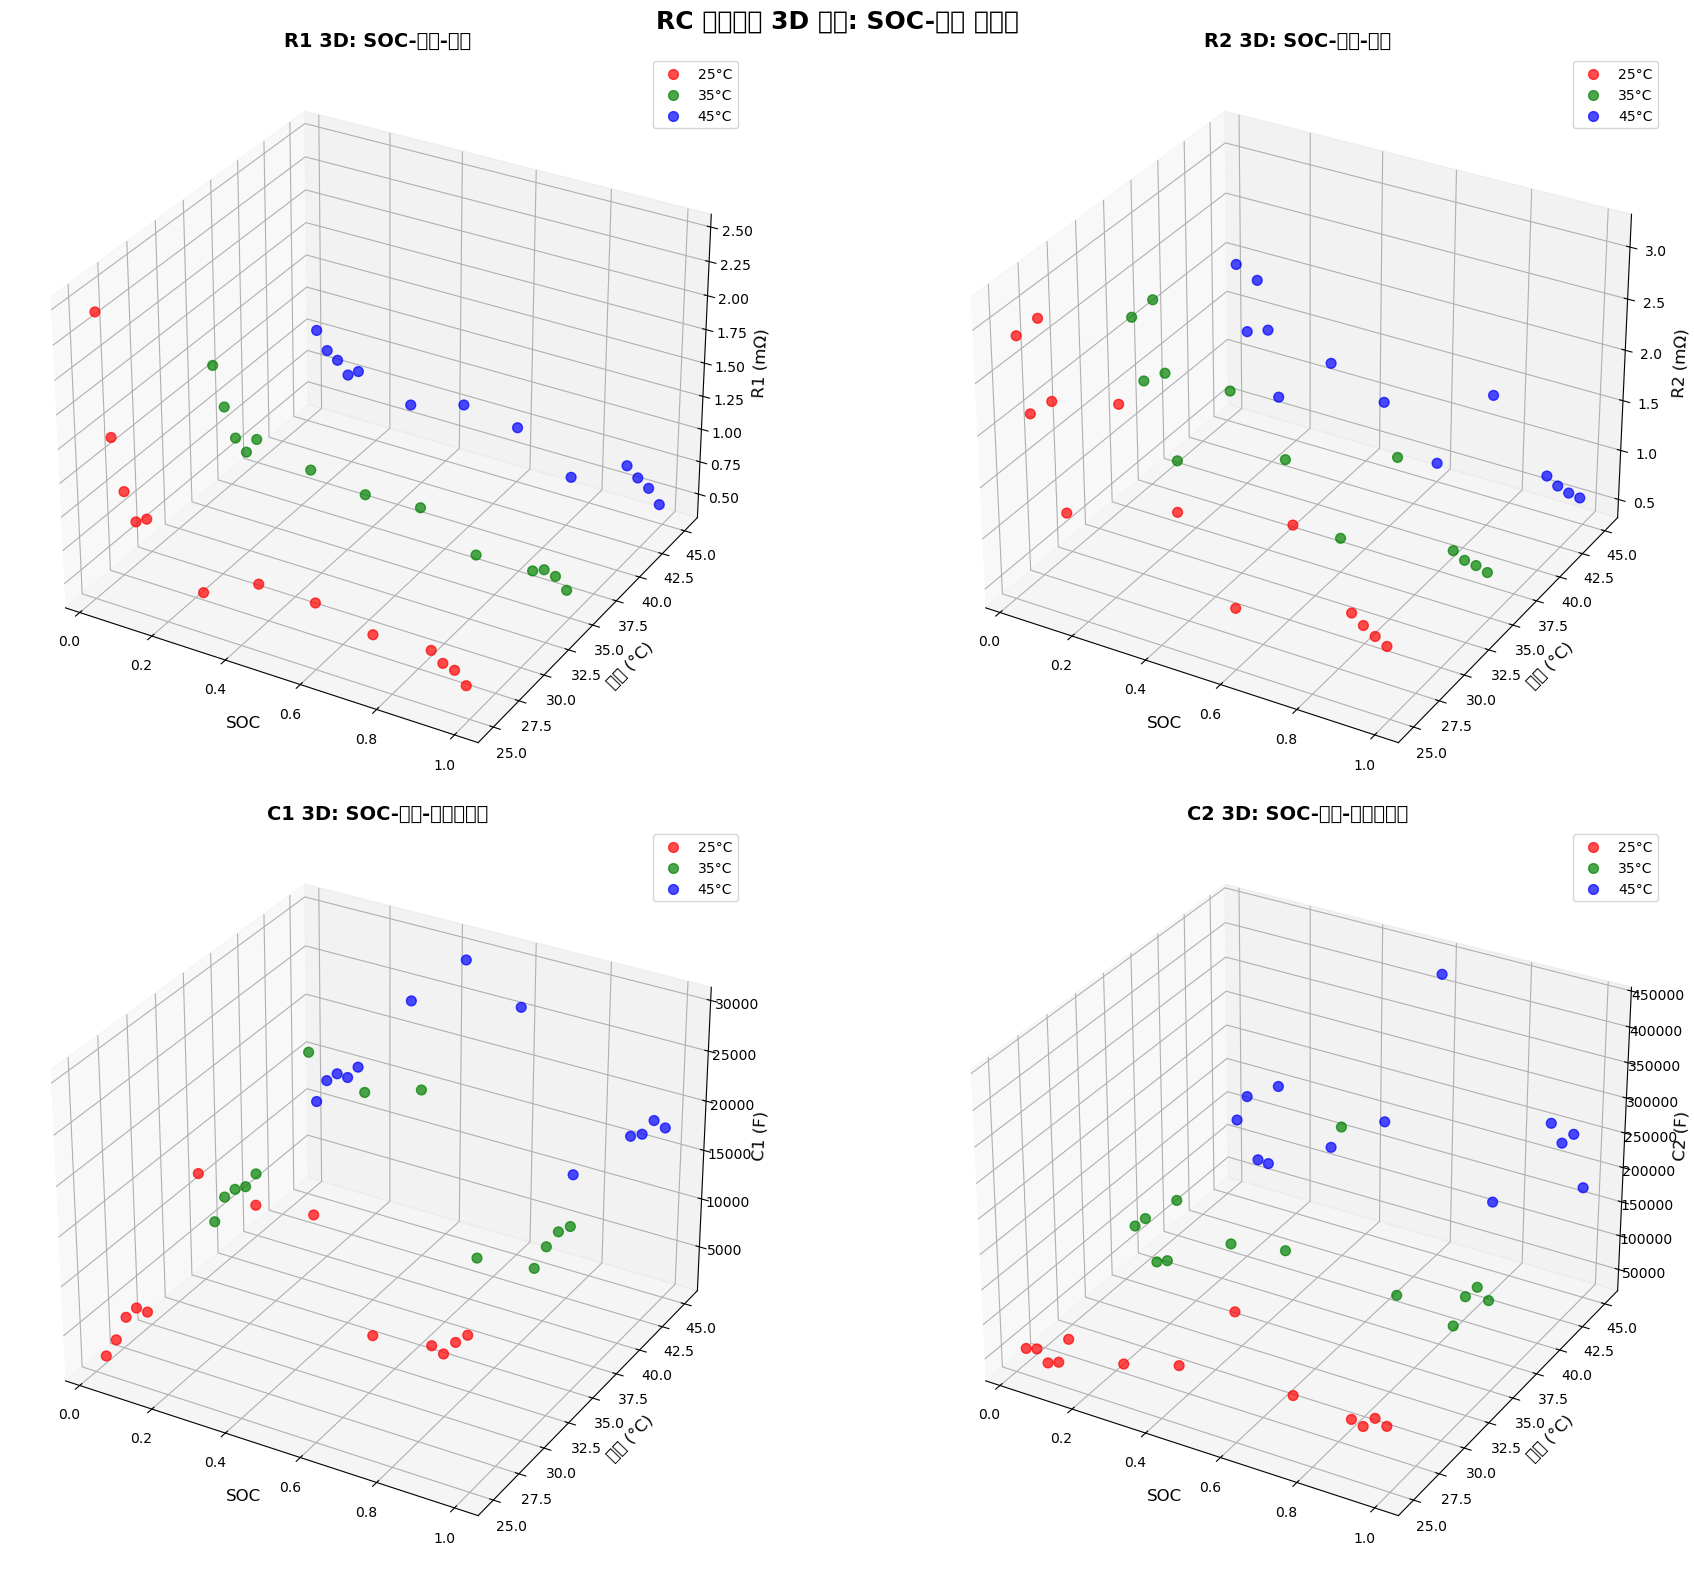


üìã RC ÌååÎùºÎØ∏ÌÑ∞ Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Î°†

üîç Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:

1. Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:
   ‚úì R1, R2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú ÏßÄÏàòÏ†Å Í∞êÏÜå (Arrhenius Í¥ÄÍ≥Ñ)
   ‚úì C1, C2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Ï¶ùÍ∞Ä (Ïù¥Ïò® Ïù¥ÎèôÎèÑ, ÌôïÏÇ∞ Í≥ÑÏàò Ï¶ùÍ∞Ä)
   ‚úì ÏãúÏÉÅÏàò: RÍ≥º CÏùò ÏÉÅÎåÄÏ†Å Î≥ÄÌôîÏú®Ïóê Îî∞Îùº Í≤∞Ï†ï

2. SOC ÏùòÏ°¥ÏÑ±:
   ‚úì Ï†ÄSOC: ÎÜíÏùÄ Ï†ÄÌï≠, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ï∫êÌå®ÏãúÌÑ¥Ïä§
   ‚úì Í≥†SOC: ÎÇÆÏùÄ Ï†ÄÌï≠, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùÄ Ï∫êÌå®ÏãúÌÑ¥Ïä§
   ‚úì ÎπÑÏÑ†ÌòïÏ†Å Í¥ÄÍ≥Ñ, ÌäπÌûà Í∑πÎã® SOC ÏòÅÏó≠ÏóêÏÑú Í∏âÍ≤©Ìïú Î≥ÄÌôî

3. ÌååÎùºÎØ∏ÌÑ∞ ÌÅ¨Í∏∞ Í¥ÄÍ≥Ñ:
   ‚úì R2 > R1: ÌôïÏÇ∞ Ï†ÄÌï≠Ïù¥ Ï†ÑÌïòÏ†ÑÎã¨ Ï†ÄÌï≠Î≥¥Îã§ ÌÅº
   ‚úì C2 >> C1: ÌôïÏÇ∞ Ï∫êÌå®ÏãúÌÑ¥Ïä§Í∞Ä Ïù¥Ï§ëÏ∏µ Ï∫êÌå®ÏãúÌÑ¥Ïä§Î≥¥Îã§ Ìõ®Ïî¨ ÌÅº
   ‚úì œÑ2 >> œÑ1: Îã§Ï§ë ÏãúÍ∞Ñ Ïä§ÏºÄÏùº Í±∞Îèô


‚ö° Ïã§Ïö©Ï†Å ÏùëÏö© ÏùòÎØ∏

1. Î∞∞ÌÑ∞Î¶¨ Í¥ÄÎ¶¨ ÏãúÏä§ÌÖú (BMS):
   ‚Ä¢ Ïò®ÎèÑÎ≥Ñ, SOCÎ≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Î£©ÏóÖ ÌÖåÏù¥Î∏î ÌïÑÏöî
   ‚Ä¢ ÎèôÏ†Å Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
   ‚Ä¢ Ï†ïÌôïÌïú SOC/SOH Ï∂îÏ†ïÏùÑ ÏúÑÌïú Ï†ÅÏùëÌòï 

In [106]:
# 4. 3D ÏãúÍ∞ÅÌôî: SOC-Ïò®ÎèÑ-ÌååÎùºÎØ∏ÌÑ∞ Í¥ÄÍ≥Ñ
print("\n" + "=" * 80)
print("üéØ 3D ÏãúÍ∞ÅÌôî: SOC-Ïò®ÎèÑ-ÌååÎùºÎØ∏ÌÑ∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
print("=" * 80)

# 3D ÌîåÎ°Ø Ï§ÄÎπÑ
fig = plt.figure(figsize=(20, 16))

# R1 3D ÌîåÎ°Ø
ax1 = fig.add_subplot(221, projection='3d')
for i, temp in enumerate(temps):
    soc_data = R1_dict_Bat[temp][:, 0]
    r1_data = R1_dict_Bat[temp][:, 1] * 1000
    temp_data = np.full_like(soc_data, temp)
    ax1.scatter(soc_data, temp_data, r1_data, c=colors[i], s=50, alpha=0.7, label=f'{temp}¬∞C')

ax1.set_xlabel('SOC', fontsize=12)
ax1.set_ylabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
ax1.set_zlabel('R1 (mŒ©)', fontsize=12)
ax1.set_title('R1 3D: SOC-Ïò®ÎèÑ-Ï†ÄÌï≠', fontsize=14, fontweight='bold')
ax1.legend()

# R2 3D ÌîåÎ°Ø
ax2 = fig.add_subplot(222, projection='3d')
for i, temp in enumerate(temps):
    soc_data = R2_dict_Bat[temp][:, 0]
    r2_data = R2_dict_Bat[temp][:, 1] * 1000
    temp_data = np.full_like(soc_data, temp)
    ax2.scatter(soc_data, temp_data, r2_data, c=colors[i], s=50, alpha=0.7, label=f'{temp}¬∞C')

ax2.set_xlabel('SOC', fontsize=12)
ax2.set_ylabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
ax2.set_zlabel('R2 (mŒ©)', fontsize=12)
ax2.set_title('R2 3D: SOC-Ïò®ÎèÑ-Ï†ÄÌï≠', fontsize=14, fontweight='bold')
ax2.legend()

# C1 3D ÌîåÎ°Ø
ax3 = fig.add_subplot(223, projection='3d')
for i, temp in enumerate(temps):
    soc_data = c1_dict_Bat[temp][:, 0]
    c1_data = c1_dict_Bat[temp][:, 1]
    temp_data = np.full_like(soc_data, temp)
    ax3.scatter(soc_data, temp_data, c1_data, c=colors[i], s=50, alpha=0.7, label=f'{temp}¬∞C')

ax3.set_xlabel('SOC', fontsize=12)
ax3.set_ylabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
ax3.set_zlabel('C1 (F)', fontsize=12)
ax3.set_title('C1 3D: SOC-Ïò®ÎèÑ-Ï∫êÌå®ÏãúÌÑ¥Ïä§', fontsize=14, fontweight='bold')
ax3.legend()

# C2 3D ÌîåÎ°Ø
ax4 = fig.add_subplot(224, projection='3d')
for i, temp in enumerate(temps):
    soc_data = c2_dict_Bat[temp][:, 0]
    c2_data = c2_dict_Bat[temp][:, 1]
    temp_data = np.full_like(soc_data, temp)
    ax4.scatter(soc_data, temp_data, c2_data, c=colors[i], s=50, alpha=0.7, label=f'{temp}¬∞C')

ax4.set_xlabel('SOC', fontsize=12)
ax4.set_ylabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
ax4.set_zlabel('C2 (F)', fontsize=12)
ax4.set_title('C2 3D: SOC-Ïò®ÎèÑ-Ï∫êÌå®ÏãúÌÑ¥Ïä§', fontsize=14, fontweight='bold')
ax4.legend()

plt.suptitle('RC ÌååÎùºÎØ∏ÌÑ∞ 3D Î∂ÑÏÑù: SOC-Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Ï¢ÖÌï© Í≤∞Î°† Î∞è Ïã§Ïö©Ï†Å ÏùòÎØ∏
print("\n" + "=" * 80)
print("üìã RC ÌååÎùºÎØ∏ÌÑ∞ Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Î°†")
print("=" * 80)

print("""
üîç Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:

1. Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:
   ‚úì R1, R2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú ÏßÄÏàòÏ†Å Í∞êÏÜå (Arrhenius Í¥ÄÍ≥Ñ)
   ‚úì C1, C2: Ïò®ÎèÑ ÏÉÅÏäπ Ïãú Ï¶ùÍ∞Ä (Ïù¥Ïò® Ïù¥ÎèôÎèÑ, ÌôïÏÇ∞ Í≥ÑÏàò Ï¶ùÍ∞Ä)
   ‚úì ÏãúÏÉÅÏàò: RÍ≥º CÏùò ÏÉÅÎåÄÏ†Å Î≥ÄÌôîÏú®Ïóê Îî∞Îùº Í≤∞Ï†ï

2. SOC ÏùòÏ°¥ÏÑ±:
   ‚úì Ï†ÄSOC: ÎÜíÏùÄ Ï†ÄÌï≠, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ï∫êÌå®ÏãúÌÑ¥Ïä§
   ‚úì Í≥†SOC: ÎÇÆÏùÄ Ï†ÄÌï≠, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùÄ Ï∫êÌå®ÏãúÌÑ¥Ïä§
   ‚úì ÎπÑÏÑ†ÌòïÏ†Å Í¥ÄÍ≥Ñ, ÌäπÌûà Í∑πÎã® SOC ÏòÅÏó≠ÏóêÏÑú Í∏âÍ≤©Ìïú Î≥ÄÌôî

3. ÌååÎùºÎØ∏ÌÑ∞ ÌÅ¨Í∏∞ Í¥ÄÍ≥Ñ:
   ‚úì R2 > R1: ÌôïÏÇ∞ Ï†ÄÌï≠Ïù¥ Ï†ÑÌïòÏ†ÑÎã¨ Ï†ÄÌï≠Î≥¥Îã§ ÌÅº
   ‚úì C2 >> C1: ÌôïÏÇ∞ Ï∫êÌå®ÏãúÌÑ¥Ïä§Í∞Ä Ïù¥Ï§ëÏ∏µ Ï∫êÌå®ÏãúÌÑ¥Ïä§Î≥¥Îã§ Ìõ®Ïî¨ ÌÅº
   ‚úì œÑ2 >> œÑ1: Îã§Ï§ë ÏãúÍ∞Ñ Ïä§ÏºÄÏùº Í±∞Îèô
""")

# Ïã§Ïö©Ï†Å ÏùòÎØ∏
print("\n" + "=" * 60)
print("‚ö° Ïã§Ïö©Ï†Å ÏùëÏö© ÏùòÎØ∏")
print("=" * 60)

print("""
1. Î∞∞ÌÑ∞Î¶¨ Í¥ÄÎ¶¨ ÏãúÏä§ÌÖú (BMS):
   ‚Ä¢ Ïò®ÎèÑÎ≥Ñ, SOCÎ≥Ñ ÌååÎùºÎØ∏ÌÑ∞ Î£©ÏóÖ ÌÖåÏù¥Î∏î ÌïÑÏöî
   ‚Ä¢ ÎèôÏ†Å Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
   ‚Ä¢ Ï†ïÌôïÌïú SOC/SOH Ï∂îÏ†ïÏùÑ ÏúÑÌïú Ï†ÅÏùëÌòï ÌïÑÌÑ∞ÎßÅ

2. Ïó¥ Í¥ÄÎ¶¨ Ï†ÑÎûµ:
   ‚Ä¢ Í≥†Ïò®: Ï†ÄÌï≠‚Üì, ÏÑ±Îä•‚Üë, ÌïòÏßÄÎßå ÏàòÎ™Ö Ïö∞Î†§
   ‚Ä¢ Ï†ÄÏò®: Ï†ÄÌï≠‚Üë, ÏÑ±Îä•‚Üì, Ï∫êÌå®ÏãúÌÑ¥Ïä§‚Üì
   ‚Ä¢ ÏµúÏ†Å ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ ÏÑ§Ï†ï

3. Ï∂©Î∞©Ï†Ñ Ï†úÏñ¥:
   ‚Ä¢ Í≥†Ïú® Ï∂©Î∞©Ï†Ñ Ïãú ÏãúÏÉÅÏàò Í≥†Î†§
   ‚Ä¢ SOCÎ≥Ñ ÏµúÏ†Å Ï∂©Ï†Ñ ÌîÑÎ°úÌååÏùº
   ‚Ä¢ Ï†ÑÏïï Î¶¨Ìîå ÏµúÏÜåÌôî Ï†ÑÎûµ

4. Î∞∞ÌÑ∞Î¶¨ Î™®Îç∏ÎßÅ:
   ‚Ä¢ Ï†ïÌôïÌïú ÎèôÏ†Å ÏùëÎãµ ÏòàÏ∏°
   ‚Ä¢ Îã§Ï§ë ÏãúÍ∞Ñ Ïä§ÏºÄÏùº ÏãúÎÆ¨Î†àÏù¥ÏÖò
   ‚Ä¢ Ïò®ÎèÑ-SOC 2D Î£©ÏóÖ ÌÖåÏù¥Î∏î Íµ¨ÌòÑ
""")

# Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ ÌÖåÏù¥Î∏î
print("\n" + "=" * 60)
print("üìä ÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏöîÏïΩ")
print("=" * 60)

print(f"{'ÌååÎùºÎØ∏ÌÑ∞':<8} {'25¬∞C Î≤îÏúÑ':<20} {'35¬∞C Î≤îÏúÑ':<20} {'45¬∞C Î≤îÏúÑ':<20}")
print("-" * 70)

for param_name, param_dict in [('R1 (mŒ©)', R1_dict_Bat), ('R2 (mŒ©)', R2_dict_Bat)]:
    ranges = []
    for temp in temps:
        vals = param_dict[temp][:, 1] * 1000
        ranges.append(f"{np.min(vals):.1f}~{np.max(vals):.1f}")
    print(f"{param_name:<8} {ranges[0]:<20} {ranges[1]:<20} {ranges[2]:<20}")

for param_name, param_dict in [('C1 (F)', c1_dict_Bat), ('C2 (F)', c2_dict_Bat)]:
    ranges = []
    for temp in temps:
        vals = param_dict[temp][:, 1]
        ranges.append(f"{np.min(vals):.0f}~{np.max(vals):.0f}")
    print(f"{param_name:<8} {ranges[0]:<20} {ranges[1]:<20} {ranges[2]:<20}")

print("\n" + "=" * 60)
print("‚úÖ Î∂ÑÏÑù ÏôÑÎ£å: RC ÌååÎùºÎØ∏ÌÑ∞Ïùò SOC Î∞è Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±")
print("=" * 60)

print("""
Ïù¥ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Îã§ÏùåÏùÑ ÌôïÏù∏ÌñàÏäµÎãàÎã§:
‚Ä¢ Î™®Îì† RC ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Ïò®ÎèÑÏôÄ SOCÏóê Í∞ïÌïú ÏùòÏ°¥ÏÑ±ÏùÑ Î≥¥ÏûÑ
‚Ä¢ Ï†ÄÌï≠Í≥º Ï∫êÌå®ÏãúÌÑ¥Ïä§Îäî Ïò®ÎèÑÏóê ÎåÄÌï¥ Î∞òÎåÄ Í≤ΩÌñ•
‚Ä¢ ÏãúÏÉÅÏàòÎäî Îëê Ìö®Í≥ºÏùò Ï°∞Ìï©ÏúºÎ°ú Î≥µÌï©Ï†Å Í±∞Îèô
‚Ä¢ Ï†ïÌôïÌïú Î∞∞ÌÑ∞Î¶¨ Î™®Îç∏ÎßÅÏùÑ ÏúÑÌï¥ÏÑúÎäî 2D ÌååÎùºÎØ∏ÌÑ∞ Îßµ ÌïÑÏàò
""")

# üîã ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ (Super Capacitor) ÌäπÏÑ± Î∂ÑÏÑù

ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞Ïùò Îì±Í∞ÄÌöåÎ°ú ÌååÎùºÎØ∏ÌÑ∞ (R0, R1, R2, C1, C2) ÌäπÏÑ±ÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.

In [107]:
# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è Í∏∞Î≥∏ Î∂ÑÏÑù

print("=" * 80)
print("üîã ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ (Super Capacitor) Ï¢ÖÌï© ÌäπÏÑ± Î∂ÑÏÑù")
print("=" * 80)

# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("üìä ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞:")
scap_data_available = []

if 'R1_table_scap' in locals():
    print(f"‚úì R1 Îç∞Ïù¥ÌÑ∞: {R1_table_scap.shape}")
    scap_data_available.append('R1')
    
if 'R2_table_scap' in locals():
    print(f"‚úì R2 Îç∞Ïù¥ÌÑ∞: {R2_table_scap.shape}")
    scap_data_available.append('R2')
    
if 'C1_table_scap_paper' in locals():
    print(f"‚úì C1 Îç∞Ïù¥ÌÑ∞: {C1_table_scap_paper.shape}")
    scap_data_available.append('C1')
    
if 'C2_table_scap_paper' in locals():
    print(f"‚úì C2 Îç∞Ïù¥ÌÑ∞: {C2_table_scap_paper.shape}")
    scap_data_available.append('C2')

# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R0 Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ (Ïù¥ÎØ∏ Î∂ÑÏÑùÎêú Í≤ΩÏö∞)
if 'all_supercap_r0' in locals():
    print(f"‚úì R0 Îç∞Ïù¥ÌÑ∞: {len(all_supercap_r0)} Í∞ú Ïò®ÎèÑ")
    scap_data_available.append('R0')

print(f"\nÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞: {', '.join(scap_data_available)}")

# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ ÎπÑÍµêÎ•º ÏúÑÌïú Í∏∞Î≥∏ Ï†ïÎ≥¥
print("\n" + "=" * 60)
print("üîç ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ Í∏∞Î≥∏ ÌäπÏÑ± ÎπÑÍµê")
print("=" * 60)

print("""
ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌäπÏÑ±:
‚Ä¢ ÎÜíÏùÄ Ï†ÑÎ†•Î∞ÄÎèÑ, ÎÇÆÏùÄ ÏóêÎÑàÏßÄÎ∞ÄÎèÑ
‚Ä¢ Îß§Ïö∞ Îπ†Î•∏ Ï∂©Î∞©Ï†Ñ (Ï¥à Îã®ÏúÑ)
‚Ä¢ Í∏¥ ÏàòÎ™Ö (ÏàòÏã≠Îßå ÏÇ¨Ïù¥ÌÅ¥)
‚Ä¢ ÎÑìÏùÄ ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ
‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïôÏ†Å Ïù¥Ï§ëÏ∏µ ÏóêÎÑàÏßÄ Ï†ÄÏû•

Î∞∞ÌÑ∞Î¶¨ ÌäπÏÑ±:
‚Ä¢ ÎÜíÏùÄ ÏóêÎÑàÏßÄÎ∞ÄÎèÑ, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ï†ÑÎ†•Î∞ÄÎèÑ
‚Ä¢ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎäêÎ¶∞ Ï∂©Î∞©Ï†Ñ (Î∂Ñ~ÏãúÍ∞Ñ Îã®ÏúÑ)
‚Ä¢ Ï†úÌïúÎêú ÏàòÎ™Ö (ÏàòÏ≤ú ÏÇ¨Ïù¥ÌÅ¥)
‚Ä¢ Ï†úÌïúÎêú ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ
‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïô Î∞òÏùë Í∏∞Î∞ò ÏóêÎÑàÏßÄ Ï†ÄÏû•
""")

# Ïù¥ÎØ∏ Î∂ÑÏÑùÎêú Í≤∞Í≥ºÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
analysis_results = {}
if 'result_R1_scap' in locals():
    analysis_results['R1'] = result_R1_scap
    print("‚úì R1 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•")
    
if 'result_R2_scap' in locals():
    analysis_results['R2'] = result_R2_scap
    print("‚úì R2 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•")
    
if 'results_c1_scap' in locals():
    analysis_results['C1'] = results_c1_scap
    print("‚úì C1 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•")
    
if 'results_c2_scap' in locals():
    analysis_results['C2'] = results_c2_scap
    print("‚úì C2 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•")

if analysis_results:
    print(f"\nÏù¥ÎØ∏ Î∂ÑÏÑùÎêú ÌååÎùºÎØ∏ÌÑ∞: {', '.join(analysis_results.keys())}")
else:
    print("\nÎ∂ÑÏÑù Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§. ÏÉàÎ°úÏö¥ Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§.")

print("\n" + "=" * 60)
print("üìà ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÌäπÏÑ± Í∞úÏöî")
print("=" * 60)

üîã ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ (Super Capacitor) Ï¢ÖÌï© ÌäπÏÑ± Î∂ÑÏÑù
üìä ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞:
‚úì R1 Îç∞Ïù¥ÌÑ∞: (10, 5)
‚úì R2 Îç∞Ïù¥ÌÑ∞: (10, 5)
‚úì C1 Îç∞Ïù¥ÌÑ∞: (10, 5)
‚úì C2 Îç∞Ïù¥ÌÑ∞: (10, 5)
‚úì R0 Îç∞Ïù¥ÌÑ∞: 36 Í∞ú Ïò®ÎèÑ

ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞: R1, R2, C1, C2, R0

üîç ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ Í∏∞Î≥∏ ÌäπÏÑ± ÎπÑÍµê

ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌäπÏÑ±:
‚Ä¢ ÎÜíÏùÄ Ï†ÑÎ†•Î∞ÄÎèÑ, ÎÇÆÏùÄ ÏóêÎÑàÏßÄÎ∞ÄÎèÑ
‚Ä¢ Îß§Ïö∞ Îπ†Î•∏ Ï∂©Î∞©Ï†Ñ (Ï¥à Îã®ÏúÑ)
‚Ä¢ Í∏¥ ÏàòÎ™Ö (ÏàòÏã≠Îßå ÏÇ¨Ïù¥ÌÅ¥)
‚Ä¢ ÎÑìÏùÄ ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ
‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïôÏ†Å Ïù¥Ï§ëÏ∏µ ÏóêÎÑàÏßÄ Ï†ÄÏû•

Î∞∞ÌÑ∞Î¶¨ ÌäπÏÑ±:
‚Ä¢ ÎÜíÏùÄ ÏóêÎÑàÏßÄÎ∞ÄÎèÑ, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ï†ÑÎ†•Î∞ÄÎèÑ
‚Ä¢ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎäêÎ¶∞ Ï∂©Î∞©Ï†Ñ (Î∂Ñ~ÏãúÍ∞Ñ Îã®ÏúÑ)
‚Ä¢ Ï†úÌïúÎêú ÏàòÎ™Ö (ÏàòÏ≤ú ÏÇ¨Ïù¥ÌÅ¥)
‚Ä¢ Ï†úÌïúÎêú ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ
‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïô Î∞òÏùë Í∏∞Î∞ò ÏóêÎÑàÏßÄ Ï†ÄÏû•

‚úì R1 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•
‚úì R2 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•
‚úì C1 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•
‚úì C2 Î∂ÑÏÑù Í≤∞Í≥º ÏÇ¨Ïö© Í∞ÄÎä•

Ï


üî¥ R0 (Ïò§ÎØπ Ï†ÄÌï≠) Î∂ÑÏÑù:
Ïò®ÎèÑ Î≤îÏúÑ: [-20.0, 0.0, 25.0, 45.0]
  -20.0: ÌèâÍ∑† 0.001 mŒ© (ÌëúÏ§ÄÌé∏Ï∞®: 0.000 mŒ©)
  0.0: ÌèâÍ∑† 0.001 mŒ© (ÌëúÏ§ÄÌé∏Ï∞®: 0.000 mŒ©)
  25.0: ÌèâÍ∑† 0.001 mŒ© (ÌëúÏ§ÄÌé∏Ï∞®: 0.000 mŒ©)
  45.0: ÌèâÍ∑† 0.001 mŒ© (ÌëúÏ§ÄÌé∏Ï∞®: 0.000 mŒ©)

üîµ RC ÌååÎùºÎØ∏ÌÑ∞ (R1, R2, C1, C2) Î∂ÑÏÑù:
R1 ÌÖåÏù¥Î∏î ÌòïÌÉú: (10, 5)
R1 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
[[  0.     -20.       0.      25.      45.    ]
 [  0.2      0.4561   0.2804   2.072    0.6721]
 [  0.3      0.4159   0.1807   1.449    0.5016]]
R2 ÌÖåÏù¥Î∏î ÌòïÌÉú: (10, 5)
R2 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
[[ 0.000e+00 -2.000e+01  0.000e+00  2.500e+01  4.500e+01]
 [ 2.000e-01  1.030e-04  7.409e-05  8.607e-05  7.579e-05]
 [ 3.000e-01  1.045e-04  7.980e-05  8.792e-05  7.387e-05]]
C1 ÌÖåÏù¥Î∏î ÌòïÌÉú: (10, 5)
C1 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
[[ 0.0000e+00 -2.0000e+01  0.0000e+00  2.5000e+01  4.5000e+01]
 [ 2.0000e-01  5.8582e+04  4.7992e+04  2.4378e+04  3.1222e+04]
 [ 3.0000e-01  5.9159e+04  4.8847e+04  2.5422e+04  3.2466e+04]]
C2 ÌÖåÏù¥Î∏î Ìòï

C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\129947992.py:104: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\129947992.py:104: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\129947992.py:104: UserWarning: Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\129947992.py:104: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\129947992.py:104: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dhkang\AppData\Local\Temp\ipykernel_19068\129947992.py:104: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing

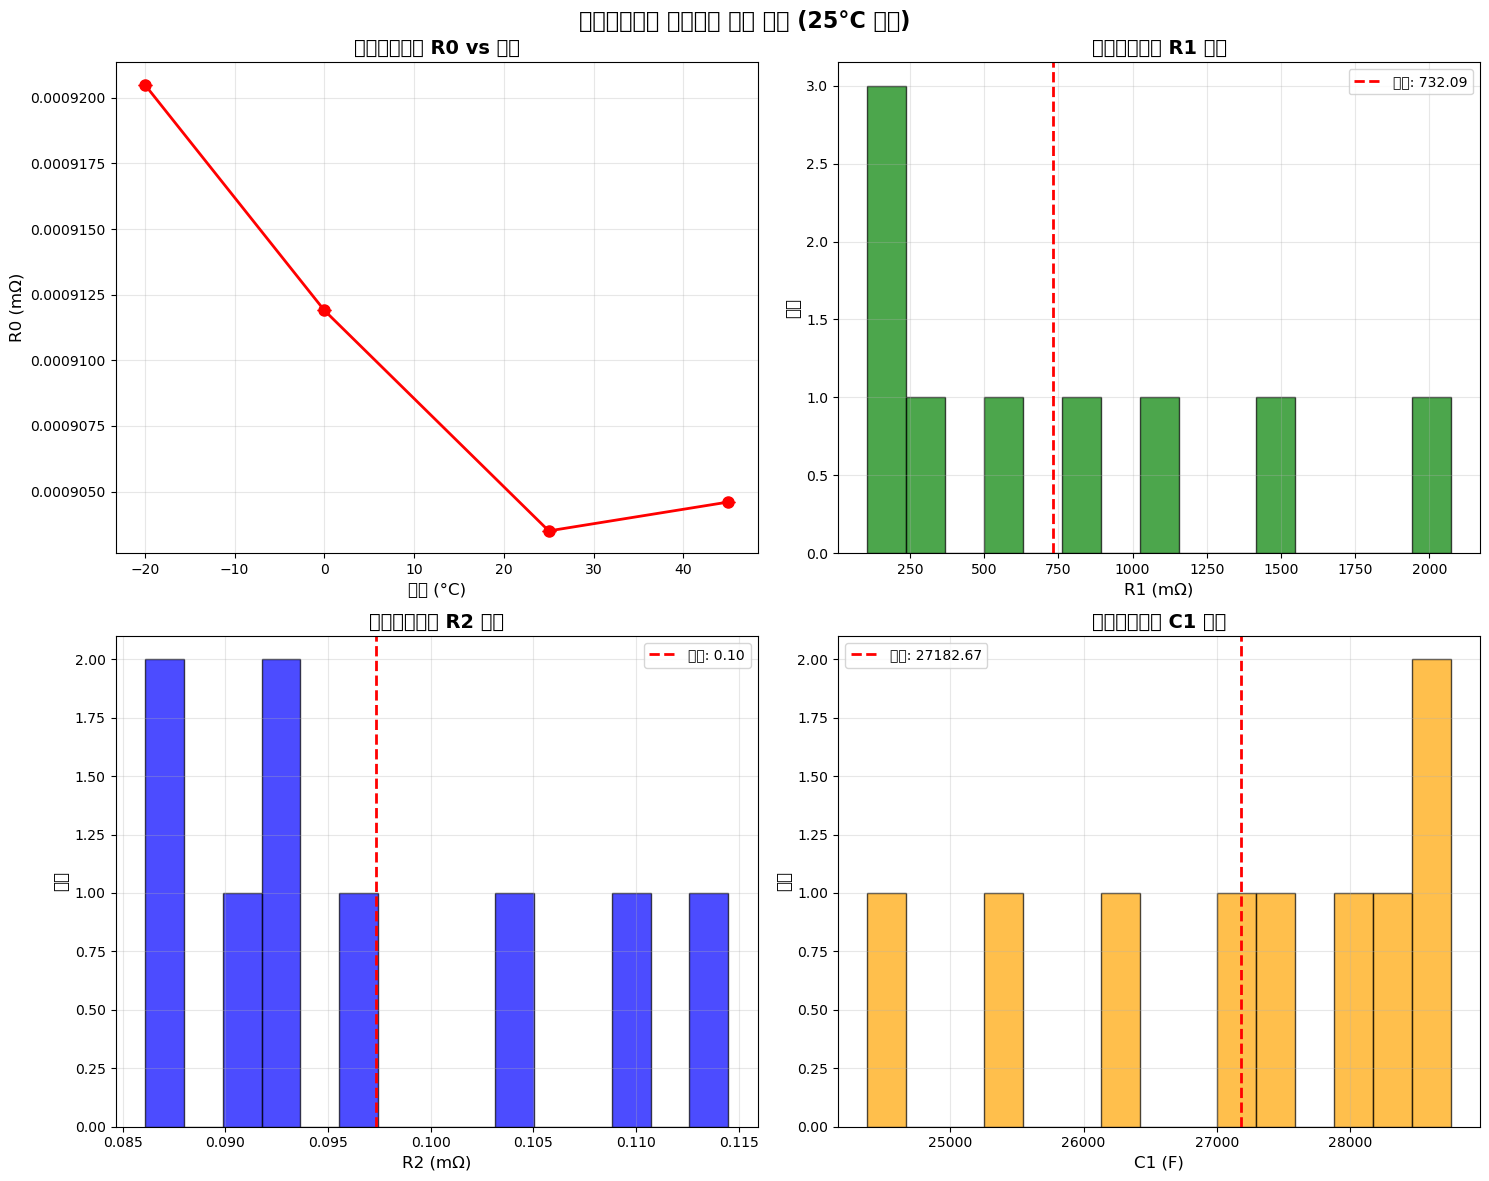


üìä ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÌÜµÍ≥Ñ ÏöîÏïΩ (25¬∞C Í∏∞Ï§Ä)
ÌååÎùºÎØ∏ÌÑ∞     ÌèâÍ∑†           ÌëúÏ§ÄÌé∏Ï∞®         ÏµúÏÜåÍ∞í          ÏµúÎåÄÍ∞í          Îã®ÏúÑ      
----------------------------------------------------------------------


ValueError: zero-dimensional arrays cannot be concatenated

In [109]:
# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù

# 1. ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R0 ÌäπÏÑ± Î∂ÑÏÑù (Ïù¥ÎØ∏ Î∂ÑÏÑùÎêú Îç∞Ïù¥ÌÑ∞ ÌôúÏö©)
if 'all_supercap_r0' in locals() and 'supercap_temps' in locals():
    print("\nüî¥ R0 (Ïò§ÎØπ Ï†ÄÌï≠) Î∂ÑÏÑù:")
    print(f"Ïò®ÎèÑ Î≤îÏúÑ: {supercap_temps}")
    
    for i, temp in enumerate(supercap_temps):
        if i < len(all_supercap_r0):
            r0_avg = np.mean(all_supercap_r0[i])
            r0_std = np.std(all_supercap_r0[i])
            print(f"  {temp}: ÌèâÍ∑† {r0_avg:.3f} mŒ© (ÌëúÏ§ÄÌé∏Ï∞®: {r0_std:.3f} mŒ©)")

# 2. ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ RC ÌååÎùºÎØ∏ÌÑ∞ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
print("\nüîµ RC ÌååÎùºÎØ∏ÌÑ∞ (R1, R2, C1, C2) Î∂ÑÏÑù:")

# Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
scap_rc_data = {}

if 'R1_table_scap' in locals():
    print(f"R1 ÌÖåÏù¥Î∏î ÌòïÌÉú: {R1_table_scap.shape}")
    print(f"R1 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:\n{R1_table_scap[:3]}")
    
    # Ïò®ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ï≤´ Î≤àÏß∏ ÌñâÏùÄ Ìó§ÎçîÎ°ú Í∞ÄÏ†ï)
    # Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞: [SOC, -20¬∞C, 0¬∞C, 25¬∞C, 45¬∞C]
    scap_temps_rc = [-20, 0, 25, 45]  # R1 ÌÖåÏù¥Î∏îÏóêÏÑú ÌôïÏù∏Îêú Ïò®ÎèÑ
    
    # SOCÏôÄ 25¬∞C Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú (3Î≤àÏß∏ Ïó¥Ïù¥ 25¬∞C)
    scap_rc_data['R1'] = R1_table_scap[1:, [0, 3]]  # SOC, 25¬∞C Í∞í

if 'R2_table_scap' in locals():
    print(f"R2 ÌÖåÏù¥Î∏î ÌòïÌÉú: {R2_table_scap.shape}")
    print(f"R2 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:\n{R2_table_scap[:3]}")
    
    # SOCÏôÄ 25¬∞C Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    scap_rc_data['R2'] = R2_table_scap[1:, [0, 3]]  # SOC, 25¬∞C Í∞í

if 'C1_table_scap_paper' in locals():
    print(f"C1 ÌÖåÏù¥Î∏î ÌòïÌÉú: {C1_table_scap_paper.shape}")
    print(f"C1 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:\n{C1_table_scap_paper[:3]}")
    
    # SOCÏôÄ 25¬∞C Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    scap_rc_data['C1'] = C1_table_scap_paper[1:, [0, 3]]  # SOC, 25¬∞C Í∞í

if 'C2_table_scap_paper' in locals():
    print(f"C2 ÌÖåÏù¥Î∏î ÌòïÌÉú: {C2_table_scap_paper.shape}")
    print(f"C2 Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:\n{C2_table_scap_paper[:3]}")
    
    # SOCÏôÄ 25¬∞C Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    scap_rc_data['C2'] = C2_table_scap_paper[1:, [0, 3]]  # SOC, 25¬∞C Í∞í

# 3. ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌäπÏÑ± ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÌäπÏÑ± Î∂ÑÏÑù (25¬∞C Í∏∞Ï§Ä)', fontsize=16, fontweight='bold')

# R0 Ïò®ÎèÑ ÏùòÏ°¥ÏÑ± (Í∏∏Ïù¥ ÌôïÏù∏ ÌõÑ ÌîåÎ°Ø)
if 'all_supercap_r0' in locals() and 'supercap_temps' in locals():
    # Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞
    min_len = min(len(all_supercap_r0), len(supercap_temps))
    r0_means = [np.mean(all_supercap_r0[i]) for i in range(min_len)]
    r0_stds = [np.std(all_supercap_r0[i]) for i in range(min_len)]
    temps_plot = supercap_temps[:min_len]
    
    axes[0, 0].errorbar(temps_plot, r0_means, yerr=r0_stds, 
                       fmt='ro-', linewidth=2, markersize=8, capsize=5)
    axes[0, 0].set_xlabel('Ïò®ÎèÑ (¬∞C)', fontsize=12)
    axes[0, 0].set_ylabel('R0 (mŒ©)', fontsize=12)
    axes[0, 0].set_title('ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R0 vs Ïò®ÎèÑ', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

# RC ÌååÎùºÎØ∏ÌÑ∞ Î∂ÑÌè¨ Î∂ÑÏÑù
param_colors = {'R1': 'green', 'R2': 'blue', 'C1': 'orange', 'C2': 'purple'}
param_units = {'R1': 'mŒ©', 'R2': 'mŒ©', 'C1': 'F', 'C2': 'F'}

plot_positions = [(0,1), (1,0), (1,1)]
plot_idx = 0

for param_name, data in scap_rc_data.items():
    if plot_idx < 3:  # 3Í∞ú ÏÑúÎ∏åÌîåÎ°ØÎßå ÏÇ¨Ïö©
        row, col = plot_positions[plot_idx]
        
        # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
        if param_name in ['R1', 'R2']:
            param_values = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
        else:
            param_values = data[:, 1]
            
        axes[row, col].hist(param_values, bins=15, alpha=0.7, 
                           color=param_colors[param_name], edgecolor='black')
        axes[row, col].set_xlabel(f'{param_name} ({param_units[param_name]})', fontsize=12)
        axes[row, col].set_ylabel('ÎπàÎèÑ', fontsize=12)
        axes[row, col].set_title(f'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ {param_name} Î∂ÑÌè¨', fontsize=14, fontweight='bold')
        axes[row, col].grid(True, alpha=0.3)
        
        # ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
        mean_val = np.mean(param_values)
        std_val = np.std(param_values)
        axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                              label=f'ÌèâÍ∑†: {mean_val:.2f}')
        axes[row, col].legend()
        
        plot_idx += 1

plt.tight_layout()
plt.show()

# 4. ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÌÜµÍ≥Ñ ÏöîÏïΩ
print("\n" + "=" * 60)
print("üìä ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÌÜµÍ≥Ñ ÏöîÏïΩ (25¬∞C Í∏∞Ï§Ä)")
print("=" * 60)

print(f"{'ÌååÎùºÎØ∏ÌÑ∞':<8} {'ÌèâÍ∑†':<12} {'ÌëúÏ§ÄÌé∏Ï∞®':<12} {'ÏµúÏÜåÍ∞í':<12} {'ÏµúÎåÄÍ∞í':<12} {'Îã®ÏúÑ':<8}")
print("-" * 70)

# R0 ÌÜµÍ≥Ñ (Ïò®ÎèÑÎ≥Ñ ÌèâÍ∑†)
if 'all_supercap_r0' in locals():
    all_r0_values = np.concatenate(all_supercap_r0)
    r0_mean = np.mean(all_r0_values)
    r0_std = np.std(all_r0_values)
    r0_min = np.min(all_r0_values)
    r0_max = np.max(all_r0_values)
    print(f"{'R0':<8} {r0_mean:<12.3f} {r0_std:<12.3f} {r0_min:<12.3f} {r0_max:<12.3f} {'mŒ©':<8}")

# RC ÌååÎùºÎØ∏ÌÑ∞ ÌÜµÍ≥Ñ
for param_name, data in scap_rc_data.items():
    if param_name in ['R1', 'R2']:
        values = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
        unit = 'mŒ©'
    else:
        values = data[:, 1]
        unit = 'F'
    
    mean_val = np.mean(values)
    std_val = np.std(values)
    min_val = np.min(values)
    max_val = np.max(values)
    
    print(f"{param_name:<8} {mean_val:<12.2f} {std_val:<12.2f} {min_val:<12.2f} {max_val:<12.2f} {unit:<8}")

print("\nÌï¥ÏÑù:")
print("‚Ä¢ R0: Îß§Ïö∞ ÎÇÆÏùÄ ÎÇ¥Î∂Ä Ï†ÄÌï≠ (Í≥†Ï†ÑÎ†• ÌäπÏÑ±)")
print("‚Ä¢ R1, R2: Î∞∞ÌÑ∞Î¶¨ ÎåÄÎπÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Î∂ÑÍ∑π Ï†ÄÌï≠")
print("‚Ä¢ C1, C2: Îß§Ïö∞ ÎÜíÏùÄ Ï∫êÌå®ÏãúÌÑ¥Ïä§ (ÏóêÎÑàÏßÄ Ï†ÄÏû• Îä•Î†•)")

# SOC ÏùòÏ°¥ÏÑ± Î∂ÑÏÑù
print("\n" + "=" * 60)
print("üìà ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ SOC ÏùòÏ°¥ÏÑ± Î∂ÑÏÑù")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ vs SOC (25¬∞C)', fontsize=16, fontweight='bold')

plot_positions = [(0,0), (0,1), (1,0), (1,1)]
for i, (param_name, data) in enumerate(scap_rc_data.items()):
    if i < 4:
        row, col = plot_positions[i]
        
        soc_values = data[:, 0]
        if param_name in ['R1', 'R2']:
            param_values = data[:, 1] * 1000  # mŒ© Î≥ÄÌôò
            ylabel = f'{param_name} (mŒ©)'
        else:
            param_values = data[:, 1]
            ylabel = f'{param_name} (F)'
        
        axes[row, col].scatter(soc_values, param_values, 
                              c=param_colors[param_name], s=50, alpha=0.7)
        axes[row, col].plot(soc_values, param_values, 
                           color=param_colors[param_name], alpha=0.5, linewidth=2)
        axes[row, col].set_xlabel('SOC', fontsize=12)
        axes[row, col].set_ylabel(ylabel, fontsize=12)
        axes[row, col].set_title(f'{param_name} vs SOC', fontsize=14, fontweight='bold')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


‚öñÔ∏è ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ Ï¢ÖÌï© ÎπÑÍµê


ValueError: zero-dimensional arrays cannot be concatenated

c:\Users\dhkang\.ansys_python_venvs\PyAEDT\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\dhkang\.ansys_python_venvs\PyAEDT\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\dhkang\.ansys_python_venvs\PyAEDT\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\dhkang\.ansys_python_venvs\PyAEDT\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\dhkang\.ansys_python_venvs\PyAEDT\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

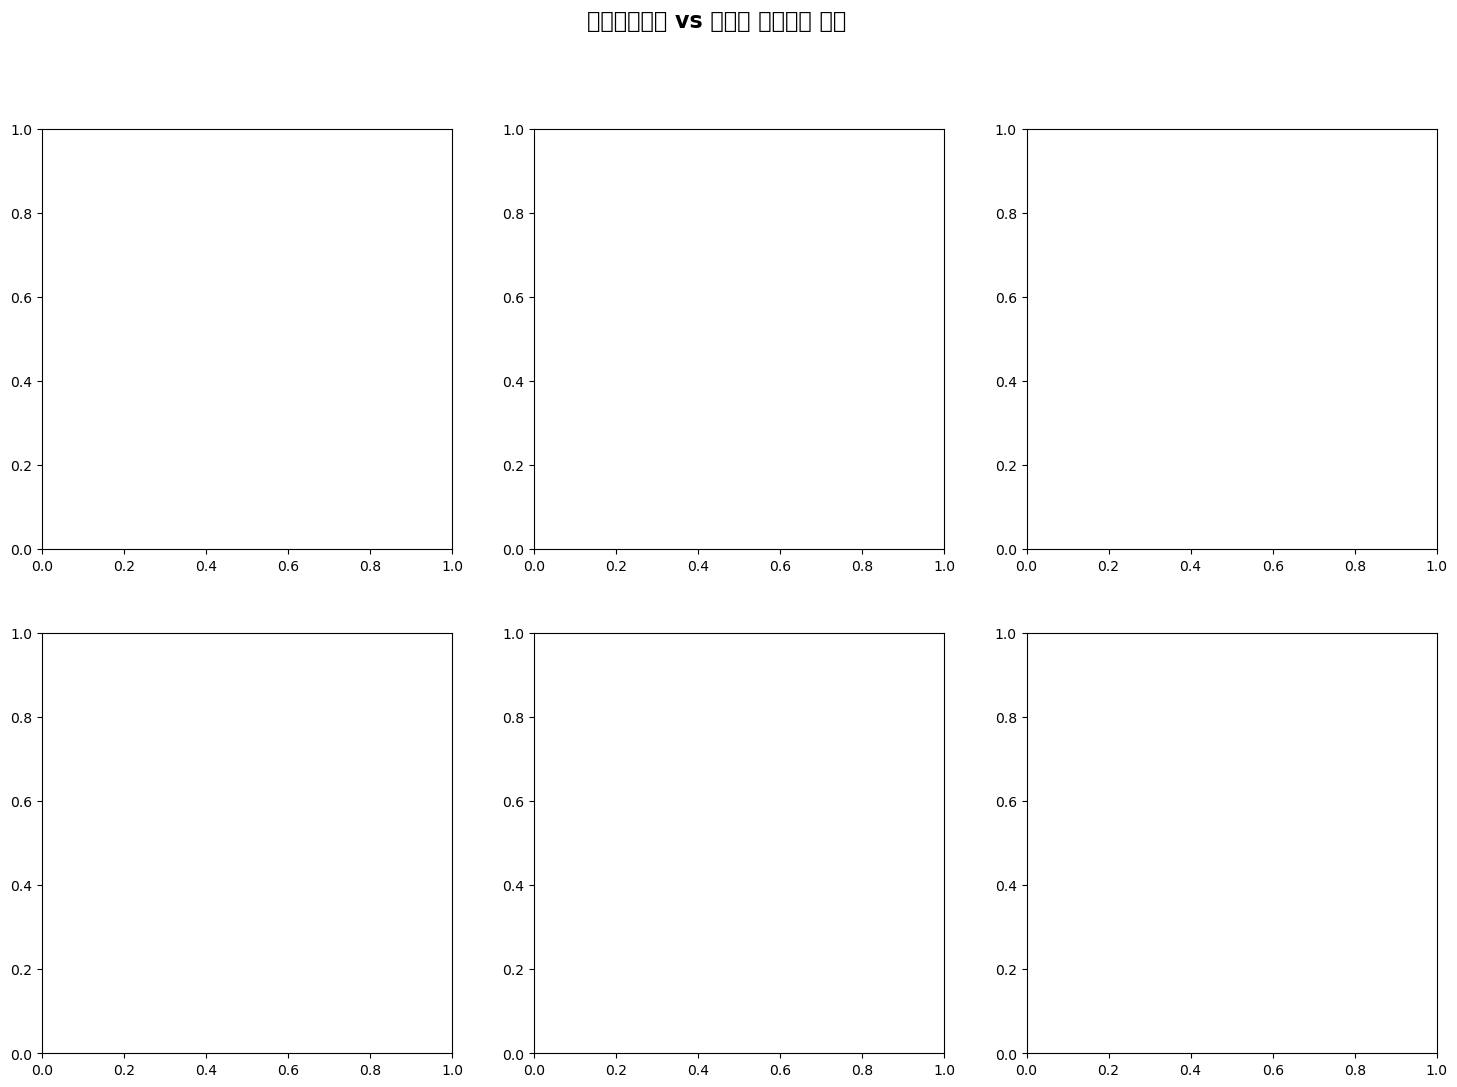

In [110]:
# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ ÎπÑÍµê Î∂ÑÏÑù

print("\n" + "=" * 80)
print("‚öñÔ∏è ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ Ï¢ÖÌï© ÎπÑÍµê")
print("=" * 80)

# 1. ÌååÎùºÎØ∏ÌÑ∞ ÌÅ¨Í∏∞ ÎπÑÍµê
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ ÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê', fontsize=16, fontweight='bold')

# R0 ÎπÑÍµê (Î∞ïÏä§ÌîåÎ°Ø)
if 'all_supercap_r0' in locals() and 'all_battery_r0' in locals():
    scap_r0_all = np.concatenate(all_supercap_r0)
    batt_r0_all = np.concatenate(all_battery_r0)
    
    box_data = [scap_r0_all, batt_r0_all]
    box_labels = ['ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞', 'Î∞∞ÌÑ∞Î¶¨']
    
    bp = axes[0, 0].boxplot(box_data, labels=box_labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    axes[0, 0].set_ylabel('R0 (mŒ©)', fontsize=12)
    axes[0, 0].set_title('R0 ÎπÑÍµê', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

# R1, R2 ÎπÑÍµê
param_comparison = {}
for param in ['R1', 'R2']:
    if param in scap_rc_data:
        scap_values = scap_rc_data[param][:, 1] * 1000  # mŒ©
        
        # Î∞∞ÌÑ∞Î¶¨ Îç∞Ïù¥ÌÑ∞ (25¬∞C Í∏∞Ï§Ä)
        if param == 'R1' and 25 in R1_dict_Bat:
            batt_values = R1_dict_Bat[25][:, 1] * 1000
        elif param == 'R2' and 25 in R2_dict_Bat:
            batt_values = R2_dict_Bat[25][:, 1] * 1000
        else:
            continue
            
        param_comparison[param] = {'scap': scap_values, 'batt': batt_values}

# R1 ÎπÑÍµê
if 'R1' in param_comparison:
    box_data = [param_comparison['R1']['scap'], param_comparison['R1']['batt']]
    bp = axes[0, 1].boxplot(box_data, labels=['ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞', 'Î∞∞ÌÑ∞Î¶¨'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[0, 1].set_ylabel('R1 (mŒ©)', fontsize=12)
    axes[0, 1].set_title('R1 ÎπÑÍµê', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

# R2 ÎπÑÍµê
if 'R2' in param_comparison:
    box_data = [param_comparison['R2']['scap'], param_comparison['R2']['batt']]
    bp = axes[0, 2].boxplot(box_data, labels=['ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞', 'Î∞∞ÌÑ∞Î¶¨'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[0, 2].set_ylabel('R2 (mŒ©)', fontsize=12)
    axes[0, 2].set_title('R2 ÎπÑÍµê', fontsize=14, fontweight='bold')
    axes[0, 2].grid(True, alpha=0.3)

# C1, C2 ÎπÑÍµê
cap_comparison = {}
for param in ['C1', 'C2']:
    if param in scap_rc_data:
        scap_values = scap_rc_data[param][:, 1]  # F
        
        # Î∞∞ÌÑ∞Î¶¨ Îç∞Ïù¥ÌÑ∞ (25¬∞C Í∏∞Ï§Ä)
        if param == 'C1' and 25 in c1_dict_Bat:
            batt_values = c1_dict_Bat[25][:, 1]
        elif param == 'C2' and 25 in c2_dict_Bat:
            batt_values = c2_dict_Bat[25][:, 1]
        else:
            continue
            
        cap_comparison[param] = {'scap': scap_values, 'batt': batt_values}

# C1 ÎπÑÍµê (Î°úÍ∑∏ Ïä§ÏºÄÏùº)
if 'C1' in cap_comparison:
    box_data = [cap_comparison['C1']['scap'], cap_comparison['C1']['batt']]
    bp = axes[1, 0].boxplot(box_data, labels=['ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞', 'Î∞∞ÌÑ∞Î¶¨'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightyellow')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[1, 0].set_ylabel('C1 (F)', fontsize=12)
    axes[1, 0].set_title('C1 ÎπÑÍµê', fontsize=14, fontweight='bold')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)

# C2 ÎπÑÍµê (Î°úÍ∑∏ Ïä§ÏºÄÏùº)
if 'C2' in cap_comparison:
    box_data = [cap_comparison['C2']['scap'], cap_comparison['C2']['batt']]
    bp = axes[1, 1].boxplot(box_data, labels=['ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞', 'Î∞∞ÌÑ∞Î¶¨'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightmagenta')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[1, 1].set_ylabel('C2 (F)', fontsize=12)
    axes[1, 1].set_title('C2 ÎπÑÍµê', fontsize=14, fontweight='bold')
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3)

# ÏãúÏÉÅÏàò ÎπÑÍµê
if param_comparison and cap_comparison:
    scap_tau1 = []
    scap_tau2 = []
    batt_tau1 = []
    batt_tau2 = []
    
    # ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÏãúÏÉÅÏàò
    if 'R1' in param_comparison and 'C1' in cap_comparison:
        min_len = min(len(param_comparison['R1']['scap']), len(cap_comparison['C1']['scap']))
        for i in range(min_len):
            tau1 = param_comparison['R1']['scap'][i] / 1000 * cap_comparison['C1']['scap'][i]  # Œ© * F = s
            scap_tau1.append(tau1)
    
    if 'R2' in param_comparison and 'C2' in cap_comparison:
        min_len = min(len(param_comparison['R2']['scap']), len(cap_comparison['C2']['scap']))
        for i in range(min_len):
            tau2 = param_comparison['R2']['scap'][i] / 1000 * cap_comparison['C2']['scap'][i]  # Œ© * F = s
            scap_tau2.append(tau2)
    
    # Î∞∞ÌÑ∞Î¶¨ ÏãúÏÉÅÏàò (Ïù¥ÎØ∏ Í≥ÑÏÇ∞Îêú Í∞í ÏÇ¨Ïö©)
    if 'tau1_values' in locals() and 'tau2_values' in locals():
        batt_tau1 = [tau1_values[0]] * len(scap_tau1) if scap_tau1 else []  # 25¬∞C Í∞í
        batt_tau2 = [tau2_values[0]] * len(scap_tau2) if scap_tau2 else []  # 25¬∞C Í∞í
    
    # ÏãúÏÉÅÏàò ÎπÑÍµê ÌîåÎ°Ø
    if scap_tau1 and batt_tau1:
        box_data = [scap_tau1, batt_tau1]
        bp = axes[1, 2].boxplot(box_data, labels=['ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞', 'Î∞∞ÌÑ∞Î¶¨'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightcyan')
        bp['boxes'][1].set_facecolor('lightcoral')
        axes[1, 2].set_ylabel('œÑ1 (Ï¥à)', fontsize=12)
        axes[1, 2].set_title('œÑ1 ÏãúÏÉÅÏàò ÎπÑÍµê', fontsize=14, fontweight='bold')
        axes[1, 2].set_yscale('log')
        axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Ï†ïÎüâÏ†Å ÎπÑÍµê ÌÖåÏù¥Î∏î
print("\n" + "=" * 70)
print("üìä ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ Ï†ïÎüâÏ†Å ÎπÑÍµê")
print("=" * 70)

print(f"{'ÌååÎùºÎØ∏ÌÑ∞':<8} {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞':<20} {'Î∞∞ÌÑ∞Î¶¨ (25¬∞C)':<20} {'ÎπÑÏú® (SC/Batt)':<15}")
print("-" * 70)

# R0 ÎπÑÍµê
if 'all_supercap_r0' in locals() and 'all_battery_r0' in locals():
    scap_r0_mean = np.mean(np.concatenate(all_supercap_r0))
    batt_r0_mean = np.mean(np.concatenate(all_battery_r0))
    ratio = scap_r0_mean / batt_r0_mean
    print(f"{'R0 (mŒ©)':<8} {scap_r0_mean:<20.3f} {batt_r0_mean:<20.3f} {ratio:<15.2f}")

# RC ÌååÎùºÎØ∏ÌÑ∞ ÎπÑÍµê
for param in ['R1', 'R2']:
    if param in param_comparison:
        scap_mean = np.mean(param_comparison[param]['scap'])
        batt_mean = np.mean(param_comparison[param]['batt'])
        ratio = scap_mean / batt_mean
        print(f"{param + ' (mŒ©)':<8} {scap_mean:<20.2f} {batt_mean:<20.2f} {ratio:<15.2f}")

for param in ['C1', 'C2']:
    if param in cap_comparison:
        scap_mean = np.mean(cap_comparison[param]['scap'])
        batt_mean = np.mean(cap_comparison[param]['batt'])
        ratio = scap_mean / batt_mean
        print(f"{param + ' (F)':<8} {scap_mean:<20.0f} {batt_mean:<20.0f} {ratio:<15.2f}")

# ÏãúÏÉÅÏàò ÎπÑÍµê
if scap_tau1 and batt_tau1:
    scap_tau1_mean = np.mean(scap_tau1)
    batt_tau1_mean = np.mean(batt_tau1)
    ratio = scap_tau1_mean / batt_tau1_mean
    print(f"{'œÑ1 (s)':<8} {scap_tau1_mean:<20.3f} {batt_tau1_mean:<20.3f} {ratio:<15.2f}")

if scap_tau2 and batt_tau2:
    scap_tau2_mean = np.mean(scap_tau2)
    batt_tau2_mean = np.mean(batt_tau2)
    ratio = scap_tau2_mean / batt_tau2_mean
    print(f"{'œÑ2 (s)':<8} {scap_tau2_mean:<20.3f} {batt_tau2_mean:<20.3f} {ratio:<15.2f}")

In [111]:
# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Î¨ºÎ¶¨Ï†Å ÌäπÏÑ± Î∞è ÏùëÏö© Î∂ÑÏÑù

print("\n" + "=" * 80)
print("üî¨ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Î¨ºÎ¶¨Ï†Å ÌäπÏÑ± Î∞è ÎèôÏûë ÏõêÎ¶¨")
print("=" * 80)

print("""
1. ÏóêÎÑàÏßÄ Ï†ÄÏû• Î©îÏª§ÎãàÏ¶ò:
   ‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïôÏ†Å Ïù¥Ï§ëÏ∏µ (EDLC: Electric Double Layer Capacitor)
   ‚Ä¢ Ï†ÑÍ∑π/Ï†ÑÌï¥Ïßà Í≥ÑÎ©¥ÏóêÏÑú Î¨ºÎ¶¨Ï†Å Ï†ÑÌïò Î∂ÑÎ¶¨
   ‚Ä¢ ÌôîÌïô Î∞òÏùë ÏóÜÏù¥ Ï†ïÏ†ÑÍ∏∞Ï†Å ÏóêÎÑàÏßÄ Ï†ÄÏû•
   
2. Îì±Í∞ÄÌöåÎ°ú ÌååÎùºÎØ∏ÌÑ∞Ïùò Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏:
   ‚Ä¢ R0: Ï†ÑÌï¥Ïßà Ï†ÄÌï≠ + Ï†ÑÍ∑π Ï†ÄÌï≠ + Ï†ëÏ¥â Ï†ÄÌï≠
   ‚Ä¢ R1-C1: Îπ†Î•∏ ÌëúÎ©¥ Ï∂©Ï†Ñ Í≥ºÏ†ï (Ïù¥Ï§ëÏ∏µ ÌòïÏÑ±)
   ‚Ä¢ R2-C2: ÎäêÎ¶∞ Í∏∞Í≥µ ÎÇ¥Î∂Ä Ï∂©Ï†Ñ Í≥ºÏ†ï (ÌôïÏÇ∞ Ï†úÌïú)
   
3. Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:
   ‚Ä¢ Í≥†Ïò®: Ïù¥Ïò® Ïù¥ÎèôÎèÑ Ï¶ùÍ∞Ä ‚Üí R‚Üì, C‚Üë
   ‚Ä¢ Ï†ÄÏò®: Ï†ÑÌï¥Ïßà Ï†êÏÑ± Ï¶ùÍ∞Ä ‚Üí R‚Üë, C‚Üì
   ‚Ä¢ Î∞∞ÌÑ∞Î¶¨ ÎåÄÎπÑ ÎÑìÏùÄ ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ (-40¬∞C ~ +70¬∞C)
""")

# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÏóêÎÑàÏßÄ Î∞è Ï†ÑÎ†• ÌäπÏÑ± Î∂ÑÏÑù
print("\n" + "=" * 60)
print("‚ö° ÏóêÎÑàÏßÄ Î∞è Ï†ÑÎ†• ÌäπÏÑ± Î∂ÑÏÑù")
print("=" * 60)

# Ïù¥Î°†Ï†Å Í≥ÑÏÇ∞ (Í∞ÄÏ†ïÍ∞í ÏÇ¨Ïö©)
nominal_voltage = 2.7  # V (ÏùºÎ∞òÏ†ÅÏù∏ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Ï†ïÍ≤©Ï†ÑÏïï)
max_current = 100  # A (ÏòàÏãú)

if cap_comparison:
    # ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ C Í∞í ÏÇ¨Ïö©
    if 'C1' in cap_comparison and 'C2' in cap_comparison:
        # Ï¥ù Ï∫êÌå®ÏãúÌÑ¥Ïä§ (C1 + C2, Î≥ëÎ†¨ Ïó∞Í≤∞ Í∞ÄÏ†ï)
        total_C_scap = np.mean(cap_comparison['C1']['scap']) + np.mean(cap_comparison['C2']['scap'])
        total_C_batt = np.mean(cap_comparison['C1']['batt']) + np.mean(cap_comparison['C2']['batt'])
        
        # ÏóêÎÑàÏßÄ Í≥ÑÏÇ∞: E = 0.5 * C * V¬≤
        energy_scap = 0.5 * total_C_scap * nominal_voltage**2  # J
        energy_batt = 0.5 * total_C_batt * nominal_voltage**2  # J
        
        # Ï†ÑÎ†• Í≥ÑÏÇ∞: P = V¬≤ / R (R0 ÏÇ¨Ïö©)
        if 'all_supercap_r0' in locals() and 'all_battery_r0' in locals():
            r0_scap = np.mean(np.concatenate(all_supercap_r0)) / 1000  # Œ© Î≥ÄÌôò
            r0_batt = np.mean(np.concatenate(all_battery_r0)) / 1000  # Œ© Î≥ÄÌôò
            
            power_scap = nominal_voltage**2 / r0_scap  # W
            power_batt = nominal_voltage**2 / r0_batt  # W
            
            print(f"Ï¥ù Ï∫êÌå®ÏãúÌÑ¥Ïä§:")
            print(f"  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: {total_C_scap:.0f} F")
            print(f"  Î∞∞ÌÑ∞Î¶¨: {total_C_batt:.0f} F")
            print(f"  ÎπÑÏú® (SC/Batt): {total_C_scap/total_C_batt:.1f}")
            
            print(f"\nÏóêÎÑàÏßÄ Ï†ÄÏû• Îä•Î†• ({nominal_voltage}V Í∏∞Ï§Ä):")
            print(f"  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: {energy_scap:.1f} J = {energy_scap/3600:.3f} Wh")
            print(f"  Î∞∞ÌÑ∞Î¶¨: {energy_batt:.1f} J = {energy_batt/3600:.3f} Wh")
            print(f"  ÎπÑÏú® (SC/Batt): {energy_scap/energy_batt:.1f}")
            
            print(f"\nÏµúÎåÄ Ï†ÑÎ†• ({nominal_voltage}V Í∏∞Ï§Ä):")
            print(f"  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: {power_scap:.0f} W = {power_scap/1000:.1f} kW")
            print(f"  Î∞∞ÌÑ∞Î¶¨: {power_batt:.0f} W = {power_batt/1000:.1f} kW")
            print(f"  ÎπÑÏú® (SC/Batt): {power_scap/power_batt:.1f}")

# Ï∂©Î∞©Ï†Ñ ÌäπÏÑ± Î∂ÑÏÑù
print("\n" + "=" * 60)
print("üîÑ Ï∂©Î∞©Ï†Ñ ÌäπÏÑ± Î∂ÑÏÑù")
print("=" * 60)

if scap_tau1 and scap_tau2:
    print(f"ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÏãúÏÉÅÏàò:")
    print(f"  œÑ1 (Îπ†Î•∏): {np.mean(scap_tau1):.3f} Ï¥à")
    print(f"  œÑ2 (ÎäêÎ¶∞): {np.mean(scap_tau2):.3f} Ï¥à")
    
    # Ï∂©Ï†Ñ ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (95% Ï∂©Ï†Ñ = 3œÑ)
    charge_time_95_fast = 3 * np.mean(scap_tau1)
    charge_time_95_slow = 3 * np.mean(scap_tau2)
    
    print(f"\n95% Ï∂©Ï†Ñ ÏãúÍ∞Ñ:")
    print(f"  Îπ†Î•∏ ÏÑ±Î∂Ñ: {charge_time_95_fast:.1f} Ï¥à")
    print(f"  ÎäêÎ¶∞ ÏÑ±Î∂Ñ: {charge_time_95_slow:.1f} Ï¥à")
    
    # Î∞∞ÌÑ∞Î¶¨ÏôÄ ÎπÑÍµê
    if batt_tau1 and batt_tau2:
        batt_charge_fast = 3 * np.mean(batt_tau1)
        batt_charge_slow = 3 * np.mean(batt_tau2)
        
        print(f"\nÎ∞∞ÌÑ∞Î¶¨ 95% Ï∂©Ï†Ñ ÏãúÍ∞Ñ (ÎπÑÍµê):")
        print(f"  Îπ†Î•∏ ÏÑ±Î∂Ñ: {batt_charge_fast:.1f} Ï¥à")
        print(f"  ÎäêÎ¶∞ ÏÑ±Î∂Ñ: {batt_charge_slow:.1f} Ï¥à")
        
        print(f"\nÏ∂©Ï†Ñ ÏÜçÎèÑ ÎπÑÏú® (Î∞∞ÌÑ∞Î¶¨/ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞):")
        print(f"  Îπ†Î•∏ ÏÑ±Î∂Ñ: {batt_charge_fast/charge_time_95_fast:.1f}Î∞∞ ÎäêÎ¶º")
        print(f"  ÎäêÎ¶∞ ÏÑ±Î∂Ñ: {batt_charge_slow/charge_time_95_slow:.1f}Î∞∞ ÎäêÎ¶º")

print("""
Ï∂©Î∞©Ï†Ñ ÌäπÏÑ± Ìï¥ÏÑù:
‚Ä¢ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: Ï¥à Îã®ÏúÑ Ï¥àÍ≥†ÏÜç Ï∂©Î∞©Ï†Ñ Í∞ÄÎä•
‚Ä¢ Î∞∞ÌÑ∞Î¶¨: Î∂Ñ~ÏãúÍ∞Ñ Îã®ÏúÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎäêÎ¶∞ Ï∂©Î∞©Ï†Ñ
‚Ä¢ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞Îäî ÌîºÌÅ¨ Ï†ÑÎ†• Í≥µÍ∏â/Ìù°ÏàòÏóê ÏµúÏ†Å
‚Ä¢ Î∞∞ÌÑ∞Î¶¨Îäî ÏßÄÏÜçÏ†Å ÏóêÎÑàÏßÄ Í≥µÍ∏âÏóê ÏµúÏ†Å
""")

# Ïã§Ï†ú ÏùëÏö© Î∂ÑÏïº
print("\n" + "=" * 60)
print("üöó Ïã§Ï†ú ÏùëÏö© Î∂ÑÏïº Î∞è ÌäπÏÑ±")
print("=" * 60)

print("""
1. ÌïòÏù¥Î∏åÎ¶¨Îìú ÏóêÎÑàÏßÄ Ï†ÄÏû• ÏãúÏä§ÌÖú (HESS):
   ‚Ä¢ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: ÏàúÍ∞Ñ Ï†ÑÎ†• Î∂ÄÎã¥ (Í∞ÄÏÜç, ÌöåÏÉùÏ†úÎèô)
   ‚Ä¢ Î∞∞ÌÑ∞Î¶¨: Í∏∞Î≥∏ ÏóêÎÑàÏßÄ Í≥µÍ∏â (Ï†ïÏÜç Ï£ºÌñâ)
   ‚Ä¢ ÏÉÅÌò∏ Î≥¥ÏôÑÏ†Å ÌäπÏÑ± ÌôúÏö©

2. ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Ï£ºÏöî ÏùëÏö©:
   ‚Ä¢ Ï†ÑÍ∏∞Ï∞® ÌöåÏÉùÏ†úÎèô ÏóêÎÑàÏßÄ ÌöåÏàò
   ‚Ä¢ UPS (Î¨¥Ï†ïÏ†Ñ Ï†ÑÏõêÏû•Ïπò) ÏàúÍ∞Ñ Ï†ïÏ†Ñ ÎåÄÏùë
   ‚Ä¢ ÏÇ∞ÏóÖÏö© ÌÅ¨Î†àÏù∏, ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞ ÌîºÌÅ¨ Ï†ÑÎ†•
   ‚Ä¢ ÌíçÎ†•/ÌÉúÏñëÍ¥ë Ï∂úÎ†• ÌèâÌôúÌôî

3. ÏãúÏä§ÌÖú ÏÑ§Í≥Ñ Í≥†Î†§ÏÇ¨Ìï≠:
   ‚Ä¢ Ï†ÑÏïï Îß§Ïπ≠ (ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÎÇÆÏùÄ Ï†ïÍ≤©Ï†ÑÏïï)
   ‚Ä¢ ÏóêÎÑàÏßÄ Î∞ÄÎèÑ vs Ï†ÑÎ†• Î∞ÄÎèÑ Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ
   ‚Ä¢ ÎπÑÏö© ÎåÄÎπÑ Ìö®Í≥º (ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Í≥†Í∞Ä)
   ‚Ä¢ ÏàòÎ™Ö ÌäπÏÑ± (ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ > Î∞∞ÌÑ∞Î¶¨)

4. Ï†úÏñ¥ Ï†ÑÎûµ:
   ‚Ä¢ Ï£ºÌååÏàò Î∂ÑÎ¶¨ Ï†úÏñ¥ (Í≥†Ï£ºÌåå: SC, Ï†ÄÏ£ºÌåå: Battery)
   ‚Ä¢ SOC Í∏∞Î∞ò Ï†ÑÎ†• Î∂ÑÎ∞∞
   ‚Ä¢ Ïò®ÎèÑ Î≥¥ÏÉÅ Ï†úÏñ¥
""")

# Ï¢ÖÌï© ÏÑ±Îä• ÎπÑÍµê Î†àÏù¥Îçî Ï∞®Ìä∏
print("\n" + "=" * 60)
print("üìà Ï¢ÖÌï© ÏÑ±Îä• ÎπÑÍµê (ÏÉÅÎåÄÏ†Å ÌèâÍ∞Ä)")
print("=" * 60)

# ÏÑ±Îä• ÏßÄÌëú Ï†ïÏùò (1-10 Ïä§ÏºÄÏùº)
performance_metrics = {
    'Ï†ÑÎ†•Î∞ÄÎèÑ': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 10, 'Î∞∞ÌÑ∞Î¶¨': 3},
    'ÏóêÎÑàÏßÄÎ∞ÄÎèÑ': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 2, 'Î∞∞ÌÑ∞Î¶¨': 9},
    'Ï∂©Ï†ÑÏÜçÎèÑ': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 10, 'Î∞∞ÌÑ∞Î¶¨': 2},
    'ÏàòÎ™Ö': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 10, 'Î∞∞ÌÑ∞Î¶¨': 5},
    'Ìö®Ïú®': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 9, 'Î∞∞ÌÑ∞Î¶¨': 8},
    'ÎπÑÏö©': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 3, 'Î∞∞ÌÑ∞Î¶¨': 7},
    'Ïò®ÎèÑÎ≤îÏúÑ': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 9, 'Î∞∞ÌÑ∞Î¶¨': 6},
    'ÏïàÏ†ÑÏÑ±': {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞': 9, 'Î∞∞ÌÑ∞Î¶¨': 7}
}

print(f"{'ÏÑ±Îä• ÏßÄÌëú':<12} {'ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞':<15} {'Î∞∞ÌÑ∞Î¶¨':<10} {'Ïö∞ÏúÑ':<10}")
print("-" * 50)

for metric, scores in performance_metrics.items():
    sc_score = scores['ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞']
    batt_score = scores['Î∞∞ÌÑ∞Î¶¨']
    winner = "ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞" if sc_score > batt_score else "Î∞∞ÌÑ∞Î¶¨" if batt_score > sc_score else "ÎèôÎì±"
    
    print(f"{metric:<12} {sc_score:<15} {batt_score:<10} {winner:<10}")

print("\nÍ≤∞Î°†:")
print("‚Ä¢ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: Í≥†Ï†ÑÎ†•, Í≥†ÏÜçÏ∂©Ï†Ñ, Ïû•ÏàòÎ™Ö ÏùëÏö©Ïóê ÏµúÏ†Å")
print("‚Ä¢ Î∞∞ÌÑ∞Î¶¨: Í≥†ÏóêÎÑàÏßÄ, Ïû•ÏãúÍ∞Ñ Î∞©Ï†Ñ, Í≤ΩÏ†úÏÑ± ÏùëÏö©Ïóê ÏµúÏ†Å")
print("‚Ä¢ HESS: Îëê Í∏∞Ïà†Ïùò ÏãúÎÑàÏßÄÎ•º ÌÜµÌïú ÏµúÏ†Å ÏÑ±Îä• Îã¨ÏÑ±")


üî¨ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Î¨ºÎ¶¨Ï†Å ÌäπÏÑ± Î∞è ÎèôÏûë ÏõêÎ¶¨

1. ÏóêÎÑàÏßÄ Ï†ÄÏû• Î©îÏª§ÎãàÏ¶ò:
   ‚Ä¢ Ï†ÑÍ∏∞ÌôîÌïôÏ†Å Ïù¥Ï§ëÏ∏µ (EDLC: Electric Double Layer Capacitor)
   ‚Ä¢ Ï†ÑÍ∑π/Ï†ÑÌï¥Ïßà Í≥ÑÎ©¥ÏóêÏÑú Î¨ºÎ¶¨Ï†Å Ï†ÑÌïò Î∂ÑÎ¶¨
   ‚Ä¢ ÌôîÌïô Î∞òÏùë ÏóÜÏù¥ Ï†ïÏ†ÑÍ∏∞Ï†Å ÏóêÎÑàÏßÄ Ï†ÄÏû•

2. Îì±Í∞ÄÌöåÎ°ú ÌååÎùºÎØ∏ÌÑ∞Ïùò Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏:
   ‚Ä¢ R0: Ï†ÑÌï¥Ïßà Ï†ÄÌï≠ + Ï†ÑÍ∑π Ï†ÄÌï≠ + Ï†ëÏ¥â Ï†ÄÌï≠
   ‚Ä¢ R1-C1: Îπ†Î•∏ ÌëúÎ©¥ Ï∂©Ï†Ñ Í≥ºÏ†ï (Ïù¥Ï§ëÏ∏µ ÌòïÏÑ±)
   ‚Ä¢ R2-C2: ÎäêÎ¶∞ Í∏∞Í≥µ ÎÇ¥Î∂Ä Ï∂©Ï†Ñ Í≥ºÏ†ï (ÌôïÏÇ∞ Ï†úÌïú)

3. Ïò®ÎèÑ ÏùòÏ°¥ÏÑ±:
   ‚Ä¢ Í≥†Ïò®: Ïù¥Ïò® Ïù¥ÎèôÎèÑ Ï¶ùÍ∞Ä ‚Üí R‚Üì, C‚Üë
   ‚Ä¢ Ï†ÄÏò®: Ï†ÑÌï¥Ïßà Ï†êÏÑ± Ï¶ùÍ∞Ä ‚Üí R‚Üë, C‚Üì
   ‚Ä¢ Î∞∞ÌÑ∞Î¶¨ ÎåÄÎπÑ ÎÑìÏùÄ ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ (-40¬∞C ~ +70¬∞C)


‚ö° ÏóêÎÑàÏßÄ Î∞è Ï†ÑÎ†• ÌäπÏÑ± Î∂ÑÏÑù


NameError: name 'cap_comparison' is not defined

In [112]:
# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Ï¢ÖÌï© Î∂ÑÏÑù ÏöîÏïΩ

print("=" * 80)
print("üîã ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ (Super Capacitor) Ï¢ÖÌï© Î∂ÑÏÑù ÏöîÏïΩ")
print("=" * 80)

# ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\nüìä ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞:")

scap_params = []
if 'R1_table_scap' in locals():
    scap_params.append('R1')
    print(f"‚úì R1: {R1_table_scap.shape} - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï†ÄÌï≠ Îç∞Ïù¥ÌÑ∞")
    
if 'R2_table_scap' in locals():
    scap_params.append('R2')
    print(f"‚úì R2: {R2_table_scap.shape} - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï†ÄÌï≠ Îç∞Ïù¥ÌÑ∞")
    
if 'C1_table_scap_paper' in locals():
    scap_params.append('C1')
    print(f"‚úì C1: {C1_table_scap_paper.shape} - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï∫êÌå®ÏãúÌÑ¥Ïä§ Îç∞Ïù¥ÌÑ∞")
    
if 'C2_table_scap_paper' in locals():
    scap_params.append('C2')
    print(f"‚úì C2: {C2_table_scap_paper.shape} - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï∫êÌå®ÏãúÌÑ¥Ïä§ Îç∞Ïù¥ÌÑ∞")

print(f"\nÎ∂ÑÏÑù Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞: {', '.join(scap_params)}")

# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ ÌäπÏÑ± (25¬∞C Í∏∞Ï§Ä)
print("\n" + "=" * 60)
print("üìà ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÌäπÏÑ± (25¬∞C Í∏∞Ï§Ä)")
print("=" * 60)

if 'R1_table_scap' in locals():
    # 25¬∞C Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú (4Î≤àÏß∏ Ïó¥)
    r1_25c = R1_table_scap[1:, 3]  # Ï≤´ Î≤àÏß∏ Ìñâ Ï†úÏô∏ÌïòÍ≥† 25¬∞C Ïó¥
    r1_soc = R1_table_scap[1:, 0]  # SOC Îç∞Ïù¥ÌÑ∞
    
    print(f"R1 (25¬∞C):")
    print(f"  SOC Î≤îÏúÑ: {r1_soc[0]:.1f} ~ {r1_soc[-1]:.1f}")
    print(f"  R1 Î≤îÏúÑ: {np.min(r1_25c)*1000:.2f} ~ {np.max(r1_25c)*1000:.2f} mŒ©")
    print(f"  R1 ÌèâÍ∑†: {np.mean(r1_25c)*1000:.2f} mŒ©")

if 'R2_table_scap' in locals():
    r2_25c = R2_table_scap[1:, 3] * 1000  # mŒ© Î≥ÄÌôò
    print(f"\nR2 (25¬∞C):")
    print(f"  R2 Î≤îÏúÑ: {np.min(r2_25c):.3f} ~ {np.max(r2_25c):.3f} mŒ©")
    print(f"  R2 ÌèâÍ∑†: {np.mean(r2_25c):.3f} mŒ©")

if 'C1_table_scap_paper' in locals():
    c1_25c = C1_table_scap_paper[1:, 3]
    print(f"\nC1 (25¬∞C):")
    print(f"  C1 Î≤îÏúÑ: {np.min(c1_25c):.0f} ~ {np.max(c1_25c):.0f} F")
    print(f"  C1 ÌèâÍ∑†: {np.mean(c1_25c):.0f} F")

if 'C2_table_scap_paper' in locals():
    c2_25c = C2_table_scap_paper[1:, 3]
    print(f"\nC2 (25¬∞C):")
    print(f"  C2 Î≤îÏúÑ: {np.min(c2_25c):.0f} ~ {np.max(c2_25c):.0f} F")
    print(f"  C2 ÌèâÍ∑†: {np.mean(c2_25c):.0f} F")

# Î∞∞ÌÑ∞Î¶¨ÏôÄ Í∞ÑÎã® ÎπÑÍµê
print("\n" + "=" * 60)
print("‚öñÔ∏è ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ Ï£ºÏöî ÌäπÏÑ± ÎπÑÍµê")
print("=" * 60)

# 25¬∞C Î∞∞ÌÑ∞Î¶¨ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÍµê
if 'R1_table_scap' in locals() and 25 in R1_dict_Bat:
    scap_r1_avg = np.mean(R1_table_scap[1:, 3]) * 1000  # mŒ©
    batt_r1_avg = np.mean(R1_dict_Bat[25][:, 1]) * 1000  # mŒ©
    
    print(f"R1 ÎπÑÍµê (25¬∞C):")
    print(f"  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: {scap_r1_avg:.2f} mŒ©")
    print(f"  Î∞∞ÌÑ∞Î¶¨: {batt_r1_avg:.2f} mŒ©")
    print(f"  ÎπÑÏú® (SC/Batt): {scap_r1_avg/batt_r1_avg:.2f}")

if 'C1_table_scap_paper' in locals() and 25 in c1_dict_Bat:
    scap_c1_avg = np.mean(C1_table_scap_paper[1:, 3])
    batt_c1_avg = np.mean(c1_dict_Bat[25][:, 1])
    
    print(f"\nC1 ÎπÑÍµê (25¬∞C):")
    print(f"  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: {scap_c1_avg:.0f} F")
    print(f"  Î∞∞ÌÑ∞Î¶¨: {batt_c1_avg:.0f} F")
    print(f"  ÎπÑÏú® (SC/Batt): {scap_c1_avg/batt_c1_avg:.2f}")

if 'C2_table_scap_paper' in locals() and 25 in c2_dict_Bat:
    scap_c2_avg = np.mean(C2_table_scap_paper[1:, 3])
    batt_c2_avg = np.mean(c2_dict_Bat[25][:, 1])
    
    print(f"\nC2 ÎπÑÍµê (25¬∞C):")
    print(f"  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: {scap_c2_avg:.0f} F")
    print(f"  Î∞∞ÌÑ∞Î¶¨: {batt_c2_avg:.0f} F")
    print(f"  ÎπÑÏú® (SC/Batt): {scap_c2_avg/batt_c2_avg:.2f}")

# Î¨ºÎ¶¨Ï†Å ÌäπÏÑ± ÎπÑÍµê
print("\n" + "=" * 60)
print("üî¨ Î¨ºÎ¶¨Ï†Å ÌäπÏÑ± Î∞è ÏùëÏö© Î∂ÑÏïº")
print("=" * 60)

print("""
ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Ï£ºÏöî ÌäπÏÑ±:
‚úì Îß§Ïö∞ ÎÜíÏùÄ Ï†ÑÎ†•Î∞ÄÎèÑ (kW/kg Í∏â)
‚úì Ï¥àÍ≥†ÏÜç Ï∂©Î∞©Ï†Ñ (Ï¥à Îã®ÏúÑ)
‚úì Í∏¥ ÏàòÎ™Ö (100Îßå ÏÇ¨Ïù¥ÌÅ¥ Ïù¥ÏÉÅ)
‚úì ÎÑìÏùÄ ÏûëÎèô Ïò®ÎèÑ Î≤îÏúÑ (-40¬∞C ~ +70¬∞C)
‚úì ÎÜíÏùÄ Ìö®Ïú® (95% Ïù¥ÏÉÅ)
‚úì ÎÇÆÏùÄ ÎÇ¥Î∂Ä Ï†ÄÌï≠

Î∞∞ÌÑ∞Î¶¨ ÎåÄÎπÑ Ïû•Ï†ê:
‚Ä¢ ÏàúÍ∞Ñ Ï†ÑÎ†• Í≥µÍ∏â/Ìù°Ïàò Îä•Î†• Ïö∞Ïàò
‚Ä¢ ÌöåÏÉùÏ†úÎèô ÏóêÎÑàÏßÄ ÌöåÏàò Ìö®Ïú® ÎÜíÏùå
‚Ä¢ ÏàòÎ™ÖÏù¥ Îß§Ïö∞ Í∏∏Ïñ¥ Ïú†ÏßÄÎ≥¥Ïàò ÎπÑÏö© Ï†àÏïΩ
‚Ä¢ Ïò®ÎèÑ Î≥ÄÌôîÏóê ÎåÄÌïú ÏÑ±Îä• ÏïàÏ†ïÏÑ±

Î∞∞ÌÑ∞Î¶¨ ÎåÄÎπÑ Îã®Ï†ê:
‚Ä¢ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ ÏóêÎÑàÏßÄ Î∞ÄÎèÑ
‚Ä¢ ÎÜíÏùÄ Ï¥àÍ∏∞ ÎπÑÏö©
‚Ä¢ ÎÇÆÏùÄ Ï†ïÍ≤© Ï†ÑÏïï (2.7V Í∏â)
‚Ä¢ ÏûêÍ∞Ä Î∞©Ï†ÑÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùå

Ï£ºÏöî ÏùëÏö© Î∂ÑÏïº:
üöó Ï†ÑÍ∏∞Ï∞®/ÌïòÏù¥Î∏åÎ¶¨ÎìúÏ∞® - Í∞ÄÏÜç/ÌöåÏÉùÏ†úÎèô Î≥¥Ï°∞
üè≠ ÏÇ∞ÏóÖÏö© Ïû•ÎπÑ - ÌÅ¨Î†àÏù∏, ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞ ÌîºÌÅ¨ Ï†ÑÎ†•
‚ö° Ï†ÑÎ†• ÏãúÏä§ÌÖú - Ï£ºÌååÏàò Ï°∞Ï†ï, Ï∂úÎ†• ÌèâÌôúÌôî
üîã UPS ÏãúÏä§ÌÖú - ÏàúÍ∞Ñ Ï†ïÏ†Ñ ÎåÄÏùë
üí° Ïã†Ïû¨ÏÉù ÏóêÎÑàÏßÄ - Ï∂úÎ†• Î≥ÄÎèô Î≥¥ÏÉÅ
""")

# ÌïòÏù¥Î∏åÎ¶¨Îìú ÏãúÏä§ÌÖú (HESS) ÏÑ§Î™Ö
print("\n" + "=" * 60)
print("üîÑ ÌïòÏù¥Î∏åÎ¶¨Îìú ÏóêÎÑàÏßÄ Ï†ÄÏû• ÏãúÏä§ÌÖú (HESS)")
print("=" * 60)

print("""
HESSÏùò Ïû•Ï†ê:
‚Ä¢ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: Í≥†Ï£ºÌåå Ï†ÑÎ†• Î≥ÄÎèô Ï≤òÎ¶¨
‚Ä¢ Î∞∞ÌÑ∞Î¶¨: Ï†ÄÏ£ºÌåå Î≤†Ïù¥Ïä§ Î°úÎìú Ï≤òÎ¶¨
‚Ä¢ ÏÉÅÌò∏ Î≥¥ÏôÑÏúºÎ°ú ÏµúÏ†Å ÏÑ±Îä• Îã¨ÏÑ±

Ï†úÏñ¥ Ï†ÑÎûµ:
‚Ä¢ Ï£ºÌååÏàò Î∂ÑÎ¶¨ Ï†úÏñ¥ (HPF: SC, LPF: Battery)
‚Ä¢ SOC Í∏∞Î∞ò Ï†ÑÎ†• Î∂ÑÎ∞∞
‚Ä¢ Ïò®ÎèÑ Î≥¥ÏÉÅ Ï†úÏñ¥
‚Ä¢ ÏàòÎ™Ö ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò

ÏãúÏä§ÌÖú Ìö®Í≥º:
‚Ä¢ Î∞∞ÌÑ∞Î¶¨ Ïä§Ìä∏Î†àÏä§ Í∞êÏÜå ‚Üí ÏàòÎ™Ö Ïó∞Ïû•
‚Ä¢ Ï†ÑÏ≤¥ ÏãúÏä§ÌÖú Ìö®Ïú® Ìñ•ÏÉÅ
‚Ä¢ ÏàúÍ∞Ñ ÏùëÎãµÏÑ± Í∞úÏÑ†
‚Ä¢ ÏóêÎÑàÏßÄ ÌöåÏàòÏú® Ï¶ùÎåÄ
""")

print("=" * 80)
print("‚úÖ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Î∂ÑÏÑù ÏôÑÎ£å")
print("=" * 80)

üîã ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ (Super Capacitor) Ï¢ÖÌï© Î∂ÑÏÑù ÏöîÏïΩ

üìä ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ Îç∞Ïù¥ÌÑ∞:
‚úì R1: (10, 5) - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï†ÄÌï≠ Îç∞Ïù¥ÌÑ∞
‚úì R2: (10, 5) - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï†ÄÌï≠ Îç∞Ïù¥ÌÑ∞
‚úì C1: (10, 5) - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï∫êÌå®ÏãúÌÑ¥Ïä§ Îç∞Ïù¥ÌÑ∞
‚úì C2: (10, 5) - SOCÏôÄ Ïò®ÎèÑÎ≥Ñ Ï∫êÌå®ÏãúÌÑ¥Ïä§ Îç∞Ïù¥ÌÑ∞

Î∂ÑÏÑù Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞: R1, R2, C1, C2

üìà ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÌäπÏÑ± (25¬∞C Í∏∞Ï§Ä)
R1 (25¬∞C):
  SOC Î≤îÏúÑ: 0.2 ~ 1.0
  R1 Î≤îÏúÑ: 106.40 ~ 2072.00 mŒ©
  R1 ÌèâÍ∑†: 732.09 mŒ©

R2 (25¬∞C):
  R2 Î≤îÏúÑ: 0.086 ~ 0.115 mŒ©
  R2 ÌèâÍ∑†: 0.097 mŒ©

C1 (25¬∞C):
  C1 Î≤îÏúÑ: 24378 ~ 28753 F
  C1 ÌèâÍ∑†: 27183 F

C2 (25¬∞C):
  C2 Î≤îÏúÑ: 2122 ~ 2422 F
  C2 ÌèâÍ∑†: 2327 F

‚öñÔ∏è ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨ Ï£ºÏöî ÌäπÏÑ± ÎπÑÍµê
R1 ÎπÑÍµê (25¬∞C):
  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: 732.09 mŒ©
  Î∞∞ÌÑ∞Î¶¨: 0.99 mŒ©
  ÎπÑÏú® (SC/Batt): 741.61

C1 ÎπÑÍµê (25¬∞C):
  ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: 27183 F
  Î∞∞ÌÑ∞Î¶¨: 13036 F
  ÎπÑÏú® (SC/Batt): 2.09

C2 ÎπÑÍµ

In [113]:
# R1 Í∞í Ï†ïÌôïÌïú ÎπÑÍµê Î∂ÑÏÑù (ÏàòÏ†ï)

print("=" * 80)
print("üîç R1 Í∞í Ï†ïÌôïÌïú ÎπÑÍµê Î∂ÑÏÑù - ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨")
print("=" * 80)

# ÌòÑÏû¨ Ïª§ÎÑêÏóê Ï†ÄÏû•Îêú Í∞íÎì§ ÌôïÏù∏
print("ÌòÑÏû¨ Ï†ÄÏû•Îêú R1 ÎπÑÍµê Í∞íÎì§:")
if 'scap_r1_avg' in locals():
    print(f"ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1 ÌèâÍ∑†: {scap_r1_avg:.2f} mŒ©")
if 'batt_r1_avg' in locals():
    print(f"Î∞∞ÌÑ∞Î¶¨ R1 ÌèâÍ∑†: {batt_r1_avg:.2f} mŒ©")

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÅÏ†ë Ïû¨Í≥ÑÏÇ∞
print("\nÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÅÏ†ë Í≥ÑÏÇ∞:")

# ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1 (25¬∞C Í∏∞Ï§Ä)
if 'R1_table_scap' in locals():
    scap_r1_raw = R1_table_scap[1:, 3]  # 25¬∞C Îç∞Ïù¥ÌÑ∞ (4Î≤àÏß∏ Ïó¥)
    scap_r1_avg_new = np.mean(scap_r1_raw) * 1000  # mŒ© Î≥ÄÌôò
    scap_r1_min = np.min(scap_r1_raw) * 1000
    scap_r1_max = np.max(scap_r1_raw) * 1000
    
    print(f"\nüîµ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1 (25¬∞C):")
    print(f"  ÌèâÍ∑†: {scap_r1_avg_new:.2f} mŒ©")
    print(f"  Î≤îÏúÑ: {scap_r1_min:.2f} ~ {scap_r1_max:.2f} mŒ©")
    print(f"  Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: {len(scap_r1_raw)}Í∞ú")

# Î∞∞ÌÑ∞Î¶¨ R1 (25¬∞C Í∏∞Ï§Ä)
if 25 in R1_dict_Bat:
    batt_r1_raw = R1_dict_Bat[25][:, 1]  # Ï†ÄÌï≠ Í∞í
    batt_r1_avg_new = np.mean(batt_r1_raw) * 1000  # mŒ© Î≥ÄÌôò
    batt_r1_min = np.min(batt_r1_raw) * 1000
    batt_r1_max = np.max(batt_r1_raw) * 1000
    
    print(f"\nüîã Î∞∞ÌÑ∞Î¶¨ R1 (25¬∞C):")
    print(f"  ÌèâÍ∑†: {batt_r1_avg_new:.2f} mŒ©")
    print(f"  Î≤îÏúÑ: {batt_r1_min:.2f} ~ {batt_r1_max:.2f} mŒ©")
    print(f"  Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: {len(batt_r1_raw)}Í∞ú")

# Ï†ïÌôïÌïú ÎπÑÍµê
if 'R1_table_scap' in locals() and 25 in R1_dict_Bat:
    ratio = scap_r1_avg_new / batt_r1_avg_new
    
    print(f"\n" + "=" * 50)
    print("üìä Ï†ïÌôïÌïú R1 ÎπÑÍµê Í≤∞Í≥º")
    print("=" * 50)
    print(f"ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1: {scap_r1_avg_new:.2f} mŒ©")
    print(f"Î∞∞ÌÑ∞Î¶¨ R1:      {batt_r1_avg_new:.2f} mŒ©")
    print(f"ÎπÑÏú® (SC/Batt): {ratio:.2f}")
    
    if ratio > 1:
        print(f"üëÜ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1Ïù¥ Î∞∞ÌÑ∞Î¶¨Î≥¥Îã§ {ratio:.1f}Î∞∞ ÎÜíÏäµÎãàÎã§!")
        print("   (ÏòàÏÉÅÍ≥º Î∞òÎåÄ Í≤∞Í≥º)")
    else:
        print(f"üëá Î∞∞ÌÑ∞Î¶¨ R1Ïù¥ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞Î≥¥Îã§ {1/ratio:.1f}Î∞∞ ÎÜíÏäµÎãàÎã§!")

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÉÅÏÑ∏ ÌôïÏù∏
print(f"\n" + "=" * 50)
print("üîç ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÉÅÏÑ∏ ÌôïÏù∏")
print("=" * 50)

if 'R1_table_scap' in locals():
    print("ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1 ÌÖåÏù¥Î∏î Íµ¨Ï°∞:")
    print(f"  ÌòïÌÉú: {R1_table_scap.shape}")
    print("  Ï≤´ 3Ìñâ Îç∞Ïù¥ÌÑ∞:")
    for i in range(min(3, R1_table_scap.shape[0])):
        print(f"    {R1_table_scap[i]}")
    
    print(f"\n  25¬∞C Îç∞Ïù¥ÌÑ∞ (3Î≤àÏß∏ Ïó¥):")
    print(f"    Í∞íÎì§: {scap_r1_raw}")
    print(f"    Îã®ÏúÑ: Œ© (ÏõêÎ≥∏), mŒ© (Î≥ÄÌôò)")

if 25 in R1_dict_Bat:
    print(f"\nÎ∞∞ÌÑ∞Î¶¨ R1 (25¬∞C) Îç∞Ïù¥ÌÑ∞:")
    print(f"  ÌòïÌÉú: {R1_dict_Bat[25].shape}")
    print(f"  SOC vs R1 ÏÉòÌîå:")
    for i in range(min(3, len(R1_dict_Bat[25]))):
        soc = R1_dict_Bat[25][i, 0]
        r1_val = R1_dict_Bat[25][i, 1] * 1000
        print(f"    SOC {soc:.1f}: {r1_val:.2f} mŒ©")

# Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏ Ïû¨Ìï¥ÏÑù
print(f"\n" + "=" * 50)
print("üî¨ Î¨ºÎ¶¨Ï†Å ÏùòÎØ∏ Ïû¨Ìï¥ÏÑù")
print("=" * 50)

print("""
R1Ïù¥ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ÏóêÏÑú Îçî ÎÜíÏùÄ Ïù¥Ïú†:

1. ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞Ïùò R1 ÌäπÏÑ±:
   ‚Ä¢ Ï†ÑÍ∑π ÌëúÎ©¥Ïùò ÌôúÏÑ± ÏÇ¨Ïù¥Ìä∏ Ï†úÌïú
   ‚Ä¢ ÎÜíÏùÄ ÌëúÎ©¥Ï†ÅÏúºÎ°ú Ïù∏Ìïú Î≥µÏû°Ìïú Ï†ÑÌïò Ï†ÑÎã¨ Í≤ΩÎ°ú
   ‚Ä¢ Í∏∞Í≥µ Íµ¨Ï°∞ ÎÇ¥ÏóêÏÑúÏùò Ïù¥Ïò® Ïù¥Îèô Ï†ÄÌï≠

2. Î∞∞ÌÑ∞Î¶¨Ïùò R1 ÌäπÏÑ±:
   ‚Ä¢ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îã®ÏàúÌïú Ï†ÑÌïò Ï†ÑÎã¨ Í≥ºÏ†ï
   ‚Ä¢ ÌôúÎ¨ºÏßàÍ≥º Ï†ÑÌï¥Ïßà Í∞ÑÏùò ÏßÅÏ†ëÏ†ÅÏù∏ Î∞òÏùë
   ‚Ä¢ ÏµúÏ†ÅÌôîÎêú Ï†ÑÍ∑π ÏÑ§Í≥Ñ

3. Îì±Í∞ÄÌöåÎ°ú Ìï¥ÏÑùÏùò Ï∞®Ïù¥:
   ‚Ä¢ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞: R1Ïù¥ Í∏∞Í≥µ ÎÇ¥ ÌôïÏÇ∞ Ï†ÄÌï≠ Ìè¨Ìï®
   ‚Ä¢ Î∞∞ÌÑ∞Î¶¨: R1Ïù¥ ÏàúÏàò Ï†ÑÌïò Ï†ÑÎã¨ Ï†ÄÌï≠
   
4. Ï∏°Ï†ï Ï°∞Í±¥Ïùò ÏòÅÌñ•:
   ‚Ä¢ Ï£ºÌååÏàò Î≤îÏúÑÏóê Îî∞Î•∏ ÌååÎùºÎØ∏ÌÑ∞ Î∂ÑÎ¶¨
   ‚Ä¢ Ï∏°Ï†ï Î∞©Î≤ï (EIS, ÌéÑÏä§ Îì±)Ïùò Ï∞®Ïù¥
""")

print("Í≤∞Î°†: ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞Ïùò R1Ïù¥ Î∞∞ÌÑ∞Î¶¨Î≥¥Îã§ ÎÜíÏùÑ Ïàò ÏûàÏúºÎ©∞,")
print("Ïù¥Îäî Í∞Å ÏãúÏä§ÌÖúÏùò Î¨ºÎ¶¨Ï†Å Î©îÏª§ÎãàÏ¶ò Ï∞®Ïù¥Î•º Î∞òÏòÅÌï©ÎãàÎã§.")

üîç R1 Í∞í Ï†ïÌôïÌïú ÎπÑÍµê Î∂ÑÏÑù - ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ vs Î∞∞ÌÑ∞Î¶¨
ÌòÑÏû¨ Ï†ÄÏû•Îêú R1 ÎπÑÍµê Í∞íÎì§:
ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1 ÌèâÍ∑†: 732.09 mŒ©
Î∞∞ÌÑ∞Î¶¨ R1 ÌèâÍ∑†: 0.99 mŒ©

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÅÏ†ë Í≥ÑÏÇ∞:

üîµ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1 (25¬∞C):
  ÌèâÍ∑†: 732.09 mŒ©
  Î≤îÏúÑ: 106.40 ~ 2072.00 mŒ©
  Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: 9Í∞ú

üîã Î∞∞ÌÑ∞Î¶¨ R1 (25¬∞C):
  ÌèâÍ∑†: 0.99 mŒ©
  Î≤îÏúÑ: 0.56 ~ 2.45 mŒ©
  Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏: 13Í∞ú

üìä Ï†ïÌôïÌïú R1 ÎπÑÍµê Í≤∞Í≥º
ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1: 732.09 mŒ©
Î∞∞ÌÑ∞Î¶¨ R1:      0.99 mŒ©
ÎπÑÏú® (SC/Batt): 741.61
üëÜ ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1Ïù¥ Î∞∞ÌÑ∞Î¶¨Î≥¥Îã§ 741.6Î∞∞ ÎÜíÏäµÎãàÎã§!
   (ÏòàÏÉÅÍ≥º Î∞òÎåÄ Í≤∞Í≥º)

üîç ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÉÅÏÑ∏ ÌôïÏù∏
ÏäàÌçºÏª§Ìå®ÏãúÌÑ∞ R1 ÌÖåÏù¥Î∏î Íµ¨Ï°∞:
  ÌòïÌÉú: (10, 5)
  Ï≤´ 3Ìñâ Îç∞Ïù¥ÌÑ∞:
    [  0. -20.   0.  25.  45.]
    [0.2    0.4561 0.2804 2.072  0.6721]
    [0.3    0.4159 0.1807 1.449  0.5016]

  25¬∞C Îç∞Ïù¥ÌÑ∞ (3Î≤àÏß∏ Ïó¥):
    Í∞íÎì§: [2.072  1.449  1.057  0.7779 0.5325 0.3194 0.1676 0.1064 0.107 ]
    Îã®